# Plot actin positions

## This script carries out the memory-intensive job of loading and plotting all hip1r-bound actin points.
## All points are recalibrated in XY relative to the center of the bud.
## outputs are heat maps of position of actin, and FWHM.
## distribution in Z, arp and end numbers/ positions too

## Import actin model points

In [36]:
import pickle
import sys
import pandas as pd
import numpy as np
import os

# with open('branched-actin-points_hip1r.pkl', 'rb') as f:
#     new_actin_pos = pickle.load(f, encoding='latin1') 

# get recalibrated R and Z(can do for ends too)

working_dir = '/Users/makamats/Google Drive/drubin_lab/Modeling/cytosim_current/cytosim/parameter_sweeps_maxReporting/simulations/'

# output_name = 'endocytosis_cut'
# output_name = 'endocytosis2_sims'
output_name = 'endocytosis'
# output_name = 'endocytosis_cut_capped'

output_dir = working_dir + output_name + '_output'
# output_dir = working_dir + 'endocytosis_output' 
# output_dir = working_dir + 'endocytosis_cut_output'
# output_dir = working_dir + 'endocytosis_2 sims' 

# decide whether to load actin positions and fores
load_actin_positions_forces = 'no'

report_loc = '/Users/makamats/Google Drive/drubin_lab/Modeling/cytosim_current/cytosim/bin/report'
os.chdir(working_dir)

solid_positions = pd.read_pickle(output_dir+'/dataframes/bud_positions.pkl')

final_bound_hip1r = pd.read_pickle(output_dir+'/dataframes/final_bound_hip1r.pkl')

# branched_actin_bound_ends = pd.read_pickle(output_dir+'/dataframes/branched-actin-bound-to-hip1r-ends_positions_forces_recalibrated.pkl')

branched_actin_bound_arp  = pd.read_pickle(output_dir+'/dataframes/branched-actin-bound-to-hip1r_arp_recalibrated.pkl')

branched_actin_bound_ends = pd.read_pickle(output_dir+'/dataframes/branched-actin-bound-to-hip1r-ends_recalibrated.pkl')

# hip1R

# hip1r_recalibrated = pd.read_pickle(output_dir+'/dataframes/hip1r_bud_recalibrated.pkl')

if load_actin_positions_forces =='yes':
   
    with open(output_dir+'/dataframes/branched-actin-points_hip1r_recalibrated.pkl', 'rb') as f:
        new_actin_pos = pickle.load(f, encoding='latin1') 

print('all dataframes loaded')


all dataframes loaded


In [2]:
# large files opening:
# https://stackoverflow.com/questions/42653386/does-pickle-randomly-fail-with-oserror-on-large-files?rq=1

# def try_to_load_as_pickled_object_or_None(filepath):
#     """
#     This is a defensive way to write pickle.load, allowing for very large files on all platforms
#     """
#     max_bytes = 2**31 - 1
#     try:
#         input_size = os.path.getsize(filepath)
#         bytes_in = bytearray(0)
#         with open(filepath, 'rb') as f_in:
#             for _ in range(0, input_size, max_bytes):
#                 bytes_in += f_in.read(max_bytes)
#         obj = pickle.loads(bytes_in)
#     except:
#         return None
#     return obj

# branched_actin_bound_ends_recalibrated = try_to_load_as_pickled_object_or_None(output_dir+'/dataframes/branched-actin-bound-to-hip1r_positions_forces_recalibrated.pkl')
                                                                  
                                                                

In [24]:
# import random filaments negative control

import_random_filaments = 'yes'

if import_random_filaments=='yes':
    random_filament_ends = pd.read_pickle('/Users/makamats/Google Drive/drubin_lab/Modeling/cytosim_current/cytosim/simulations/random_actin/dataframes/actin_plus_minus_ends.pkl')
    print('imported random filament neg control')
    

imported random filament neg control


In [37]:


# import random branched filaments negative control

import_random_branches = 'yes'

if import_random_branches=='yes':
    random_branches = pd.read_pickle('/Users/makamats/Google Drive/drubin_lab/Modeling/cytosim_current/cytosim/simulations/free_arp_output/dataframes/branched-actin-bound-to-hip1r_arp_recalibrated.pkl')
    print('imported random branches neg control')
    

FileNotFoundError: [Errno 2] No such file or directory: '/Users/makamats/Google Drive/drubin_lab/Modeling/cytosim_current/cytosim/simulations/free_arp_output/dataframes/branched-actin-bound-to-hip1r_arp_recalibrated.pkl'

In [5]:
time, run, bound = [], [], []
for k, v in new_actin_pos.fiber_id.items():
    time.append(k[1])
    run.append(k[0])

for k, v in new_actin_pos.bound_hip1rs.items():    
    bound.append(len(v))
new_actin_pos['Test_bound'] = pd.Series(bound, index=new_actin_pos.index)
new_actin_pos['Test_time'] = pd.Series(time, index=new_actin_pos.index)
new_actin_pos['Test_run'] = pd.Series(run, index=new_actin_pos.index)


runs   = sorted(list(set(new_actin_pos.Test_run)), key = lambda x:int(x[-2:]))
times = sorted(list(set(new_actin_pos.Test_time)))

# times  = sorted(list(set(new_actin_pos.Test_time)), key = lambda x:int(x[-2:]))

new_actin_pos.head()


index  fiber_id  fiber_point      xpos      ypos  \
run          time id                                                     
run0000_0022 0.1  2_0     0       2.0          0.0  0.021624  0.023212   
                  2_1     1       2.0          1.0  0.011869  0.020732   
                  2_2     2       2.0          2.0  0.002149  0.018147   
                  2_3     3       2.0          3.0 -0.007530  0.015467   
                  2_4     4       2.0          4.0 -0.017184  0.012631   

                           zpos    xforce    yforce    zforce  \
run          time id                                            
run0000_0022 0.1  2_0 -0.363717  0.000000  0.000000  0.000000   
                  2_1 -0.360197  0.103488  0.234627  0.455351   
                  2_2 -0.356656 -0.424800  3.038321 -1.350933   
                  2_3 -0.353073 -1.037809  5.688639 -3.524975   
                  2_4 -0.349543  0.000000  0.000000  0.000000   

                       force_magnitude      ...       bud_internalization  \
run          time id                        ...                             
run0000_0022 0.1  2_0         0.000000      ...                  0.003869   
                  2_1         0.522594      ...                  0.003869   
                  2_2         3.352144      ...                  0.003869   
                  2_3         6.772231      ...                  0.003869   
                  2_4         0.000000      ...                  0.003869   

                       xpos_recalibrated  ypos_recalibrated  \
run          time id                                          
run0000_0022 0.1  2_0           0.022864           0.023066   
                  2_1           0.013109           0.020586   
                  2_2           0.003389           0.018001   
                  2_3          -0.006290           0.015321   
                  2_4          -0.015944           0.012485   

                       zpos_recalibrated      rpos  rpos_recalibrated  \
run          time id                                                    
run0000_0022 0.1  2_0           0.032414  0.031724           0.032477   
                  2_1           0.035934  0.023889           0.024405   
                  2_2           0.039475  0.018274           0.018317   
                  2_3           0.043058  0.017203           0.016562   
                  2_4           0.046588  0.021327           0.020251   

                       bound_hip1rs  Test_bound  Test_time      Test_run  
run          time id                                                      
run0000_0022 0.1  2_0            []           0        0.1  run0000_0022  
                  2_1            []           0        0.1  run0000_0022  
                  2_2            []           0        0.1  run0000_0022  
                  2_3         [136]           1        0.1  run0000_0022  
                  2_4            []           0        0.1  run0000_0022  

[5 rows x 23 columns]

## Plot 

In [38]:
save_figures='yes'

import matplotlib.pyplot as plt  # plotting
plt.style.use('seaborn-colorblind') # set plot style
plt.cool()                          # heatmap color scheme
%matplotlib inline

import seaborn as sns  # nicer plotting
sns.set_style('whitegrid')  # set plot style

from scipy.stats import binned_statistic_2d

SMALL_SIZE = 12
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm
import datetime


def plot_errorbar(means, stds, c, label):

    plt.figure(figsize=(6,4))
    plt.rc('font', size=20) 
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20) 

    color=c

    plt.plot(means.index,means, c=color)
    times_cur = means.index
    yminus=means-stds
    yplus=means+stds

    plt.fill_between(times_cur, np.asarray(yminus), np.asarray(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 

    plt.xlabel('Time (s)')
    plt.ylabel(label)

    plt.tick_params(reset=True, color='black', direction='in', length=4)
    plt.grid(False)

    plt.tight_layout()

now = datetime.datetime.now()
date = now.strftime('%Y%m%d')
pref = date+'_'+output_name
pref


'20190507_endocytosis'

In [5]:
# from matplotlib.colors import LogNorm

# plt.figure(figsize=(10,8))

# # set position

# x = new_actin_pos['xpos_recalibrated']*1000
# y = (new_actin_pos['zpos']+0.4)*(-1000)

# plt.hist2d(x, y, bins= [100,100])

# # log scale 
# # plt.hist2d(x, y, bins = 40, norm=LogNorm())


# cb = plt.colorbar(label = 'number of actin points')
# oldlabels = cb.ax.get_yticklabels()
# print(map(lambda x: x.get_text(),oldlabels))
# newlabels = map(lambda x: str(3.64 * float(x.get_text())), oldlabels)
# print(newlabels)
# cb.ax.set_yticklabels(newlabels)

# plt.xlim([-300, 300])
# plt.ylim(bottom = -200)

# plt.xlabel('r-distance from bud center (nm)')
# plt.ylabel('z-distance from membrane (nm)')

# plt.tight_layout()

# os.chdir("..")

# if save_figures == 'yes': 
#     plt.savefig('figures/'+pref+'_actin_heat_map.png')
#     plt.savefig('figures/'+pref+'_actin_heat_map.pdf')




# # if save_figures == 'yes': 
# #         plt.savefig(working_dir+'figures/'+pref+'_fiber_points_zpos-vs-rpos_2dhist.png')

## number of actin monomers

In [ ]:
# # all time points and runs together


# plt.cm.get_cmap('hot')
# plt.set_cmap('hot')


# x = new_actin_pos['xpos_recalibrated']*1000
# y = (new_actin_pos['zpos']+0.4)*(-1000)

# # bin mean positions along run

# # new_actin_pos_meanPerTime = new_actin_pos.pivot_table(
# #     values=['xpos_recalibrated', 'zpos'], 
# #     index=['run', 'time'], aggfunc={'xpos_recalibrated': np.mean, 'zpos': np.mean}).reset_index()

# # new_actin_pos_meanPerRunAndTime = new_actin_pos.pivot_table(
# #     values=['xpos_recalibrated', 'zpos'], 
# #     index=['time'], aggfunc={'xpos_recalibrated': np.mean, 'zpos': np.mean}).reset_index()
# # new_actin_pos.tail()

# # bin mean positions along time

# # new_actin_pos_time=new_actin_pos.loc[new_actin_pos['Test_time']>timept-0.5].loc[new_actin_pos['Test_time']<=timept+0.5]

# model_points,xs,ys=np.histogram2d(x,y,bins=[100,100])
# model_points=np.flipud(np.rot90(model_points))

# # histogram (sum) for one time

# # mean actin in terms of run and time: just divide by number runs and number time points
# # this is only accurate if length times is same for all sims

# times = sorted(list(set(new_actin_pos.Test_time)))



# actin_subunits=model_points/len(runs)/len(times)*10/2.75
# plt.pcolormesh(xs, ys, actin_subunits)

# plt.xlim([-300, 300])
# plt.ylim(bottom = -200)

# plt.xlabel('r-distance from bud center (nm)')
# plt.ylabel('z-distance from membrane (nm)')

# cb = plt.colorbar(label = 'Actin monomers')
# plt.xticks(size=20)
# plt.yticks(size=20)
# # plt.labels(size=20)

# if save_figures == 'yes': 
#     plt.savefig('figures/actin_positions_monomers_XZ_all.png')


## Plot actin points over 1 s binned intervals

In [ ]:
# # group by run and time, get total number actin points per run and time point

# actin_points_by_run_time = new_actin_pos.groupby(level=['run', 'time']).fiber_point.count()

# # convert to monomers

# actin_monomers_by_run_time = actin_points_by_run_time*10/2.75

# actin_monomers_by_time_mean = pd.DataFrame(actin_monomers_by_run_time).groupby('time').mean()
# actin_monomers_by_time_std = pd.DataFrame(actin_monomers_by_run_time).groupby('time').std()



In [ ]:
# # vs time
# plt.cm.get_cmap('hot')
# plt.set_cmap('hot')


# for timept in range(1,16):

#     # bin ± 0.5s as interval

#     new_actin_pos_time=new_actin_pos.loc[new_actin_pos['Test_time']>timept-0.5].loc[new_actin_pos['Test_time']<=timept+0.5]

# #     times_per_timept=new_actin_pos_time.
#     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))
# #     print(times_per_timept)
    
#     plt.figure(figsize=(10,8))

#     # get position, averaged over runs and the time point range

#     x = new_actin_pos_time['xpos_recalibrated']*1000
#     y = (new_actin_pos_time['zpos']+0.4)*(-1000)

#     # set number of bins (kind of like pixel size) here. 
    
#     # x: 600 points, 30 bins is about 20 nm pixel.
#     # z: about 10 nm pixel
    
#     model_points,xs,ys=np.histogram2d(x,y,bins=[30,22],range=[[-300,300],[-200, 20]])
#     model_points=np.flipud(np.rot90(model_points))

#     # histogram (sum) for one time

#     # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.
#     # assuming that nb time points is same for all runs. convert from model points to subunits.

#     actin_subunits=model_points/len(runs)/times_per_timept*10/2.75
    
#     plt.rcParams.update({'font.size': 35})


#     plt.pcolormesh(xs, ys, actin_subunits)

#     plt.xlim([-300, 300])
#     plt.ylim([-200, 5])

#     plt.xlabel('X (nm)')
#     plt.ylabel('Z (nm)')

#     cb = plt.colorbar(label = 'Actin monomers')
#     plt.title('Time ' + str(timept) + ' s')

#     # log scale 
#     # plt.hist2d(x, y, bins = 40, norm=LogNorm())


#     plt.xlim([-300, 300])
#     plt.ylim(bottom = -199)

#     # max colormap to show
    
#     plt.clim([0, 15])
    
#     plt.xlabel('x (nm)')
#     plt.ylabel('Z (nm)')
    
#     plt.xticks(size=24)
#     plt.yticks(size=24)

#     plt.tight_layout()
    
#     if save_figures == 'yes': 
#         plt.savefig(working_dir+'figures/actin_map_XZ_time bin '+str(timept)+' s.png')
#         plt.savefig(working_dir+'figures/actin_map_XZ_time bin '+str(timept)+' s.pdf')

In [ ]:
# group by run and time, get total number actin points per run and time point

actin_points_by_run_time = new_actin_pos.groupby(level=['run', 'time']).fiber_point.count()

# convert to monomers

actin_monomers_by_run_time = actin_points_by_run_time*10/2.75

actin_monomers_by_time_mean = pd.DataFrame(actin_monomers_by_run_time).groupby('time').mean()
actin_monomers_by_time_std = pd.DataFrame(actin_monomers_by_run_time).groupby('time').std()



## Plot actin points over 1 s binned intervals, as subplot

time 1


/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


time 3
time 5
time 7
time 9
time 11
time 13
time 15


<Figure size 432x288 with 0 Axes>

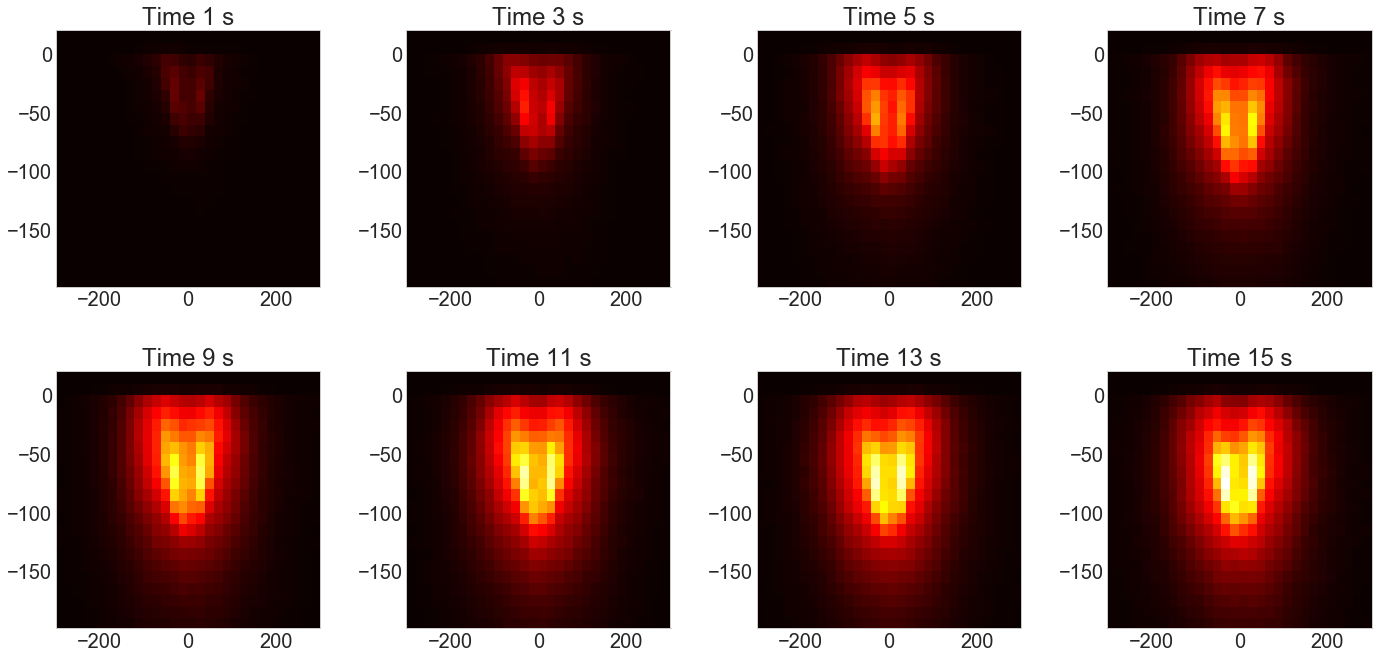

In [23]:
plt.cm.get_cmap('hot')
plt.set_cmap('hot')

plt.figure(figsize=(20,10))


# f, axarr = plt.subplots(2, 4, sharex=True, sharey=True)

# plot one second intervals, show every other time point.

for i, timept in enumerate(range(1,16,2),start=1):
    
#     print(i)
    print('time ' + str(timept))
    
    # bin ± 0.5s as interval

    new_actin_pos_time=new_actin_pos.loc[new_actin_pos['Test_time']>timept-1].loc[new_actin_pos['Test_time']<=timept+1]

#     times_per_timept=new_actin_pos_time.
    times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))
#     print(times_per_timept)
    

    # set position

    x = new_actin_pos_time['xpos_recalibrated']*1000
    y = (new_actin_pos_time['zpos']+0.4)*(-1000)

    # set number of bins (kind of like pixel size) here. 
    
    # x: 600 points, 30 bins is about 20 nm pixel.
    # z: about 10 nm pixel
    
    model_points,xs,ys=np.histogram2d(x,y,bins=[30,22],range=[[-300,300],[-200, 20]])
    model_points=np.flipud(np.rot90(model_points))

    # histogram (sum) for one time

    # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.
    # assuming that nb time points is same for all runs. using one model point = 10 nm and one actin subunit is 2.75 nm.

    actin_subunits=model_points/len(runs)/times_per_timept*10/2.75

    plt.subplot(2, 4, i)

    plt.pcolormesh(xs, ys, actin_subunits)
#     plt.rcParams.update({'font.size': 24})


#     plt.xlim([-300, 300])
#     plt.ylim([-200, 5])

#     plt.xlabel('X (nm)')
#     plt.ylabel('Z (nm)')

#     cb = plt.colorbar(label = 'Actin monomers')
    plt.title('Time ' + str(timept) + ' s', fontsize=24)

    # log scale 
    # plt.hist2d(x, y, bins = 40, norm=LogNorm())


    plt.xlim([-300, 300])
    plt.ylim(bottom = -199)

    # max colormap to show
    
    plt.clim([0, 55])
    
#     plt.xlabel('x (nm)')
#     plt.ylabel('Z (nm)')
    
    plt.xticks(size=20)
    plt.yticks(size=20)

    plt.tight_layout()
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_actin_map_XZ_time_subplots.png')
    plt.savefig('../figures/'+pref+'_actin_map_XZ_time_subplots.pdf')
    

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

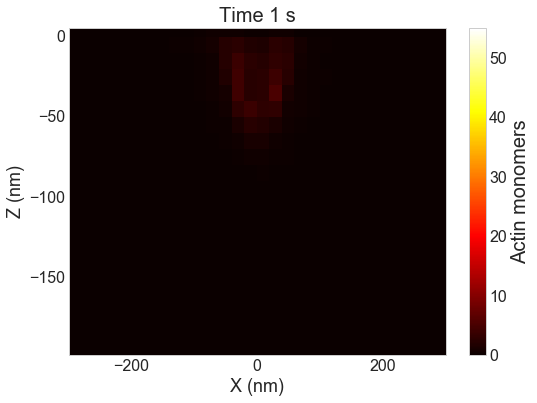

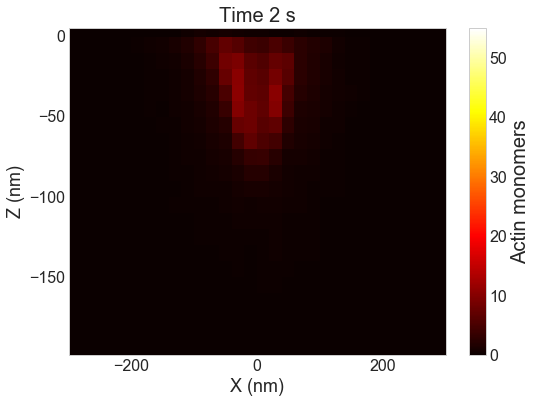

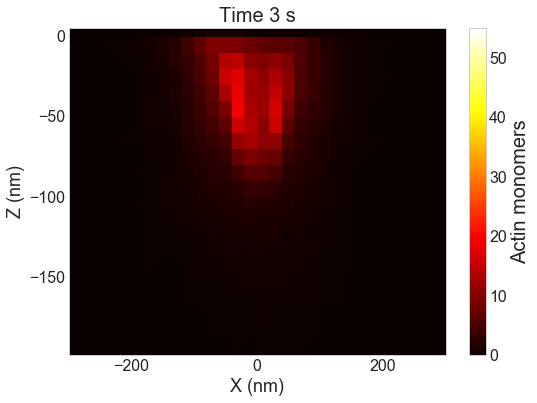

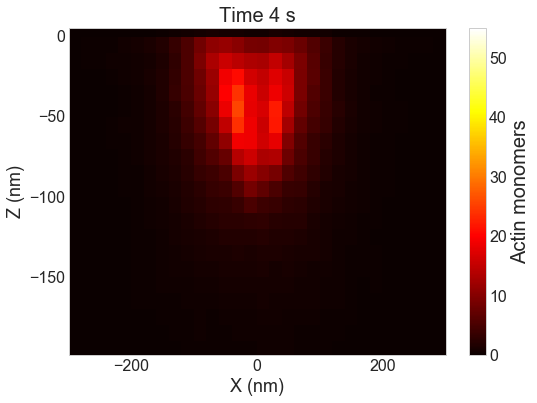

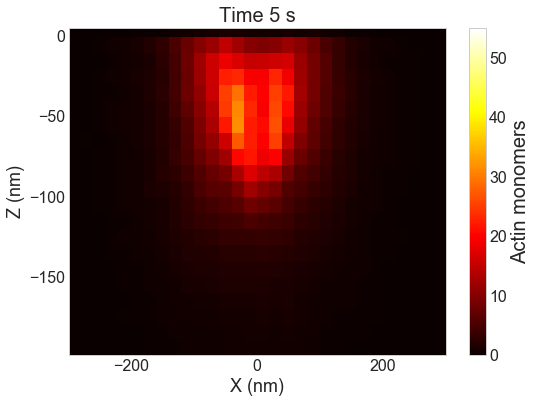

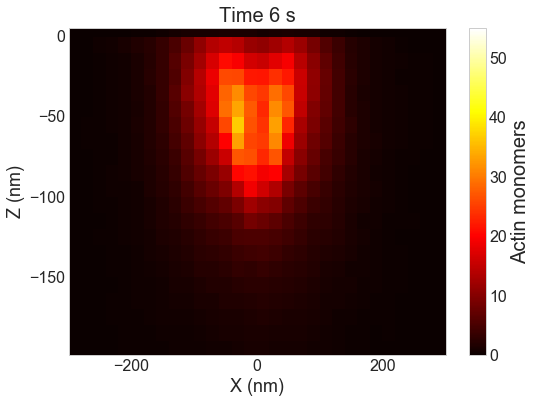

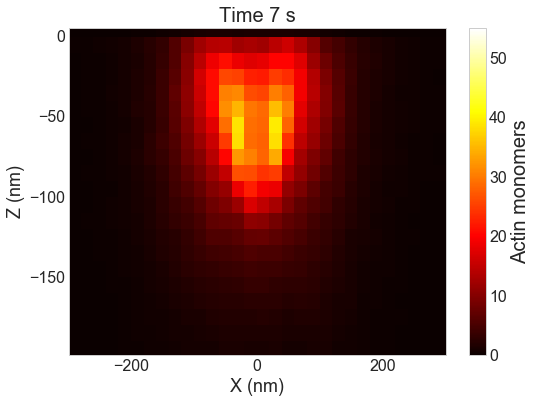

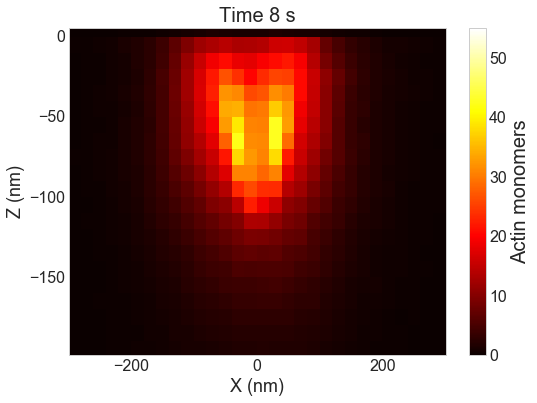

In [7]:
# vs time,  1 s intervals, save each time point separately
#  this code is good for movies. there are ways to make it directly a movie,
# but other option is to drop them into imagej.

plt.cm.get_cmap('hot')
plt.set_cmap('hot')

# plt.subplots(2, 2, sharex=True, sharey=True)

for timept in range(1,16):

    # bin ± 0.5s as interval

    new_actin_pos_time=new_actin_pos.loc[new_actin_pos['Test_time']>timept-1].loc[new_actin_pos['Test_time']<=timept]

#     times_per_timept=new_actin_pos_time.
    times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))
#     print(times_per_timept)
    
    plt.figure(figsize=(8,6))

    # set position

    x = new_actin_pos_time['xpos_recalibrated']*1000
    y = (new_actin_pos_time['zpos']+0.4)*(-1000)

    # set number of bins (kind of like pixel size) here. 
    
    # x: 600 points, 30 bins is about 20 nm pixel.
    # z: about 10 nm pixel
    
    model_points,xs,ys=np.histogram2d(x,y,bins=[30,22],range=[[-300,300],[-200, 20]])
    model_points=np.flipud(np.rot90(model_points))

    # histogram (sum) for one time

    # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.
    # assuming that nb time points is same for all runs

    actin_subunits=model_points/len(runs)/times_per_timept*10/2.75
    

    plt.pcolormesh(xs, ys, actin_subunits)

    plt.xlim([-300, 300])
    plt.ylim([-200, 5])
    
    cb = plt.colorbar(label = 'Actin monomers')
    cb.ax.tick_params(labelsize=16) 
    plt.title('Time ' + str(timept) + ' s', fontsize=20)

    # log scale 
    # plt.hist2d(x, y, bins = 40, norm=LogNorm())


    plt.xlim([-300, 300])
    plt.ylim(bottom = -199)

    # max colormap to show
    
    plt.clim([0, 55])
    
    plt.xlabel('X (nm)', fontsize = 18)
    plt.ylabel('Z (nm)', fontsize = 18)
    
    plt.xticks(size=16)
    plt.yticks(size=16)

    plt.tight_layout()
    
    if save_figures == 'yes': 
        plt.savefig('../figures/actin_map_XZ_time bin '+str(timept)+' s.png', dpi=500)
        plt.savefig('../figures/actin_map_XZ_time bin '+str(timept)+' s.pdf')
        
  

## Find FWHM

In [ ]:
# https://stackoverflow.com/questions/10582795/finding-the-full-width-half-maximum-of-a-peak

# proof of principle and graph of measurement

import scipy.optimize as opt
from scipy.stats import norm

x = new_actin_pos['xpos_recalibrated']*1000
y = (new_actin_pos['zpos']+0.4)*(-1000)


# Fit gaussian

mean,std=norm.fit(x)

plt.hist(x, bins=30, normed=True)
xmin, xmax = plt.xlim()
x_plt = np.linspace(xmin, xmax, 100)
y_plt = norm.pdf(x_plt, mean, std)
plt.plot(x_plt, y_plt)
FWHM = 2*np.sqrt(2*np.log(2))*std
plt.title('Actin X position FWHM: '+str(round(FWHM))+ ' nm')

plt.axvspan(mean-FWHM/2, mean+FWHM/2, facecolor='g', alpha=0.5)
plt.show()

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'actin_positions_X_dist_all.png')

# in Z

# with gaussian fitting

mean,std=norm.fit(y)
plt.hist(y, bins=30, normed=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)
FWHM = 2*np.sqrt(2*np.log(2))*std
plt.title('Actin Z position FWHM: '+str(round(FWHM))+ ' nm')

plt.axvspan(mean-FWHM/2, mean+FWHM/2, facecolor='g', alpha=0.5)
plt.show()

# with peak finding?



if save_figures == 'yes': 
    plt.savefig(working_dir+'../figures/'+pref+'actin_positions_Z_dist_all.png')


In [ ]:
mean,std=norm.fit(y)
plt.hist(y, bins=30, normed=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)
FWHM = 2*np.sqrt(2*np.log(2))*std
plt.title('Actin Z position FWHM: '+str(round(FWHM))+ ' nm')

plt.axvspan(mean-FWHM/2, mean+FWHM/2, facecolor='g', alpha=0.5)
plt.show()


## Over time FHWM ± std

In [ ]:
# over time

In [6]:
# import numpy as np
import scipy.optimize as opt
from scipy.stats import norm

# save_figures='no'

#thru runs, save std and mean
FWHMS_x_runs=[]
FWHMS_z_runs=[]

for r in runs:
    print(r)

    new_actin_pos_run=new_actin_pos.loc[new_actin_pos['Test_run']==r]

    FWHMS_x_time = []
    FWHMS_z_time = []                                        
    # thru times
    for timept in times:

        new_actin_pos_time=new_actin_pos_run.loc[new_actin_pos_run['Test_time']==timept]

        x = new_actin_pos_time['xpos_recalibrated']*1000
        y = (new_actin_pos_time['zpos']+0.4)*(-1000)

        mean_x,std_x=norm.fit(x)

        FWHM_x = 2*np.sqrt(2*np.log(2))*std_x

        # in Z

        mean_z,std_z=norm.fit(y)
        FWHM_z = 2*np.sqrt(2*np.log(2))*std_z

        FWHMS_x_time.append(FWHM_x)
        FWHMS_z_time.append(FWHM_z)
    FWHMS_x_runs.append(FWHMS_x_time)
    FWHMS_z_runs.append(FWHMS_z_time)


run0000_0000
run0000_0001
run0000_0002
run0000_0003
run0000_0004
run0000_0005
run0000_0006
run0000_0007
run0000_0008
run0000_0009
run0000_0010
run0000_0011
run0000_0012
run0000_0013
run0000_0014
run0000_0015
run0000_0016
run0000_0017
run0000_0018
run0000_0019
run0000_0020
run0000_0021
run0000_0022
run0000_0023


In [ ]:
# 1s intervals

# import scipy.optimize as opt
# from scipy.stats import norm

# save_figures='no'

# #thru runs, save std and mean
# FWHMS_x_runs=[]
# FWHMS_z_runs=[]

# for r in runs:
#     print(r)

#     new_actin_pos_run=new_actin_pos.loc[new_actin_pos['Test_run']==r]

#     FWHMS_x_time = []
#     FWHMS_z_time = []                                        
#     # thru times
#     for timept in range(1,16):

#         # bin ± 0.5s as interval

#         new_actin_pos_time=new_actin_pos_run.loc[new_actin_pos_run['Test_time']>timept-0.5].loc[new_actin_pos_run['Test_time']<=timept+0.5]

#     #     times_per_timept=new_actin_pos_time.
#     #     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))
#     # 

#         x = new_actin_pos_time['xpos_recalibrated']*1000
#         y = (new_actin_pos_time['zpos']+0.4)*(-1000)

#         # hist dist in x
#         # freq,xs_x=np.histogram(x)
#         # x_dist_norm=freq/max(freq)

#         # freq,xs_z=np.histogram(y)
#         # z_dist_norm=freq/max(freq)

#         # Fit gaussian

#         # data = np.random.normal(loc=5.0, scale=2.0, size=1000)
#         mean_x,std_x=norm.fit(x)

#     #         plt.hist(x, bins=30, normed=True)
#     #         xmin, xmax = plt.xlim()
#     #         x_plt = np.linspace(xmin, xmax, 100)
#     #         y_plt = norm.pdf(x_plt, mean, std)
#     #         plt.plot(x_plt, y_plt)
#         FWHM_x = 2*np.sqrt(2*np.log(2))*std_x
#     #         plt.title('Actin X position FWHM: '+str(round(FWHM))+ ' nm '+str(timept)+ ' s')

#     #         plt.axvspan(mean-FWHM/2, mean+FWHM/2, facecolor='g', alpha=0.5)
#     #         plt.show()

#     #         if save_figures == 'yes': 
#     #             plt.savefig('figures/actin_positions_X_dist_all.png')




#         # in Z

#         mean_z,std_z=norm.fit(y)
#     #         plt.hist(y, bins=30, normed=True)
#     #         xmin, xmax = plt.xlim()
#     #         x = np.linspace(xmin, xmax, 100)
#     #         y = norm.pdf(x, mean, std)
#     #         plt.plot(x, y)
#         FWHM_z = 2*np.sqrt(2*np.log(2))*std_z
#     #         plt.title('Actin Z position FWHM: '+str(round(FWHM))+ ' nm '+str(timept)+ ' s')

#         FWHMS_x_time.append(FWHM_x)
#         FWHMS_z_time.append(FWHM_z)
#     FWHMS_x_runs.append(FWHMS_x_time)
#     FWHMS_z_runs.append(FWHMS_z_time)

                                        

# # FWHMS_x_runs
# #         plt.axvspan(mean-FWHM/2, mean+FWHM/2, facecolor='g', alpha=0.5)
# #         plt.show()


# #         if save_figures == 'yes': 
# #             plt.savefig('figures/actin_positions_Z_dist_all.png')





## Plot FWHM over time averge runs

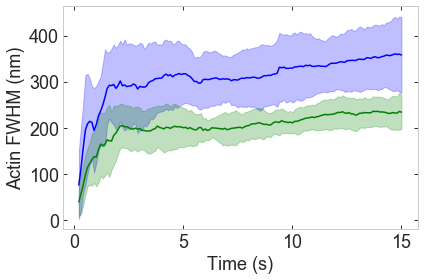

Last time point: X 357 ± 83
Last time point: Z 233 ± 36


In [7]:
# save_figures == 'yes'

color1 = 'blue'
color2 = 'green'

FHWMS_x_mean_runs=np.mean(FWHMS_x_runs,axis=0)
FHWMS_x_std_runs=np.std(FWHMS_x_runs,axis=0)


plt.plot(times,FHWMS_x_mean_runs, c=color1)
plt.fill_between(times,np.array(FHWMS_x_mean_runs)-np.array(FHWMS_x_std_runs), np.array(FHWMS_x_mean_runs)+np.array(FHWMS_x_std_runs), alpha=0.25,edgecolor=color1, facecolor=color1, linewidth=1, antialiased=True) 


plt.xlabel('Time (s)')
plt.ylabel('Actin FWHM in x (nm)')

# z

plt.tick_params(reset=True, color='black', direction='in', length=4)


FHWMS_z_mean_runs=np.mean(FWHMS_z_runs,axis=0)
FHWMS_z_std_runs=np.std(FWHMS_z_runs,axis=0)

plt.plot(times,FHWMS_z_mean_runs, c= color2)

plt.fill_between(times,np.array(FHWMS_z_mean_runs)-np.array(FHWMS_z_std_runs), np.array(FHWMS_z_mean_runs)+np.array(FHWMS_z_std_runs), alpha=0.25,edgecolor=color2, facecolor=color2, linewidth=1, antialiased=True) 



plt.xlabel('Time (s)')
plt.ylabel('Actin FWHM (nm)')
plt.grid(False)


plt.tight_layout()
# if save_figures == 'yes': 
plt.savefig(working_dir+'../figures/'+pref+'actin_FWHM_vs_time.png')
plt.savefig(working_dir+'../figures/'+pref+'actin_FWHM_vs_time.pdf')
plt.show()
print('Last time point: X '+str(int(FHWMS_x_mean_runs[-1]))+' ± '+str(int(FHWMS_x_std_runs[-1])))
print('Last time point: Z '+str(int(FHWMS_z_mean_runs[-1]))+' ± '+str(int(FHWMS_z_std_runs[-1])))




## plot number actin monomers in hip1r-associated clusters over time

In [8]:
# group by run and time, get total number actin points per run and time point

actin_points_by_run_time = new_actin_pos.groupby(level=['run', 'time']).fiber_point.count()

# convert to monomers

actin_monomers_by_run_time = actin_points_by_run_time*10/2.75

actin_monomers_by_time_mean = pd.DataFrame(actin_monomers_by_run_time).groupby('time').mean()
actin_monomers_by_time_std = pd.DataFrame(actin_monomers_by_run_time).groupby('time').std()


# actin_points_by_time = pd.DataFrame.from_dict(actin_points_by_run_time, orient = 'index')
# actin_points_by_time_mean =  actin_points_by_run_time.grouby(level='run').mean()
actin_monomers_by_time_mean

fiber_point
time             
0.1     21.363636
0.2     42.121212
0.3     67.007576
0.4     88.295455
0.5    108.181818
0.6    130.303030
0.7    154.583333
0.8    177.537879
0.9    203.219697
1.0    234.393939
1.1    268.257576
1.2    303.257576
1.3    338.901515
1.4    375.227273
1.5    418.598485
1.6    462.462121
1.7    506.818182
1.8    550.265152
1.9    601.212121
2.0    648.257576
2.1    697.992424
2.2    757.765152
2.3    806.022727
2.4    859.393939
2.5    910.075758
2.6    966.856061
2.7   1021.969697
2.8   1076.477273
2.9   1133.787879
3.0   1198.106061
...           ...
12.1  4976.856061
12.2  4996.931818
12.3  5014.545455
12.4  5030.416667
12.5  5049.848485
12.6  5067.537879
12.7  5081.250000
12.8  5087.765152
12.9  5100.833333
13.0  5069.545455
13.1  5082.613636
13.2  5096.439394
13.3  5105.265152
13.4  5111.363636
13.5  5125.037879
13.6  5137.462121
13.7  5151.742424
13.8  5165.454545
13.9  5173.787879
14.0  5182.386364
14.1  5194.545455
14.2  5204.469697
14.3  5213.977273
14.4  5223.674242
14.5  5230.795455
14.6  5243.560606
14.7  5253.295455
14.8  5254.507576
14.9  5263.750000
15.0  5270.037879

[150 rows x 1 columns]

In [ ]:
# plot

plt.figure(figsize=(5,4))
plt.rc('font', size=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

color='black'

plt.plot(times,actin_monomers_by_time_mean, c=color)
yminus=actin_monomers_by_time_mean-actin_monomers_by_time_std
yplus=actin_monomers_by_time_mean+actin_monomers_by_time_std

plt.fill_between(times, np.array(yminus.fiber_point), np.array(yplus.fiber_point), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 


plt.xlabel('Time (s)')
plt.ylabel('Actin monomers in network')

# z

plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)
plt.tight_layout()

last_timepoint_mean_nb_monomers = actin_monomers_by_time_mean.iloc[-1].fiber_point
last_timepoint_std_nb_monomers  = actin_monomers_by_time_std.iloc[-1].fiber_point

plt.title('last timepoint: ' + str(last_timepoint_mean_nb_monomers)+ '\n ± '+ str(last_timepoint_std_nb_monomers)+ ' filaments n = ' + str(len(runs)))



plt.savefig('../figures/'+pref+'actin_monomers_vs_time.png')
plt.savefig('../figures/'+pref+'actin_monomers_vs_time.pdf')

plt.show()


## actin polymerization energy over time

In [9]:
# monomers * 

# % given 2.75 nm and 5 pN stall force. 
# % but maybe this scales with applied force

workPerBinding = 13.5 #  pN nm

polymerization_energy_by_time_mean = actin_monomers_by_time_mean*workPerBinding
polymerization_energy_by_time_std  = actin_monomers_by_time_std*workPerBinding

# last_timepoint_mean_nb_monomers = actin_monomers_by_time_mean.iloc[-1].fiber_point
# last_timepoint_std_nb_monomers  = actin_monomers_by_time_std.iloc[-1].fiber_point

# plt.title('last timepoint: ' + str(last_timepoint_mean_nb_monomers)+ '\n ± '+ str(last_timepoint_std_nb_monomers)+ ' filaments n = ' + str(len(runs)))

polymerization_energy_by_time_mean


fiber_point
time              
0.1     288.409091
0.2     568.636364
0.3     904.602273
0.4    1191.988636
0.5    1460.454545
0.6    1759.090909
0.7    2086.875000
0.8    2396.761364
0.9    2743.465909
1.0    3164.318182
1.1    3621.477273
1.2    4093.977273
1.3    4575.170455
1.4    5065.568182
1.5    5651.079545
1.6    6243.238636
1.7    6842.045455
1.8    7428.579545
1.9    8116.363636
2.0    8751.477273
2.1    9422.897727
2.2   10229.829545
2.3   10881.306818
2.4   11601.818182
2.5   12286.022727
2.6   13052.556818
2.7   13796.590909
2.8   14532.443182
2.9   15306.136364
3.0   16174.431818
...            ...
12.1  67187.556818
12.2  67458.579545
12.3  67696.363636
12.4  67910.625000
12.5  68172.954545
12.6  68411.761364
12.7  68596.875000
12.8  68684.829545
12.9  68861.250000
13.0  68438.863636
13.1  68615.284091
13.2  68801.931818
13.3  68921.079545
13.4  69003.409091
13.5  69188.011364
13.6  69355.738636
13.7  69548.522727
13.8  69733.636364
13.9  69846.136364
14.0  69962.215909
14.1  70126.363636
14.2  70260.340909
14.3  70388.693182
14.4  70519.602273
14.5  70615.738636
14.6  70788.068182
14.7  70919.488636
14.8  70935.852273
14.9  71060.625000
15.0  71145.511364

[150 rows x 1 columns]

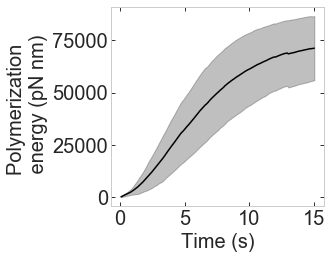

In [13]:
plt.figure(figsize=[5,4])
plot_multiple_errorbars(polymerization_energy_by_time_mean.fiber_point, polymerization_energy_by_time_std.fiber_point, 'black', 'Polymerization \n energy (pN nm)')

plt.xticks([0,5,10,15])
plt.savefig('../figures/'+pref+'polymerization_energy_vs_time.png')
plt.savefig('../figures/'+pref+'polymerization_energy_vs_time.pdf')



## number, branch angles arp

In [41]:
# if it's not multiindex
branched_actin_bound_arp = branched_actin_bound_arp.set_index(['run','time'])

# merge w actin to get earlier time points == 0

# arp_actin = pd.merge(new_actin_pos, branched_actin_bound_arp, on=['run','time'], how='outer')

# group by run and time, get total number actin points per run and time point

arp_by_run_time = branched_actin_bound_arp.groupby(level=['run', 'time']).arp_id.count()

arp_by_time_mean = pd.DataFrame(arp_by_run_time).groupby('time').mean()
arp_by_time_std = pd.DataFrame(arp_by_run_time).groupby('time').std()


arp_by_time_mean

arp_id
time            
0.2     1.166667
0.3     1.230769
0.4     1.281250
0.5     1.659091
0.6     2.222222
0.7     2.641791
0.8     3.281690
0.9     3.782051
1.0     4.740741
1.1     5.451220
1.2     6.341176
1.3     7.418605
1.4     8.632184
1.5     9.613636
1.6    10.733333
1.7    11.911111
1.8    13.222222
1.9    14.747253
2.0    16.032967
2.1    17.648352
2.2    19.296703
2.3    20.659341
2.4    22.032609
2.5    23.543478
2.6    25.402174
2.7    26.869565
2.8    28.413043
2.9    30.293478
3.0    32.228261
3.1    33.891304
...          ...
12.1  136.210526
12.2  136.884211
12.3  137.231579
12.4  137.589474
12.5  138.147368
12.6  138.663158
12.7  139.052632
12.8  139.368421
12.9  139.789474
13.0  139.010526
13.1  139.378947
13.2  139.736842
13.3  140.094737
13.4  140.326316
13.5  140.663158
13.6  140.978947
13.7  141.347368
13.8  141.642105
13.9  141.821053
14.0  142.147368
14.1  142.421053
14.2  142.631579
14.3  142.873684
14.4  143.084211
14.5  143.273684
14.6  143.652632
14.7  143.968421
14.8  144.000000
14.9  144.273684
15.0  144.515789

[149 rows x 1 columns]

In [42]:
def get_mean_count_time(data_frame, v):
# merge with solid to get remaing timepoints (which will count as 0)

    merged = pd.merge(solid_positions, data_frame, on=['run','time'], how = 'outer')

    # use pivot table to identify number of columns in the ends dataframe. other runs, timepoints will be 0

    data_frame_time_count = merged.pivot_table(index=['run', 'time'], values=v, fill_value=0, dropna = False, aggfunc='count')

    # mean std grouped by time

    mean_nb_vs_time=data_frame_time_count.groupby('time').mean().iloc[:,0]
    std_nb_vs_time=data_frame_time_count.groupby('time').std().iloc[:,0]
    
    return [mean_nb_vs_time, std_nb_vs_time]
arp_time_mean = []
arp_time_std = []

arp_time_mean, arp_time_std = get_mean_count_time(branched_actin_bound_arp, 'arp_id')


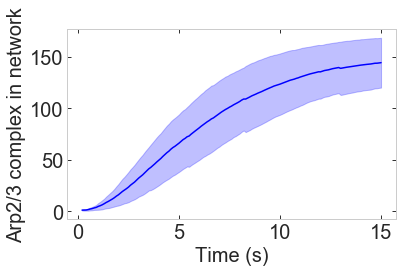

In [43]:
# plot

plt.figure(figsize=(6,4))
plt.rc('font', size=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

color='blue'

plt.plot(arp_by_time_mean.index,arp_by_time_mean, c=color)
yminus=arp_by_time_mean-arp_by_time_std
yplus=arp_by_time_mean+arp_by_time_std

plt.fill_between(arp_by_time_mean.index, np.array(yminus.arp_id), np.array(yplus.arp_id), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 


plt.xlabel('Time (s)')
plt.ylabel('Arp2/3 complex in network')

# z

plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)

plt.tight_layout()
plt.savefig('../figures/'+pref+'arp_vs_time.png')
plt.savefig('../figures/'+pref+'arp_vs_time.pdf')

plt.show()

## density of branches per nm^3



In [245]:
# positions

## map XZ of number

#  map XZ of number/volume

## mean std over time

In [246]:
# arp heat map xz over time

In [247]:
# movie arp heat map xz

In [44]:
# arp branch angle over time

arp_angles = branched_actin_bound_arp['branch_angle_deg']

# group by run and time, get mean arp angle nd time point

# arp_angle_by_run_time = arp_angles.groupby(level=['run', 'time'])

arp_angle_by_time_all_mean = arp_angles.groupby(level=['time']).mean()
arp_angle_by_time_all_std = arp_angles.groupby(level=['time']).std()

# arp_angle_by_time_mean = pd.DataFrame(arp_angle_by_time_all).groupby('time').mean()
# arp_angle_by_time_std = pd.DataFrame(arp_angle_by_time_all).groupby('time').std()


arp_angle_by_time_all_mean.head()

# versus internalization...

time
0.2    68.463425
0.3    74.621099
0.4    79.632093
0.5    81.125074
0.6    78.444676
Name: branch_angle_deg, dtype: float64

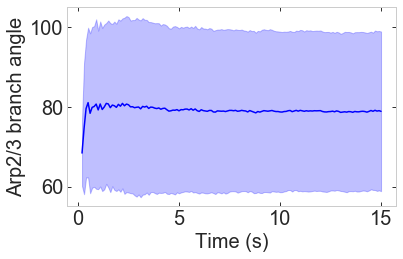

In [45]:
# plot

plt.figure(figsize=(6,4))
plt.rc('font', size=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

color='blue'

plt.plot(arp_angle_by_time_all_mean.index,arp_angle_by_time_all_mean, c=color)
yminus=arp_angle_by_time_all_mean-arp_angle_by_time_all_std
yplus=arp_angle_by_time_all_mean+arp_angle_by_time_all_std

plt.fill_between(arp_by_time_mean.index, np.array(yminus), np.array(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 


plt.xlabel('Time (s)')
plt.ylabel('Arp2/3 branch angle')

# z

plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)
plt.tight_layout()

plt.savefig('../figures/'+pref+'arp_angle_vs_time.png')
plt.savefig('../figures/'+pref+'arp_angle_vs_time.pdf')

plt.show()




ValueError: x and y must have same first dimension, but have shapes (1500,) and (150,)

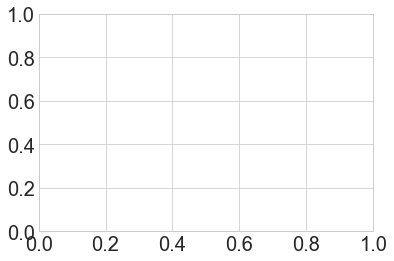

In [46]:
# plot expected unloaded branch angle on top. 

means = np.tile(77,150)
stds  = np.tile(13,150)

color1 = 'blue'
color  = 'magenta'


yminus=means-stds
yplus=means+stds

plt.plot(times, means, c=color)
plt.fill_between(times, np.array(yminus), np.array(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 

plt.plot(arp_angle_by_time_all_mean.index,arp_angle_by_time_all_mean, c=color1)
yminus=arp_angle_by_time_all_mean-arp_angle_by_time_all_std
yplus=arp_angle_by_time_all_mean+arp_angle_by_time_all_std
plt.fill_between(arp_by_time_mean.index, np.array(yminus), np.array(yplus), alpha=0.25,edgecolor=color1, facecolor=color1, linewidth=1, antialiased=True) 


plt.xlabel('Time (s)')
plt.ylabel('Arp2/3 branch angle')

# z

plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)
# plt.xlim([0, 2])
plt.ylim([0, 110])
plt.tight_layout()

plt.savefig('../figures/'+pref+'arp_angle_vs_time_expected_value.png')
plt.savefig('../figures/'+pref+'arp_angle_vs_time_expected_value.pdf')

In [47]:
# significance testing: last time point

import scipy


plt.figure(figsize=[6,4])

bin_range = np.arange(0,185, 4)

arps = branched_actin_bound_arp.reset_index()
# branched_actin_bound_arp['branch_angle_deg'].loc[branched_actin_bound_arp['time'==15.0]]
last_timepoint_arps = arp_angles.loc[arp_angles['time']==15.0]
last_timepoint_arp_angles = last_timepoint_arps['branch_angle_deg']
nb_arps = len(last_timepoint_arp_angles)
mean_angle_last_timepoint = np.mean(last_timepoint_arp_angles)
std_angle_last_timepoint = np.std(last_timepoint_arp_angles)

print(nb_arps)
print(mean_angle_last_timepoint)
print(std_angle_last_timepoint)
plt.hist(last_timepoint_arp_angles, bins=bin_range, alpha = 0.5, color = 'blue',  edgecolor='black', linewidth=0.2)

# make normally distributed data 

expected_mean = 77
expected_std  = 13

expected_angles = np.random.normal(loc=expected_mean, scale=expected_std, size=nb_arps)
plt.hist(expected_angles, bins=bin_range, alpha=0.5, color='magenta',  edgecolor='black', linewidth=0.2)
# len(expected_angles)

plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)
plt.ylabel('Occurrences')
plt.xlabel('Branch angle (degrees)')

plt.xlim([-30, 184])

tt, pp = scipy.stats.ttest_ind(expected_angles, last_timepoint_arp_angles)
plt.title('Last time point \n p value: ' + str(pp))
plt.tight_layout()

plt.savefig('../figures/'+pref+'arp_angle_vs_time_expected_value_t15.png')
plt.savefig('../figures/'+pref+'arp_angle_vs_time_expected_value_t15.pdf')

KeyError: 'time'

<Figure size 432x288 with 0 Axes>

In [48]:
# calculate energy storyed
import math 
angular_stiffness = 76 # pN nm/rad
resting_angle = math.radians(77)

# branched_actin_bound_arp['energy_stored'] = angular_stiffness*(abs(np.arccos(branched_actin_bound_arp['branching_angle'])-resting_angle))

# 1/2 k theta^2 
branched_actin_bound_arp['energy_stored'] = 0.5* angular_stiffness*(abs(np.arccos(branched_actin_bound_arp['branching_angle'])-resting_angle))*(abs(np.arccos(branched_actin_bound_arp['branching_angle'])-resting_angle))




branched_actin_bound_arp.head()


bound_state  arp_id      xpos  nucleating_state      ypos  \
run          time                                                              
run0000_0022 0.4             1      73 -0.033065                 1  0.030137   
             0.4             1     113  0.056926                 1 -0.040056   
             0.5             1      73 -0.035961                 1  0.025313   
             0.5             1     113  0.051810                 1 -0.057033   
             0.6             1      54 -0.127272                 1  0.005652   

                       zpos      rpos  bound_distance_along_fiber1  \
run          time                                                    
run0000_0022 0.4  -0.366179  0.044739                     0.031297   
             0.4  -0.400095  0.069607                     0.011747   
             0.5  -0.365394  0.043977                     0.031297   
             0.5  -0.400300  0.077052                     0.011747   
             0.6  -0.395412  0.127397                     0.190442   

                   bound_distance_along_fiber2  bound_fiber1_ID  \
run          time                                                 
run0000_0022 0.4                           0.0              8.0   
             0.4                           0.0             13.0   
             0.5                           0.0              8.0   
             0.5                           0.0             13.0   
             0.6                           0.0              2.0   

                       ...        id_y  bud_xpos  bud_ypos  bud_zpos  \
run          time      ...                                             
run0000_0022 0.4       ...           1 -0.002700 -0.002082 -0.390046   
             0.4       ...           1 -0.002700 -0.002082 -0.390046   
             0.5       ...           1 -0.004256 -0.000049 -0.386005   
             0.5       ...           1 -0.004256 -0.000049 -0.386005   
             0.6       ...           1 -0.005795 -0.001588 -0.379854   

                   bud_internalization  xpos_recalibrated  ypos_recalibrated  \
run          time                                                              
run0000_0022 0.4              0.009954          -0.030365           0.032219   
             0.4              0.009954           0.059627          -0.037974   
             0.5              0.013995          -0.031705           0.025362   
             0.5              0.013995           0.056066          -0.056985   
             0.6              0.020146          -0.121477           0.007240   

                   zpos_recalibrated  rpos_recalibrated  energy_stored  
run          time                                                       
run0000_0022 0.4            0.023867           0.044273       0.100400  
             0.4           -0.010049           0.070692       0.028243  
             0.5            0.020611           0.040601       1.178031  
             0.5           -0.014295           0.079941       0.005004  
             0.6           -0.015558           0.121693       5.296283  

[5 rows x 29 columns]

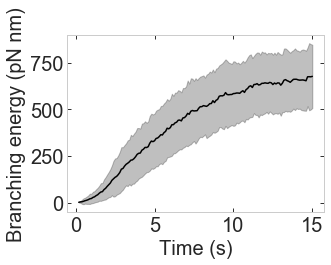

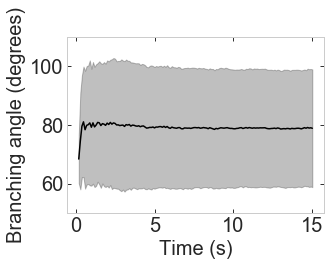

In [49]:
# over time
# branching_energy_run_time = branched_actin_bound_arp.pivot_table(index=['run', 'time'], values='energy_stored', aggfunc='sum')

branching_run_time = branched_actin_bound_arp.pivot_table(index=['run', 'time'], aggfunc={'energy_stored':'sum', 'branch_angle_deg':'mean', 'branching_angle':'mean'})

branching_angle_time_mean = branched_actin_bound_arp.pivot_table(index=['time'], aggfunc={'branch_angle_deg':'mean', 'branching_angle':'mean'})
branching_angle_time_std =  branched_actin_bound_arp.pivot_table(index=['time'], aggfunc={'branch_angle_deg':'std', 'branching_angle':'std'})


# mean std grouped by time
branching_agg_time = branching_run_time.groupby('time')

branching_energy_time_mean = branching_agg_time['energy_stored'].mean()
branching_energy_time_std = branching_agg_time['energy_stored'].std()

# mean of a mean, less data
# branching_angle_time_mean = branching_agg_time['branch_angle_deg'].mean()
# branching_angle_time_std = branching_agg_time['branch_angle_deg'].std()




# mean_bending_energy_direct_vs_time=sum_bending_energy_direct_run_time.groupby('time').mean().iloc[:,0]
# std_bending_energy_direct_vs_time=sum_bending_energy_direct_run_time.groupby('time').std().iloc[:,0]

plt.figure(figsize=[5,4])
plot_multiple_errorbars(branching_energy_time_mean, branching_energy_time_std, 'black', 'Branching energy (pN nm)')   

plt.tight_layout()
plt.savefig('../figures/'+pref+'angular_energy_stored_time.png')
plt.savefig('../figures/'+pref+'angular_energy_stored_time.pdf')



plt.figure(figsize=[5,4])

plot_multiple_errorbars(branching_angle_time_mean.branch_angle_deg, branching_angle_time_std.branch_angle_deg, 'black', 'Branching angle (degrees)')   
plt.ylim([50,110])

plt.tight_layout()
plt.savefig('../figures/'+pref+'branching_angle_time.png')
plt.savefig('../figures/'+pref+'branching_angle_time.pdf')




# plt.figure(figsize=[5,4])

# plot_multiple_errorbars(mean_branching_energy_time, std_branching_energy_time, 'black', 'Branching energy (pN nm)')
# # mean_branching_energy_time 

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


<Figure size 432x288 with 0 Axes>

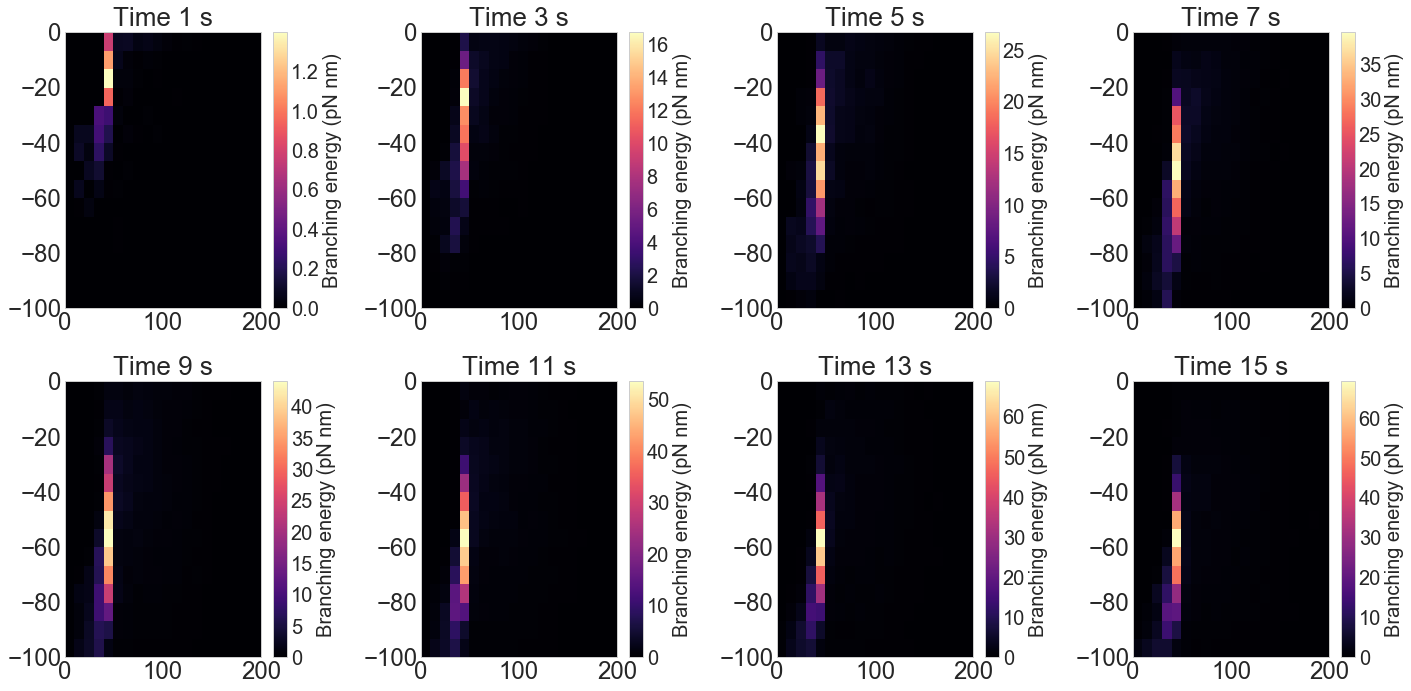

In [53]:
# RZ over time

# versus R and Z
plt.set_cmap('magma')

# outside_bud = 'yes'

plt.figure(figsize=(20,10))

branched_actin_bound_arp['energy_stored']

for i, timept in enumerate(range(1,16,2),start=1):

    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    
#     ends_time = branched_actin_bound_ends_bending.loc[branched_actin_bound_ends_bending['length_to_plus_end']>free_length_threshold]
    
#     ends_time = ends_time.reset_index()
#     if outside_bud=='yes':
#         in_bud_idx =ends_time.loc[ends_time['plus_rpos_recalibrated']<0.055].loc[ends_time['plus_zpos_recalibrated']>-0.055].loc[ends_time['plus_zpos_recalibrated']<0.055].index
#         ends_time = ends_time.drop(in_bud_idx)
    arp_all=branched_actin_bound_arp.reset_index()

    arp_time=arp_all.loc[arp_all['time']>(timept-1)].loc[arp_all['time']<=(timept)]
    
    times_per_timept=len(sorted(list(set(arp_time.time))))

  # set position
    
#     x = arp_time.plus_rpos_recalibrated*1000

    x = arp_time.rpos_recalibrated*1000
    
    y = (arp_time.zpos+0.4)*(-1000)
    
    color = arp_time['energy_stored']

    bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, bins=30, statistic='sum', range = [[0,300],[-200,0]])
    bin_means = np.flipud(np.rot90(bin_means))

    bin_means = bin_means/96/times_per_timept
    
    plt.subplot(2, 4, i)
    plt.pcolormesh(xedges, yedges, bin_means)


    
    cb = plt.colorbar(label = 'Branching energy (pN nm)')
    plt.title('Time ' + str(timept) + ' s', fontsize=26)
    
#     plt.yticks([-90, -45, 0, 45, 90])
    
    plt.xticks(size=24)
    plt.yticks(size=24)
    
    plt.xlim([0,200])
    plt.ylim([-100, 0])

    plt.tight_layout()

plt.savefig('../figures/'+pref+'angular_energy_stored_RZ_time.png')
plt.savefig('../figures/'+pref+'angular_energy_stored_RZ_time.pdf')


    

In [63]:
#  inside/outside bud

branched_actin_bound_arp['r_recalibrated_3D']=np.sqrt(pow(branched_actin_bound_arp['xpos_recalibrated'],2) +
                                                                   pow(branched_actin_bound_arp['ypos_recalibrated'],2) +
                                                                   pow(branched_actin_bound_arp['zpos_recalibrated'],2))

outside_bud = 'yes'
outside_bud_threshold = 0.05

# ends_time = branched_actin_bound_ends_bending
# ends_time = ends_time.reset_index()
# ends_time = ends_time.loc[ends_time['length_to_plus_end']>free_length_threshold]

# # near base only (for direct bound only? try too)

# ends_time = ends_time.loc[(ends_time['plus_zpos']+0.4)<base_threshold]

if outside_bud=='yes':
#     in_bud_idx =branched_actin_bound_arp.loc[branched_actin_bound_arp['r_recalibrated_3D']<outside_bud_threshold].index
#     print(str(len(in_bud_idx))+' arp near bud out of '+str(len(branched_actin_bound_arp)))
#     branched_actin_bound_arp_outside = branched_actin_bound_arp.drop(in_bud_idx)
    branched_actin_bound_arp_outside = branched_actin_bound_arp.loc[branched_actin_bound_arp['r_recalibrated_3D']>outside_bud_threshold]
    
branched_actin_bound_arp_outside.tail() 


bound_state  arp_id      xpos  nucleating_state      ypos  \
run          time                                                              
run0000_0066 15.0            1     189  0.011703                 1 -0.053240   
             15.0            1     193 -0.038542                 1 -0.176488   
             15.0            1     194 -0.035013                 1 -0.143230   
             15.0            1     195 -0.055414                 1 -0.079969   
             15.0            1     199  0.012497                 1 -0.111101   

                       zpos      rpos  bound_distance_along_fiber1  \
run          time                                                    
run0000_0066 15.0 -0.334761  0.054511                     0.030564   
             15.0 -0.240716  0.180648                     0.072758   
             15.0 -0.341551  0.147448                     0.101851   
             15.0 -0.373322  0.097292                     0.074397   
             15.0 -0.370974  0.111802                     0.022212   

                   bound_distance_along_fiber2  bound_fiber1_ID  \
run          time                                                 
run0000_0066 15.0                          0.0             41.0   
             15.0                          0.0            140.0   
             15.0                          0.0             84.0   
             15.0                          0.0             82.0   
             15.0                          0.0             73.0   

                         ...          bud_xpos  bud_ypos  bud_zpos  \
run          time        ...                                         
run0000_0066 15.0        ...          0.011772  0.011247 -0.350494   
             15.0        ...          0.011772  0.011247 -0.350494   
             15.0        ...          0.011772  0.011247 -0.350494   
             15.0        ...          0.011772  0.011247 -0.350494   
             15.0        ...          0.011772  0.011247 -0.350494   

                   bud_internalization  xpos_recalibrated  ypos_recalibrated  \
run          time                                                              
run0000_0066 15.0             0.049506          -0.000070          -0.064488   
             15.0             0.049506          -0.050315          -0.187735   
             15.0             0.049506          -0.046786          -0.154477   
             15.0             0.049506          -0.067186          -0.091216   
             15.0             0.049506           0.000724          -0.122348   

                   zpos_recalibrated  rpos_recalibrated  energy_stored  \
run          time                                                        
run0000_0066 15.0           0.015733           0.064488       1.406585   
             15.0           0.109778           0.194361       0.077116   
             15.0           0.008943           0.161407       0.531891   
             15.0          -0.022828           0.113289       0.455306   
             15.0          -0.020480           0.122350       3.029479   

                   r_recalibrated_3D  
run          time                     
run0000_0066 15.0           0.066379  
             15.0           0.223220  
             15.0           0.161654  
             15.0           0.115566  
             15.0           0.124053  

[5 rows x 30 columns]

time
0.2       1.250000
0.3       1.142857
0.4       1.300000
0.5       1.407407
0.6       1.516129
0.7       1.586957
0.8       2.000000
0.9       2.225806
1.0       2.903226
1.1       3.524590
1.2       3.954545
1.3       4.676471
1.4       5.575758
1.5       6.202899
1.6       6.958333
1.7       7.573333
1.8       8.220779
1.9       9.215190
2.0      10.435897
2.1      11.461538
2.2      12.097561
2.3      12.975309
2.4      13.690476
2.5      14.833333
2.6      16.141176
2.7      16.953488
2.8      17.534091
2.9      19.159091
3.0      20.659091
3.1      21.404494
           ...    
12.1    101.463158
12.2    101.726316
12.3    102.136842
12.4    102.505263
12.5    103.168421
12.6    103.347368
12.7    103.568421
12.8    103.747368
12.9    104.347368
13.0    103.568421
13.1    103.936842
13.2    104.105263
13.3    104.410526
13.4    104.873684
13.5    104.863158
13.6    105.157895
13.7    105.273684
13.8    105.315789
13.9    105.526316
14.0    106.178947
14.1    106.305263
14.2   

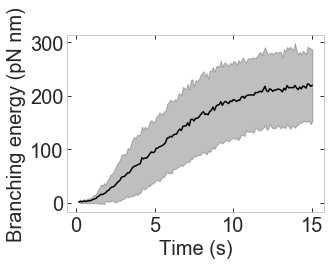

In [68]:

# over time
# branching_energy_run_time = branched_actin_bound_arp.pivot_table(index=['run', 'time'], values='energy_stored', aggfunc='sum')

branching_outside_run_time = branched_actin_bound_arp_outside.pivot_table(index=['run', 'time'], aggfunc={'energy_stored':'sum', 'branch_angle_deg':'mean', 'branching_angle':'mean'})
branching_outside_count_run_time = branched_actin_bound_arp_outside.pivot_table(index=['run', 'time'], aggfunc={'energy_stored':'count'})



# branching_angle_outside_time_mean = branched_actin_bound_arp_outside.pivot_table(index=['time'], aggfunc={'branch_angle_deg':'mean', 'branching_angle':'mean'})
# branching_angle_outside_time_std =  branched_actin_bound_arp_outside.pivot_table(index=['time'], aggfunc={'branch_angle_deg':'std', 'branching_angle':'std'})


# mean std grouped by time
branching_agg_outside_time = branching_outside_run_time.groupby('time')

branching_energy_outside_time_mean = branching_agg_outside_time['energy_stored'].mean()
branching_energy_outside_time_std = branching_agg_outside_time['energy_stored'].std()


# number arp

branching_outside_count_time_mean = branching_outside_count_run_time['energy_stored'].groupby('time').mean()
branching_outside_count_time_std = branching_outside_count_run_time['energy_stored'].groupby('time').std()

# mean of a mean, less data
# branching_angle_time_mean = branching_agg_time['branch_angle_deg'].mean()
# branching_angle_time_std = branching_agg_time['branch_angle_deg'].std()




# mean_bending_energy_direct_vs_time=sum_bending_energy_direct_run_time.groupby('time').mean().iloc[:,0]
# std_bending_energy_direct_vs_time=sum_bending_energy_direct_run_time.groupby('time').std().iloc[:,0]

plt.figure(figsize=[5,4])
plot_multiple_errorbars(branching_energy_outside_time_mean, branching_energy_outside_time_std, 'black', 'Branching energy (pN nm)')   

plt.tight_layout()
plt.savefig('../figures/'+pref+'angular_energy_stored_outside_bud_time.png')
plt.savefig('../figures/'+pref+'angular_energy_stored_outside_bud_time.pdf')

branching_outside_count_time_mean


13729
78.93836364425876
20.03170326114336
670.4853978464679
278.99122955296855 pN nm expected


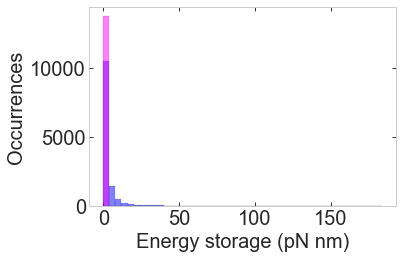

In [318]:
## significance testing: last time point

import scipy
import math

angular_stiffness = 76 # pN nm
resting_angle = math.radians(77)

plt.figure(figsize=[6,4])

bin_range = np.arange(0,185, 4)

arps = branched_actin_bound_arp.reset_index()
arps_angle = arp_angles.reset_index()
# branched_actin_bound_arp['branch_angle_deg'].loc[branched_actin_bound_arp['time'==15.0]]
last_timepoint_arps = arps_angle.loc[arps_angle['time']==15.0]
last_timepoint_arp_angles = last_timepoint_arps['branch_angle_deg']


last_timepoint_arp_angles_rad = last_timepoint_arp_angles*np.pi/180

# 1/2 k theta^2

last_timepoint_energy_stored = 0.5*angular_stiffness*(last_timepoint_arp_angles_rad-resting_angle)*(last_timepoint_arp_angles_rad-resting_angle)

nb_arps = len(last_timepoint_arp_angles)
mean_angle_last_timepoint = np.mean(last_timepoint_arp_angles)
std_angle_last_timepoint = np.std(last_timepoint_arp_angles)

print(nb_arps)
print(mean_angle_last_timepoint)
print(std_angle_last_timepoint)
plt.hist(last_timepoint_energy_stored, bins=bin_range, alpha = 0.5, color = 'blue',  edgecolor='black', linewidth=0.2)

print(str(np.sum(last_timepoint_energy_stored)/len(runs)))

# make normally distributed data 

expected_mean = resting_angle
expected_std  = math.radians(13)

expected_angles = np.random.normal(loc=expected_mean, scale=expected_std, size=nb_arps)
expected_energy_stored = 0.5*angular_stiffness*(expected_angles-resting_angle)*(expected_angles-resting_angle)

plt.hist(expected_angles, bins=bin_range, alpha=0.5, color='magenta',  edgecolor='black', linewidth=0.2)
# len(expected_angles)

print(str(np.sum(expected_energy_stored)/len(runs))+' pN nm expected')

plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)
plt.ylabel('Occurrences')
plt.xlabel('Energy storage (pN nm)')

# plt.xlim([-30, 184])

# tt, pp = scipy.stats.ttest_ind(expected_angles, last_timepoint_arp_angles)
# plt.title('Last time point \n p value: ' + str(pp))
plt.tight_layout()

plt.savefig('../figures/'+pref+'angular_energy_stored_expected_value_t15.png')
plt.savefig('../figures/'+pref+'angular_energy_stored_expected_value_t15.pdf')



In [333]:
print(np.mean(last_timepoint_energy_stored))
print(np.std(last_timepoint_energy_stored))
print(np.sum(last_timepoint_energy_stored>4.114)/len(last_timepoint_energy_stored))
print('\n')
print(np.mean(expected_energy_stored))
print(np.std(expected_energy_stored))

4.6883675572336445
11.046095877194688
0.22922281302352684


1.9508455122066415
2.7501856577261283


sum 297.40746358145924
mean 1.982716423876395
std 2.279193844032094
0.15333333333333332


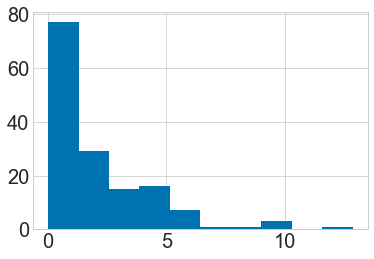

In [331]:
ideal_arps_angle = np.random.normal(loc=expected_mean, scale=expected_std, size=150)
ideal_arps_energy_stored = 0.5*angular_stiffness*(ideal_arps_angle-resting_angle)*(ideal_arps_angle-resting_angle)

plt.hist(ideal_arps_energy_stored)
print('sum '+ str(np.sum(ideal_arps_energy_stored)))
print('mean '+ str(np.mean(ideal_arps_energy_stored)))
print('std '+ str(np.std(ideal_arps_energy_stored)))

print(np.sum(ideal_arps_energy_stored>4.114)/150)

13.075911974920993

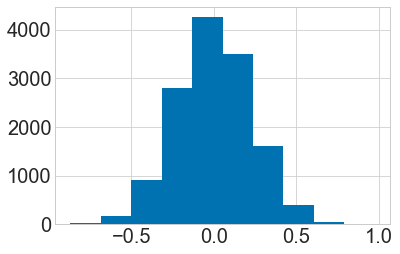

In [312]:
plt.hist(expected_angles-resting_angle)
np.std(expected_angles-resting_angle)*180/np.pi

In [ ]:
# arp angle versus internalization? within each simulation. plot againt each other. 

# and a metric of 

# and bending angle vs internalziation. 

In [ ]:
# arp angle energy storage over time

# in endocytosis cut too!. 

# branch angle w.r.t. PM

In [229]:
# in XYZ

# arps = branched_actin_bound_arp
arp_xdirs   = [(g + h) / 2 for g, h in zip(branched_actin_bound_arp['fiber1_xdir'], branched_actin_bound_arp['fiber2_xdir'])]
arp_ydirs   = [(g + h) / 2 for g, h in zip(branched_actin_bound_arp['fiber1_ydir'], branched_actin_bound_arp['fiber2_ydir'])]
arp_zdirs   = [(g + h) / 2 for g, h in zip(branched_actin_bound_arp['fiber1_zdir'], branched_actin_bound_arp['fiber2_zdir'])]
# arp_zdirs = np.mean(arps['fiber1_zdir'], arps['fiber2_zdir'],axis=0)
branched_actin_bound_arp['branch_xdir']=arp_xdirs 
branched_actin_bound_arp['branch_ydir']=arp_ydirs 
branched_actin_bound_arp['branch_zdir']=arp_zdirs 
branched_actin_bound_arp.head()


run  time  bound_state  arp_id      xpos  nucleating_state  \
0  run0000_0001   0.4            1      25  0.004889                 1   
1  run0000_0001   0.5            1      25  0.004018                 1   
2  run0000_0001   0.6            1      25  0.003005                 1   
3  run0000_0001   0.7            1      25  0.001646                 1   
4  run0000_0001   0.8            1      25  0.001407                 1   

       ypos      zpos      rpos  bound_distance_along_fiber1     ...       \
0  0.039625 -0.388666  0.039925                     0.102615     ...        
1  0.039548 -0.387135  0.039752                     0.102615     ...        
2  0.039348 -0.384087  0.039462                     0.102615     ...        
3  0.038225 -0.380108  0.038261                     0.102615     ...        
4  0.038695 -0.377559  0.038721                     0.102615     ...        

   bud_ypos  bud_zpos  bud_internalization  xpos_recalibrated  \
0 -0.004406 -0.401087            -0.001087           0.010657   
1 -0.003929 -0.400162            -0.000162           0.010672   
2 -0.002359 -0.398350             0.001650           0.008777   
3 -0.003263 -0.394256             0.005744           0.008319   
4 -0.002735 -0.392674             0.007326           0.007896   

   ypos_recalibrated  zpos_recalibrated  rpos_recalibrated  branch_xdir  \
0           0.044031           0.012421           0.045302    -0.248313   
1           0.043478           0.013027           0.044768    -0.062657   
2           0.041707           0.014263           0.042621    -0.589050   
3           0.041488           0.014148           0.042314    -0.643319   
4           0.041430           0.015115           0.042176    -0.621177   

   branch_ydir  branch_zdir  
0     0.595523     0.214297  
1     0.663643    -0.309944  
2     0.189855     0.337859  
3    -0.043867     0.319377  
4    -0.049853     0.252842  

[5 rows x 33 columns]

(array([ 175., 1117., 2223., 2998., 3757., 4190., 4944., 4442., 2862.,
         526.]),
 array([-0.908196 , -0.7182227, -0.5282494, -0.3382761, -0.1483028,
         0.0416705,  0.2316438,  0.4216171,  0.6115904,  0.8015637,
         0.991537 ]),
 <a list of 10 Patch objects>)

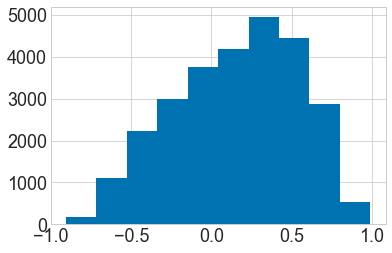

In [230]:
plt.hist(branched_actin_bound_arp.branch_zdir)

In [ ]:
# % Z vs R, relative to unit vector I think. 

In [93]:
bound_hip1r_by_time_mean.iloc[-1]

state    124.072917
Name: 15.0, dtype: float64

<Figure size 432x288 with 0 Axes>

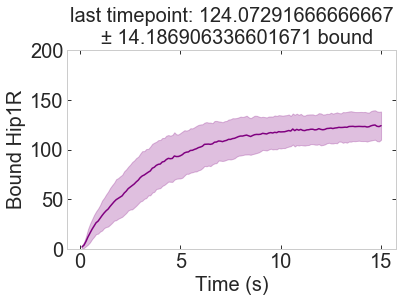

In [100]:
# bound hip1r over time
bound_hip1r = hip1r_recalibrated.loc[hip1r_recalibrated['state'] == 1]

# count, plot

# group by run and time, get total number actin points per run and time point

bound_hip1r_by_run_time    = bound_hip1r.groupby(['run', 'time']).state.count()

bound_hip1r_by_time_mean  = pd.DataFrame(bound_hip1r_by_run_time).groupby('time').mean()
bound_hip1r_by_time_std   = pd.DataFrame(bound_hip1r_by_run_time).groupby('time').std()

# bound_hip1r_by_time_mean.tail()



# plt.savefig('../figures/'+pref+'hip1r_bound_filament_lengths_over_time.png')
# plt.savefig('../figures/'+pref+'hip1r_bound_filament_lengths_over_time.pdf')

plt.figure(figsize=[6,4])

plot_errorbar(bound_hip1r_by_time_mean.iloc[:,0], bound_hip1r_by_time_std.iloc[:,0], 'purple', 'Bound Hip1R')

# get last time point

# ll = branched_actin_bound_ends.reset_index()

last_timepoint_bound_hip1R_mean = bound_hip1r_by_time_mean.iloc[-1].state
last_timepoint_bound_hip1R_std = bound_hip1r_by_time_std.iloc[-1].state

plt.title('last timepoint: ' + str(last_timepoint_bound_hip1R_mean)+ '\n  ± '+ str(last_timepoint_bound_hip1R_std)+ ' bound')

plt.ylim([0, 200])

plt.savefig('../figures/'+pref+'bound_hip1r_vs_time.png')
plt.savefig('../figures/'+pref+'bound_hip1r_vs_time.pdf')



## length distribution actin filanets 

## over time

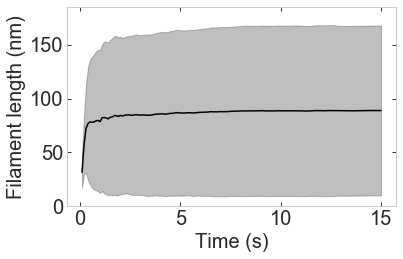

In [102]:
be=branched_actin_bound_ends.set_index(['run','time'])

# arp branch angle over time

lengths = be['length']

# group by run and time, get mean by time point

lengths_by_time_all_mean = lengths.groupby(level=['time']).mean()
lengths_by_time_all_std  = lengths.groupby(level=['time']).std()

plot_errorbar(lengths_by_time_all_mean*1000, lengths_by_time_all_std*1000, 'black', 'Filament length (nm)')

plt.ylim([0, 185])

plt.savefig('../figures/'+pref+'hip1r_bound_filament_lengths_over_time.png')
plt.savefig('../figures/'+pref+'hip1r_bound_filament_lengths_over_time.pdf')

# print('final time point: ' + str(lengths_by_time_all_mean[-1]) + '±' + str(lengths_by_time_all_std[-1]) + 'µm')


## Last time point length histogram. this can be functionalized

last time point length: 88.85665381594931 ± 78.82395187556492


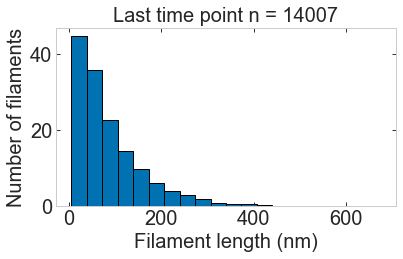

In [103]:
ll = lengths.reset_index()

# filament lengths for last time point
last_timepoint_lengths = ll.loc[ll['time']==15.0].length
# calculate histogram
freq, edges = np.histogram(last_timepoint_lengths*1000,20)

plt.figure(figsize=[6,4])

#  divide by nb simulations
plt.bar(edges[:-1], freq/len(runs), width=np.diff(edges), ec="k", align="edge")

plt.xlabel('Filament length (nm)')
plt.ylabel('Number of filaments')

plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)

plt.title('Last time point n = ' + str(len(last_timepoint_lengths)))
plt.tight_layout()

plt.savefig('../figures/'+pref+'filament_lengths_t15.png')
plt.savefig('../figures/'+pref+'filament_lengths_t15.pdf')
print('last time point length: '+  str(np.mean(last_timepoint_lengths)*1000) + ' ± ' + str(np.std(last_timepoint_lengths)*1000))



## number growing and capped ends over time

In [6]:
# get capped or growing ends in branched actin network bound to hip1r

growing_ends = branched_actin_bound_ends.loc[branched_actin_bound_ends['plus_state']==1]
capped_ends  = branched_actin_bound_ends.loc[branched_actin_bound_ends['plus_state']==4]

all_ends = branched_actin_bound_ends

# group by run and time, get total number actin points per run and time point

growing_ends_by_run_time = growing_ends.groupby(['run', 'time']).fiber_id.count()
capped_ends_by_run_time = capped_ends.groupby(['run', 'time']).fiber_id.count()
all_ends_by_run_time    = all_ends.groupby(['run', 'time']).fiber_id.count()

growing_ends_by_time_mean = pd.DataFrame(growing_ends_by_run_time).groupby('time').mean()
growing_ends_by_time_std = pd.DataFrame(growing_ends_by_run_time).groupby('time').std()

capped_ends_by_time_mean = pd.DataFrame(capped_ends_by_run_time).groupby('time').mean()
capped_ends_by_time_std = pd.DataFrame(capped_ends_by_run_time).groupby('time').std()

all_ends_by_time_mean = pd.DataFrame(all_ends_by_run_time).groupby('time').mean()
all_ends_by_time_std  = pd.DataFrame(all_ends_by_run_time).groupby('time').std()




all_ends_by_time_mean.tail()


fiber_id
time            
14.6  118.229167
14.7  118.229167
14.8  118.166667
14.9  117.854167
15.0  117.750000

In [55]:
# diagnostic

# data_frame = growing_ends


# merged = pd.merge(solid_positions, data_frame, on=['run','time'], how = 'outer')

# # use pivot table to identify number of columns in the ends dataframe. other runs, timepoints will be 0

# data_frame_time_count = merged.pivot_table(index=['run', 'time'], values='fiber_id', fill_value=0, dropna = True, aggfunc='count')

# # mean std grouped by time

# mean_nb_vs_time=data_frame_time_count.groupby('time').mean().iloc[:,0]
# std_nb_vs_time=data_frame_time_count.groupby('time').std().iloc[:,0]

# #     return [mean_nb_vs_time, std_nb_vs_time]

# data_frame_time_count.groupby('time').describe()

In [7]:
# try again with merge to solid_positions to account for runs or time points with no ends

def get_mean_count_time(data_frame):
# merge with solid to get remaing timepoints (which will count as 0)

    merged = pd.merge(solid_positions, data_frame, on=['run','time'], how = 'outer')

    # use pivot table to identify number of columns in the ends dataframe. other runs, timepoints will be 0

    data_frame_time_count = merged.pivot_table(index=['run', 'time'], values='plus_state', fill_value=0, dropna = True, aggfunc='count')

    # mean std grouped by time

    mean_nb_vs_time=data_frame_time_count.groupby('time').mean().iloc[:,0]
    std_nb_vs_time=data_frame_time_count.groupby('time').std().iloc[:,0]
    
    return [mean_nb_vs_time, std_nb_vs_time]

growing_ends_time_mean, growing_ends_time_std = get_mean_count_time(growing_ends)
capped_ends_time_mean, capped_ends_time_std = get_mean_count_time(capped_ends)

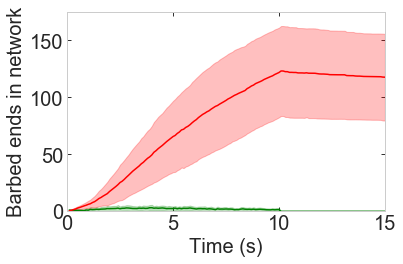

In [8]:
# plot

plt.figure(figsize=(6,4))
plt.rc('font', size=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

color='green'
times = growing_ends_time_mean.index
plt.plot(times,growing_ends_time_mean, c=color)
yminus=growing_ends_time_mean-growing_ends_time_std
yplus=growing_ends_time_mean+growing_ends_time_std

plt.fill_between(times, np.array(yminus), np.array(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 

color='red'

plt.plot(times,capped_ends_time_mean, c=color)
yminus=capped_ends_time_mean-capped_ends_time_std
yplus=capped_ends_time_mean+capped_ends_time_std

plt.fill_between(times, np.array(yminus), np.array(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 



plt.xlabel('Time (s)')
plt.ylabel('Barbed ends in network')

plt.ylim([0, 175])
plt.xlim([0, 15])

plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)
plt.tight_layout()

plt.savefig('../figures/'+pref+'actin_ends_vs_time_solid-merge.png')
plt.savefig('../figures/'+pref+'actin_ends_vs_time_solid-merge.pdf')
plt.show()

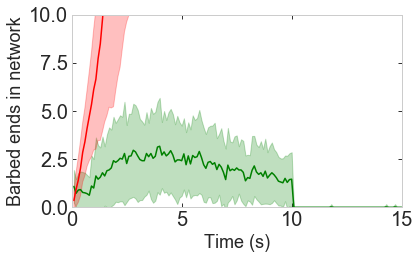

In [14]:
# plot zoom Y

plt.figure(figsize=(6,4))
plt.rc('font', size=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

color='green'

plt.plot(times,growing_ends_time_mean, c=color)
yminus=growing_ends_time_mean-growing_ends_time_std
yplus=growing_ends_time_mean+growing_ends_time_std

plt.fill_between(times, np.array(yminus), np.array(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 

color='red'

plt.plot(times,capped_ends_time_mean, c=color)
yminus=capped_ends_time_mean-capped_ends_time_std
yplus=capped_ends_time_mean+capped_ends_time_std

plt.fill_between(times, np.array(yminus), np.array(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 



plt.xlabel('Time (s)')
plt.ylabel('Barbed ends in network')

plt.ylim([0, 10])
plt.xlim([0, 15])

plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)

plt.tight_layout()

plt.savefig('../figures/'+pref+'actin_ends_vs_time_zoomY_solid_merge.png')
plt.savefig('../figures/'+pref+'actin_ends_vs_time_zoomY_solid_merge.pdf')

plt.show()


## Number ends total over tiem (same as number filaments)

<Figure size 432x288 with 0 Axes>

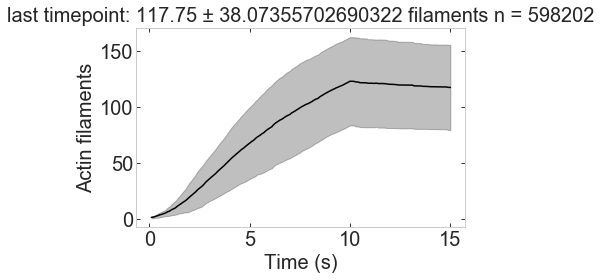

In [9]:
plt.figure(figsize=[6,4])

plot_errorbar(all_ends_by_time_mean.iloc[:,0], all_ends_by_time_std.iloc[:,0], 'black', 'Actin filaments')

# get last time point

# ll = branched_actin_bound_ends.reset_index()

last_timepoint_mean_nb_filaments = all_ends_by_time_mean.iloc[-1].fiber_id
last_timepoint_std_nb_filaments = all_ends_by_time_std.iloc[-1].fiber_id

plt.title('last timepoint: ' + str(last_timepoint_mean_nb_filaments)+ ' ± '+ str(last_timepoint_std_nb_filaments)+ ' filaments n = ' + str(len(branched_actin_bound_ends.fiber_id)))

plt.savefig('../figures/'+pref+'actin_filaments_vs_time.png')
plt.savefig('../figures/'+pref+'actin_filaments_vs_time.pdf')




In [ ]:
print('last time point length: '+  str(np.mean(last_timepoint_lengths)*1000) + ' ± ' + str(np.std(last_timepoint_lengths)*1000))



## plot distribution of capped ends ( or all ends)

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


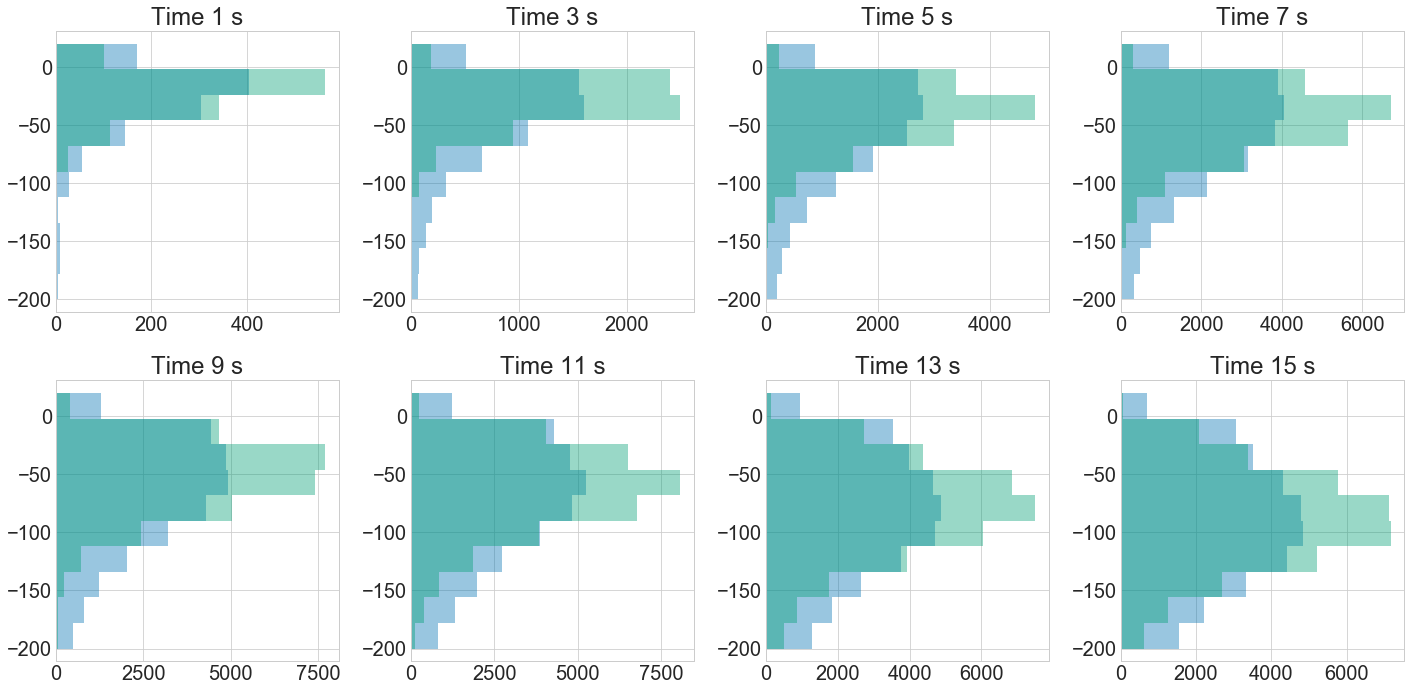

In [17]:
plt.figure(figsize=(20,10))

# plot one second intervals, show every other time point.

for i, timept in enumerate(range(1,16,2),start=1):
    
#     print(i)
    print('time ' + str(timept))
    # bin ± 0.5s as interval
    
    branched_actin_bound_ends_time=branched_actin_bound_ends.loc[branched_actin_bound_ends['time']>(timept-1)].loc[branched_actin_bound_ends['time']<=(timept)]

    times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

    # set position

    x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000
    z_plus_time = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)

    x_minus_time = branched_actin_bound_ends_time.minus_xpos_recalibrated*1000
    z_minus_time = (branched_actin_bound_ends_time.minus_zpos+0.4)*(-1000)
    
#     x = new_actin_pos_time['xpos_recalibrated']*1000
#     y = (new_actin_pos_time['zpos']+0.4)*(-1000)

    # set number of bins (kind of like pixel size) here. 
    
    # x: 600 points, 30 bins is about 20 nm pixel.
    # z: about 10 nm pixel
    
#     model_points_plus,xs,ys=np.histogram2d(x_plus_time,z_plus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
#     model_points_plus=np.flipud(np.rot90(model_points_plus))

#     model_points_minus,xs,ys=np.histogram2d(x_minus_time,z_minus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
#     model_points_minus=np.flipud(np.rot90(model_points_minus))    
    
    
#     growing_ends_z_dist = hist
#     capped_ends_z_dist =
#     minus_ends_z_dist = hist(z_minus_time)
    
    # histogram (sum) for one time

    # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.
    # assuming that nb time points is same for all runs. using one model point = 10 nm and one actin subunit is 2.75 nm.

#     model_points_plus=model_points_plus/len(runs)/times_per_timept
#     model_points_minus=model_points_minus/len(runs)/times_per_timept

##     average over time and runs


    plt.subplot(2, 4, i)

#     plt.pcolormesh(xs, ys, model_points_plus)
    plus_ends_z_dist  = plt.hist(z_plus_time, range = [-200, 20], orientation = 'horizontal', alpha = 0.4)
    minus_ends_z_dist = plt.hist(z_minus_time, range = [-200, 20], orientation = 'horizontal', alpha = 0.4)




#     cb = plt.colorbar(label = 'Actin monomers')
    plt.title('Time ' + str(timept) + ' s', fontsize=24)

    # log scale 
    # plt.hist2d(x, y, bins = 40, norm=LogNorm())


#     plt.xlim([-300, 300])
#     plt.ylim(bottom = -199)

    # max colormap to show
    
#     plt.clim([0, 15])
    
#     plt.xlabel('x (nm)')
#     plt.ylabel('Z (nm)')
    
    plt.xticks(size=20)
    plt.yticks(size=20)

    plt.tight_layout()
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'plus_minus_ends_Z_dist_time_subplots.png')
    plt.savefig('../figures/'+pref+'plus_minus_ends_Z_dist_time_subplots.pdf')
    

(array([ 2302.,  4599., 10296., 21508., 38892., 58817., 73454., 71204.,
        47706.,  3423.]),
 array([-200., -178., -156., -134., -112.,  -90.,  -68.,  -46.,  -24.,
          -2.,   20.]),
 <a list of 10 Patch objects>)

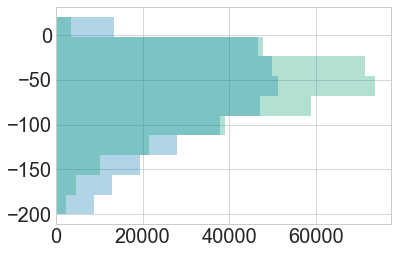

In [19]:

x_plus = branched_actin_bound_ends.plus_xpos_recalibrated
z_plus = (branched_actin_bound_ends.plus_zpos+0.4)*(-1000)


x_minus = branched_actin_bound_ends.minus_xpos_recalibrated
z_minus = (branched_actin_bound_ends.minus_zpos+0.4)*(-1000)

plt.hist(z_plus, alpha = 0.3, range = [-200, 20], orientation = 'horizontal')
plt.hist(z_minus, alpha = 0.3, range = [-200, 20], orientation = 'horizontal')





In [25]:
# plt.figure(1, figsize=(20,10))
# plt.figure(2, figsize=(20,10))


# # plot one second intervals, show every other time point.
# plt.cm.get_cmap('seismic')
# plt.set_cmap('seismic')
# counts_plus_vs_minus_time = []

# for i, timept in enumerate(range(1,16,2),start=1):
    
# #     print(i)
#     print('time ' + str(timept))
    
#     # bin ± 0.5s as interval
    
#     branched_actin_bound_ends_time=branched_actin_bound_ends.loc[branched_actin_bound_ends['time']>(timept-1)].loc[branched_actin_bound_ends['time']<=(timept)]

#     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

#     counts_plus, bins, bars  = plt.hist(z_plus_time, bins=22, range=[-200, 20])
#     counts_minus, bins, bars = plt.hist(z_minus_time, bins=22, range=[-200, 20]) 
 
#     counts_plus=counts_plus/len(runs)/times_per_timept
#     counts_minus=counts_minus/len(runs)/times_per_timept

#     # difference between plus and minus ends. positive is more plus ends.
#     counts_plus_vs_minus = counts_plus-counts_minus
    
#     counts_plus_vs_minus_time.append(model_points_plus_vs_minus)
    
# #     print(counts_plus_vs_minus)
#     plt.figure(2)
#     plt.subplot(2, 4, i)
#     plt.plot(bins[:-1], counts_plus_vs_minus, alpha = 0.3)


# #     make this some kind of heat map! 1D, or histogram, or something.
    
# # plt.pcolormesh(bins, range(1,16,2), counts_plus_vs_minus_time)


# #     cb = plt.colorbar(label = 'Actin monomers')
# plt.title('Time ' + str(timept) + ' s', fontsize=24)


    

## convert this to a heat map over time or type of kymograph

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


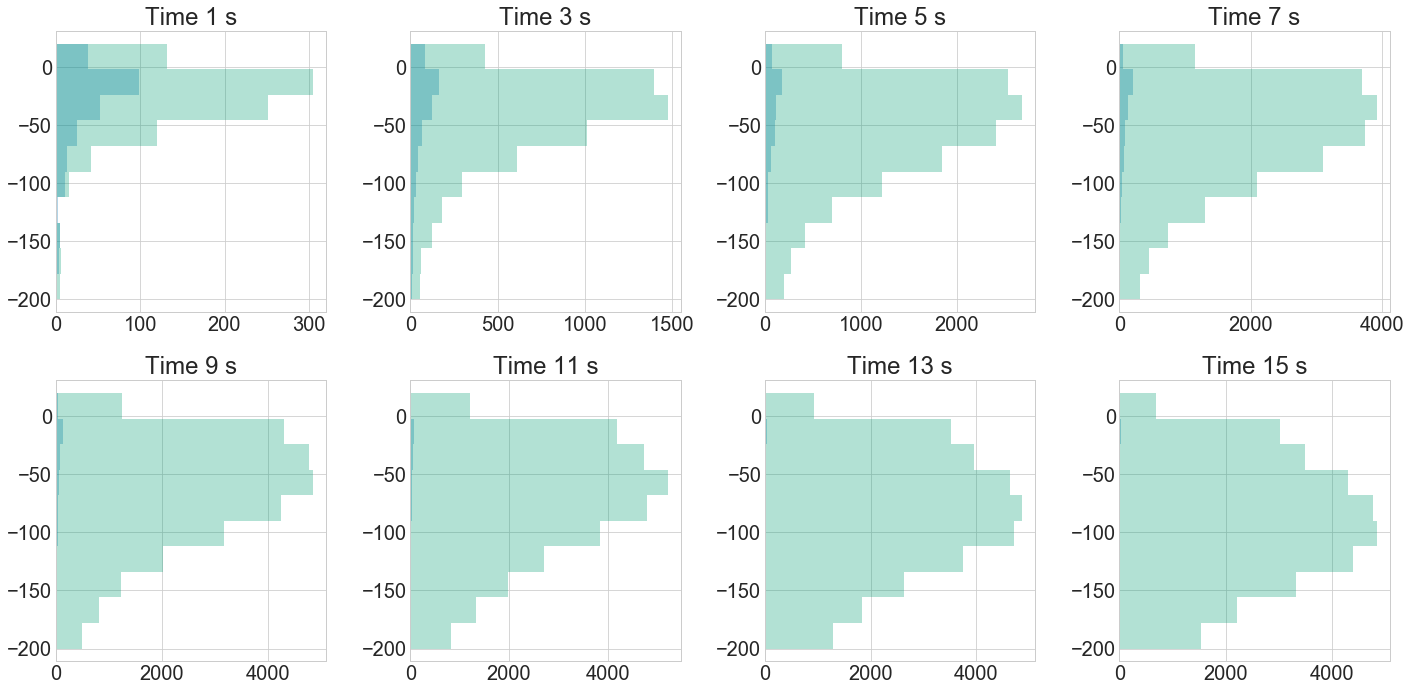

In [21]:
## growing ends

# growing ends

plt.figure(figsize=(20,10))
# plt.set_cmap('hot')


# plot one second intervals, show every other time point.

for i, timept in enumerate(range(1,16,2),start=1):
    
#     print(i)
    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    
    branched_actin_bound_ends_time=branched_actin_bound_ends.loc[branched_actin_bound_ends['time']>(timept-1)].loc[branched_actin_bound_ends['time']<=(timept)]

#     only growing
    branched_actin_bound_ends_growing_time = branched_actin_bound_ends_time.loc[branched_actin_bound_ends_time['plus_state']==1]
#     only capped
    branched_actin_bound_ends_capped_time = branched_actin_bound_ends_time.loc[branched_actin_bound_ends_time['plus_state']==4]
    
    times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

    # set position

    x_plus_time = branched_actin_bound_ends_growing_time.plus_xpos_recalibrated*1000
    z_plus_time = (branched_actin_bound_ends_growing_time.plus_zpos+0.4)*(-1000)
    
    z_plus_capped_time = (branched_actin_bound_ends_capped_time.plus_zpos+0.4)*(-1000)

    plt.subplot(2, 4, i)
    
    plt.hist(z_plus_time, alpha = 0.3, range = [-200, 20], orientation = 'horizontal')
    plt.hist(z_plus_capped_time, alpha = 0.3, range = [-200, 20], orientation = 'horizontal')
    

#     cb = plt.colorbar(label = 'Actin monomers')
    plt.title('Time ' + str(timept) + ' s', fontsize=24)

    # log scale 
    # plt.hist2d(x, y, bins = 40, norm=LogNorm())


#     plt.xlim([-300, 300])
#     plt.ylim(bottom = -199)

    # max colormap to show
    
#     plt.clim([0, 15])
    
#     plt.xlabel('x (nm)')
#     plt.ylabel('Z (nm)')
    
    plt.xticks(size=20)
    plt.yticks(size=20)

    plt.tight_layout()
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'growing_capped_ends_Z_hist_time_subplots.png')
    plt.savefig('../figures/'+pref+'growing_capped_ends_Z_hist_time_subplots.pdf')
    

## all plus ends

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


<Figure size 432x288 with 0 Axes>

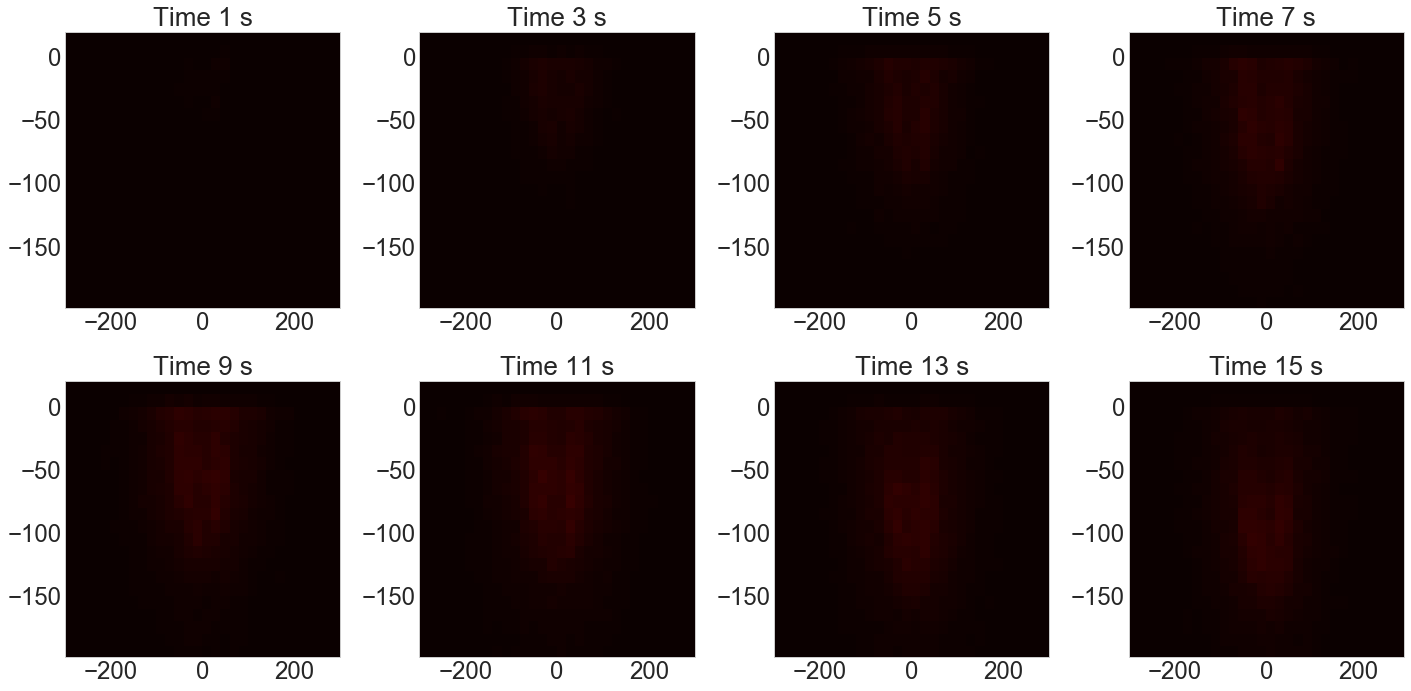

In [24]:
plt.cm.get_cmap('hot')
plt.set_cmap('hot')

plt.figure(figsize=(20,10))

# plot one second intervals, show every other time point.

for i, timept in enumerate(range(1,16,2),start=1):
    
#     print(i)
    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    
    branched_actin_bound_ends_time=branched_actin_bound_ends.loc[branched_actin_bound_ends['time']>(timept-1)].loc[branched_actin_bound_ends['time']<=(timept)]

    runs = sorted(list(set(branched_actin_bound_ends_time.run)), key = lambda x:int(x[-2:]))
    times_per_timept=len(sorted(list(set(branched_actin_bound_ends_time.time))))

    # set position

    x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000
    z_plus_time = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)

    x_minus_time = branched_actin_bound_ends_time.minus_xpos_recalibrated*1000
    z_minus_time = (branched_actin_bound_ends_time.minus_zpos+0.4)*(-1000)
    
#     x = new_actin_pos_time['xpos_recalibrated']*1000
#     y = (new_actin_pos_time['zpos']+0.4)*(-1000)

    # set number of bins (kind of like pixel size) here. 
    
    # x: 600 points, 30 bins is about 20 nm pixel.
    # z: about 10 nm pixel
    
    model_points_plus,xs,ys=np.histogram2d(x_plus_time,z_plus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
    model_points_plus=np.flipud(np.rot90(model_points_plus))

    model_points_minus,xs,ys=np.histogram2d(x_minus_time,z_minus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
    model_points_minus=np.flipud(np.rot90(model_points_minus))    
    
    # histogram (sum) for one time

    # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.
    # assuming that nb time points is same for all runs. using one model point = 10 nm and one actin subunit is 2.75 nm.

    model_points_plus=model_points_plus/len(runs)/times_per_timept
    model_points_minus=model_points_minus/len(runs)/times_per_timept


    plt.subplot(2, 4, i)

    plt.pcolormesh(xs, ys, model_points_plus)


#     cb = plt.colorbar(label = 'Actin monomers')
    plt.title('Time ' + str(timept) + ' s', fontsize=26)

    # log scale 
    # plt.hist2d(x, y, bins = 40, norm=LogNorm())


    plt.xlim([-300, 300])
    plt.ylim(bottom = -199)

    # max colormap to show
    
    plt.clim([0, 15])
    
#     plt.xlabel('x (nm)')
#     plt.ylabel('Z (nm)')
    
    plt.xticks(size=24)
    plt.yticks(size=24)

    plt.tight_layout()



if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_plus_ends_map_XZ_time_subplots.png')
    plt.savefig('../figures/'+pref+'_plus_ends_map_XZ_time_subplots.pdf')
    


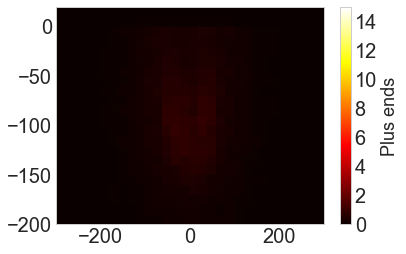

In [25]:
plt.figure()
plt.pcolormesh(xs, ys, model_points_plus)
plt.clim([0, 15])
plt.colorbar(label = 'Plus ends')

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_plus_ends_map_XZ_time_subplots_colorbar.png')

plt.show()

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


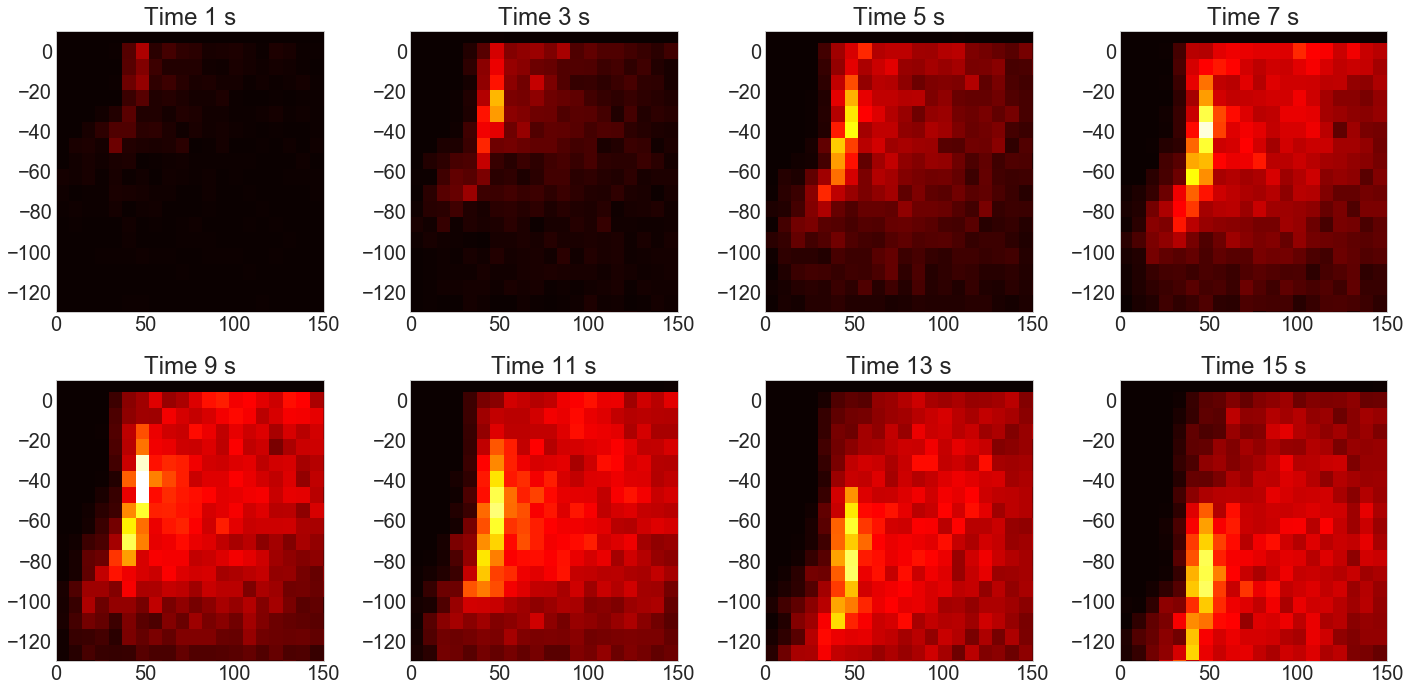

In [23]:
plt.figure(figsize=(20,10))

# plot one second intervals, show every other time point.

for i, timept in enumerate(range(1,16,2),start=1):
    
#     print(i)
    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    
    branched_actin_bound_ends_time=branched_actin_bound_ends.loc[branched_actin_bound_ends['time']>(timept-1)].loc[branched_actin_bound_ends['time']<=(timept)]

    times_per_timept=len(sorted(list(set(branched_actin_bound_ends_time.reset_index().time))))

    # set position

    x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000
    r_plus_time = branched_actin_bound_ends_time.plus_rpos_recalibrated*1000
    z_plus_time = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)

    x_minus_time = branched_actin_bound_ends_time.minus_xpos_recalibrated*1000
    z_minus_time = (branched_actin_bound_ends_time.minus_zpos+0.4)*(-1000)
    
    # set number of bins (kind of like pixel size) here. 
    
    # x: 600 points, 30 bins is about 20 nm pixel.
    # z: about 10 nm pixel
    
    model_points_plus,xs,ys=np.histogram2d(r_plus_time,z_plus_time,bins=[40,28],range=[[0, 300],[-200, 20]])
    model_points_plus=np.flipud(np.rot90(model_points_plus))


    # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.
    # assuming that nb time points is same for all runs. using one model point = 10 nm and one actin subunit is 2.75 nm.

    model_points_plus=model_points_plus/len(runs)/times_per_timept
#     model_points_minus=model_points_minus/len(runs)/times_per_timept


    plt.subplot(2, 4, i)

    plt.pcolormesh(xs, ys, model_points_plus)


#     cb = plt.colorbar(label = 'Actin monomers')
    plt.title('Time ' + str(timept) + ' s', fontsize=24)

    # log scale 
    # plt.hist2d(x, y, bins = 40, norm=LogNorm())


    plt.xlim([0, 150])
    plt.ylim([-130,10])

    # max colormap to show
    
    plt.clim([0, 1])
    
#     plt.xlabel('x (nm)')
#     plt.ylabel('Z (nm)')
    
    plt.xticks(size=20)
    plt.yticks(size=20)

    plt.tight_layout()
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'plus_ends_map_RZ_time_subplots.png')
    plt.savefig('../figures/'+pref+'plus_ends_map_RZ_time_subplots.pdf')

In [24]:
# movie of barbed end growing ends, all 150 time points as png.

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


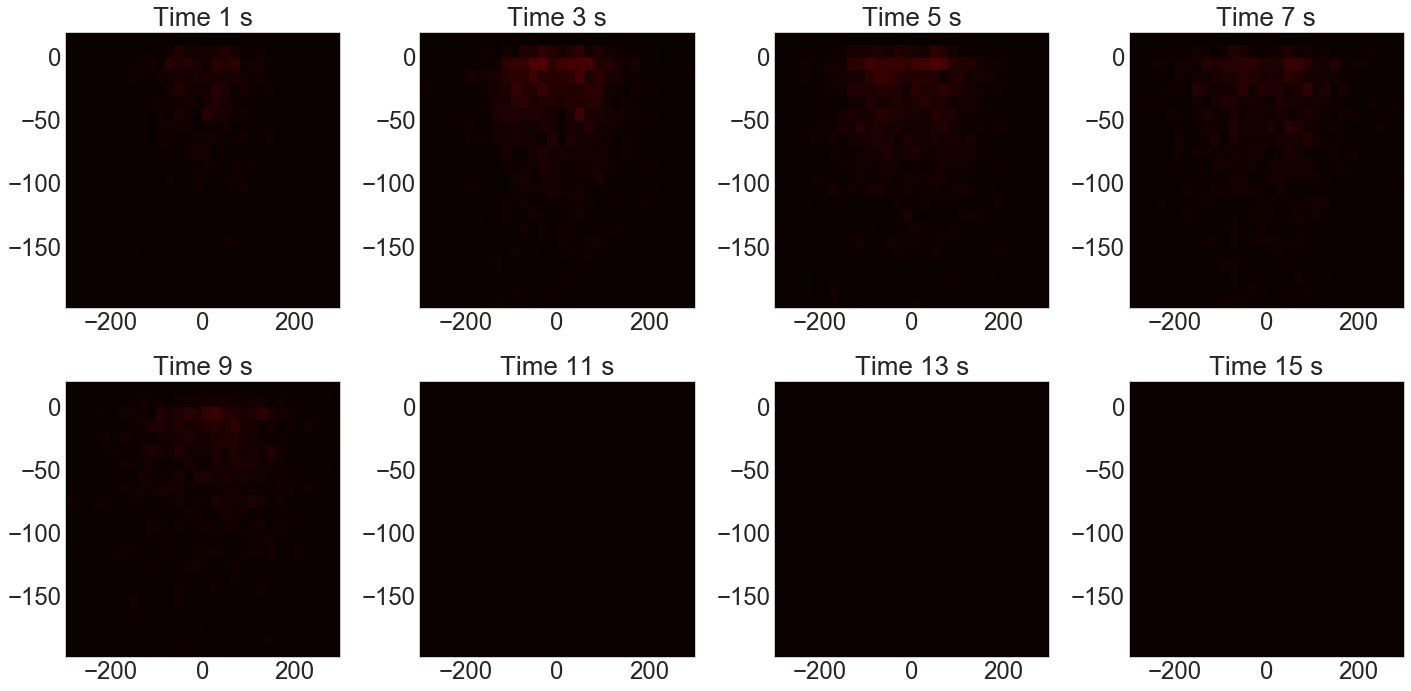

In [27]:
# growing ends

plt.figure(figsize=(20,10))
plt.set_cmap('hot')


# plot one second intervals, show every other time point.

for i, timept in enumerate(range(1,16,2),start=1):
    
#     print(i)
    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    
    branched_actin_bound_ends_time=branched_actin_bound_ends.loc[branched_actin_bound_ends['time']>(timept-1)].loc[branched_actin_bound_ends['time']<=(timept)]

#     only growing
    branched_actin_bound_ends_growing_time = branched_actin_bound_ends_time.loc[branched_actin_bound_ends_time['plus_state']==1]
#     only capped
    branched_actin_bound_ends_capped_time = branched_actin_bound_ends_time.loc[branched_actin_bound_ends_time['plus_state']==4]

    
    times_per_timept=len(sorted(list(set(branched_actin_bound_ends_time.time))))

    # set position

    x_plus_time = branched_actin_bound_ends_growing_time.plus_xpos_recalibrated*1000
    z_plus_time = (branched_actin_bound_ends_growing_time.plus_zpos+0.4)*(-1000)


    # set number of bins (kind of like pixel size) here. 
    
    # x: 600 points, 30 bins is about 20 nm pixel.
    # z: about 10 nm pixel
    
    model_points_plus,xs,ys=np.histogram2d(x_plus_time,z_plus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
    model_points_plus=np.flipud(np.rot90(model_points_plus))

    model_points_minus,xs,ys=np.histogram2d(x_minus_time,z_minus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
    model_points_minus=np.flipud(np.rot90(model_points_minus))    
    
    # histogram (sum) for one time

    # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.
    # assuming that nb time points is same for all runs. using one model point = 10 nm and one actin subunit is 2.75 nm.

    model_points_plus=model_points_plus/len(runs)/times_per_timept
    model_points_minus=model_points_minus/len(runs)/times_per_timept


    plt.subplot(2, 4, i)

    plt.pcolormesh(xs, ys, model_points_plus)


#     cb = plt.colorbar(label = 'growing ends')
    plt.title('Time ' + str(timept) + ' s', fontsize=26)

    # log scale 
    # plt.hist2d(x, y, bins = 40, norm=LogNorm())

    plt.xlim([-300, 300])
    plt.ylim(bottom = -199)

    # max colormap to show
    
    plt.clim([0, 0.5])
    plt.xticks(size=24)
    plt.yticks(size=24)

    plt.tight_layout()
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_growing_plus_ends_map_XZ_time_subplots.png')
    plt.savefig('../figures/'+pref+'_growing_plus_ends_map_XZ_time_subplots.pdf')

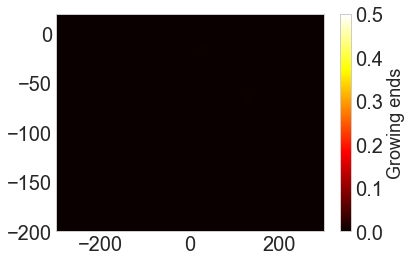

In [28]:
plt.figure()
plt.pcolormesh(xs, ys, model_points_plus)
plt.clim([0, 0.5])
plt.colorbar(label = 'Growing ends')

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_growing_plus_ends_map_XZ_time_subplots_colorbar.png')

plt.show()

In [30]:
# # growing ends

# plt.figure(figsize=(20,10))
# plt.set_cmap('hot')


# # plot one second intervals, show every other time point.

# for i, timept in enumerate(range(1,16,2),start=1):
    
# #     print(i)
#     print('time ' + str(timept))
    
#     # bin ± 0.5s as interval
    
#     branched_actin_bound_ends_time=branched_actin_bound_ends.loc[branched_actin_bound_ends['time']>(timept-1)].loc[branched_actin_bound_ends['time']<=(timept)]

# #     only growing
#     branched_actin_bound_ends_growing_time = branched_actin_bound_ends_time.loc[branched_actin_bound_ends_time['plus_state']==1]
# #     only capped
#     branched_actin_bound_ends_capped_time = branched_actin_bound_ends_time.loc[branched_actin_bound_ends_time['plus_state']==4]

    
#     times_per_timept=len(sorted(list(set(branched_actin_bound_ends_time.reset_index().time))))

#     # set position

#     x_plus_time = branched_actin_bound_ends_growing_time.plus_xpos_recalibrated*1000
#     r_plus_time = branched_actin_bound_ends_growing_time.plus_rpos_recalibrated*1000

#     z_plus_time = (branched_actin_bound_ends_growing_time.plus_zpos+0.4)*(-1000)

    
    
# #     x_minus_time = branched_actin_bound_ends_time.minus_xpos_recalibrated*1000
# #     z_minus_time = (branched_actin_bound_ends_time.minus_zpos+0.4)*(-1000)
    
# #     x = new_actin_pos_time['xpos_recalibrated']*1000
# #     y = (new_actin_pos_time['zpos']+0.4)*(-1000)

#     # set number of bins (kind of like pixel size) here. 
    
#     # x: 600 points, 30 bins is about 20 nm pixel.
#     # z: about 10 nm pixel
    
#     model_points_plus,xs,ys=np.histogram2d(r_plus_time,z_plus_time,bins=[40,28],range=[[0,300],[-200, 20]])
#     model_points_plus=np.flipud(np.rot90(model_points_plus))

# #     model_points_minus,xs,ys=np.histogram2d(x_minus_time,z_minus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
# #     model_points_minus=np.flipud(np.rot90(model_points_minus))    
    
#     # histogram (sum) for one time

#     # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.
#     # assuming that nb time points is same for all runs. using one model point = 10 nm and one actin subunit is 2.75 nm.

#     model_points_plus=model_points_plus/len(runs)/times_per_timept
# #     model_points_minus=model_points_minus/len(runs)/times_per_timept


#     plt.subplot(2, 4, i)

#     plt.pcolormesh(xs, ys, model_points_plus)


#     cb = plt.colorbar(label = 'growing ends')
#     plt.title('Time ' + str(timept) + ' s', fontsize=24)

#     # log scale 
#     # plt.hist2d(x, y, bins = 40, norm=LogNorm())


#     plt.xlim([0, 200])
#     plt.ylim([-150,10])

#     # max colormap to show
    
#     plt.clim([0, 0.1])
    
# #     plt.xlabel('x (nm)')
# #     plt.ylabel('Z (nm)')
    
#     plt.xticks(size=20)
#     plt.yticks(size=20)

#     plt.tight_layout()
    
# if save_figures == 'yes': 
#     plt.savefig('../figures/'+pref+'growing_plus_ends_map_RZ_time_subplots.png')
#     plt.savefig('../figures/'+pref+'growing_plus_ends_map_RZ_time_subplots.pdf')

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


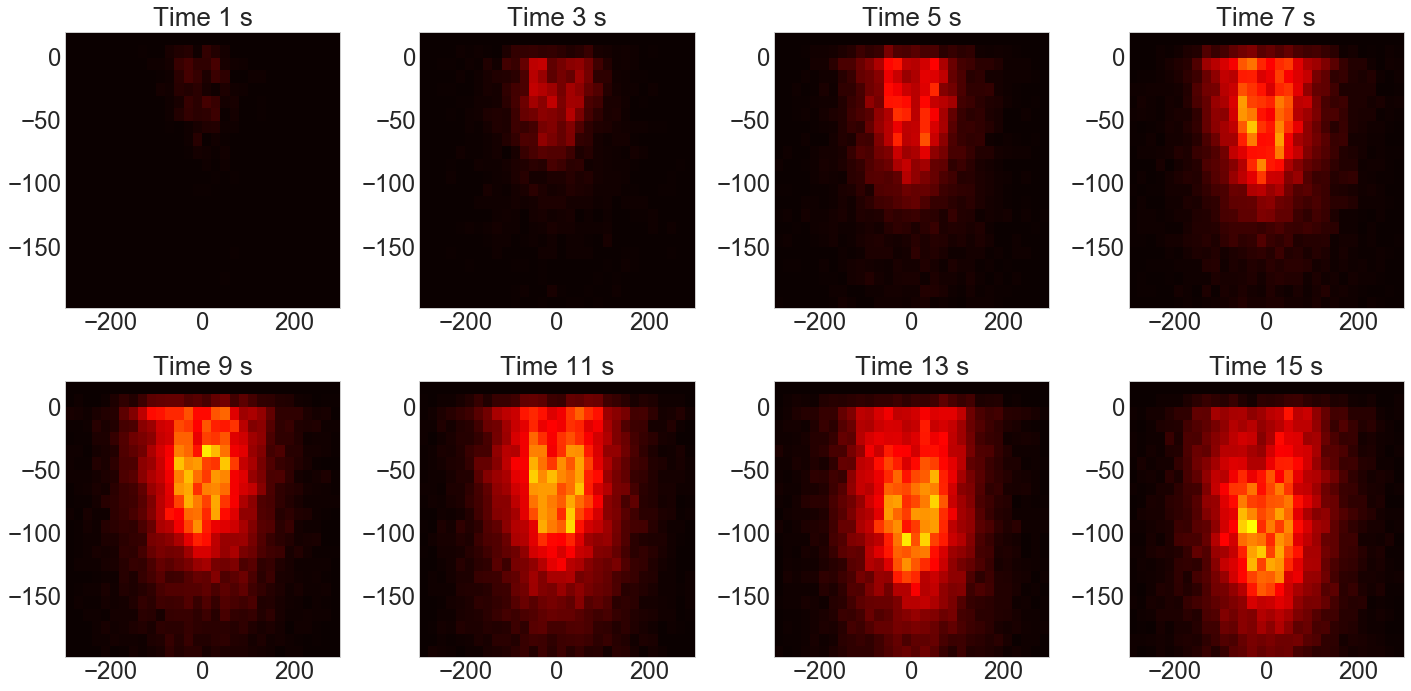

In [23]:
# capped ends

plt.figure(figsize=(20,10))
plt.set_cmap('hot')


# plot one second intervals, show every other time point.

for i, timept in enumerate(range(1,16,2),start=1):
    
#     print(i)
    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    
    branched_actin_bound_ends_time=branched_actin_bound_ends.loc[branched_actin_bound_ends['time']>(timept-1)].loc[branched_actin_bound_ends['time']<=(timept)]

#     only growing
    branched_actin_bound_ends_growing_time = branched_actin_bound_ends_time.loc[branched_actin_bound_ends_time['plus_state']==1]
#     only capped
    branched_actin_bound_ends_capped_time = branched_actin_bound_ends_time.loc[branched_actin_bound_ends_time['plus_state']==4]

    
    times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

    # set position

    x_plus_time = branched_actin_bound_ends_capped_time.plus_xpos_recalibrated*1000
    z_plus_time = (branched_actin_bound_ends_capped_time.plus_zpos+0.4)*(-1000)

    # set number of bins (kind of like pixel size) here. 
    
    # x: 600 points, 30 bins is about 20 nm pixel.
    # z: about 10 nm pixel
    
    model_points_plus,xs,ys=np.histogram2d(x_plus_time,z_plus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
    model_points_plus=np.flipud(np.rot90(model_points_plus))

#     model_points_minus,xs,ys=np.histogram2d(x_minus_time,z_minus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
#     model_points_minus=np.flipud(np.rot90(model_points_minus))    
    
    # histogram (sum) for one time

    # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.
    # assuming that nb time points is same for all runs. using one model point = 10 nm and one actin subunit is 2.75 nm.

    model_points_plus=model_points_plus/len(runs)/times_per_timept
#     model_points_minus=model_points_minus/len(runs)/times_per_timept


    plt.subplot(2, 4, i)

    plt.pcolormesh(xs, ys, model_points_plus)


#     cb = plt.colorbar(label = 'capped ends')
    plt.title('Time ' + str(timept) + ' s', fontsize=26)

    # log scale 
    # plt.hist2d(x, y, bins = 40, norm=LogNorm())


    plt.xlim([-300, 300])
    plt.ylim(bottom = -199)

    # max colormap to show
    
    plt.clim([0, 15])
    
#     plt.xlabel('x (nm)')
#     plt.ylabel('Z (nm)')
    
    plt.xticks(size=24)
    plt.yticks(size=24)

    plt.tight_layout()
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_capped_plus_ends_map_XZ_time_subplots.png')
    plt.savefig('../figures/'+pref+'_capped_plus_ends_map_XZ_time_subplots.pdf')

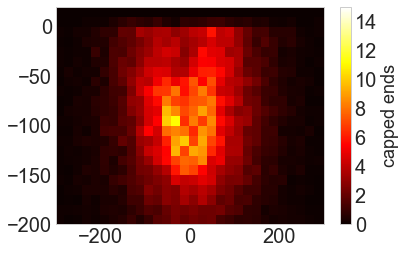

In [24]:
plt.figure()
plt.pcolormesh(xs, ys, model_points_plus)
plt.clim([0, 15])
plt.colorbar(label = 'capped ends')

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_capped_plus_ends_XZ_time_subplots_colorbar.png')

plt.show()



## minus ends

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


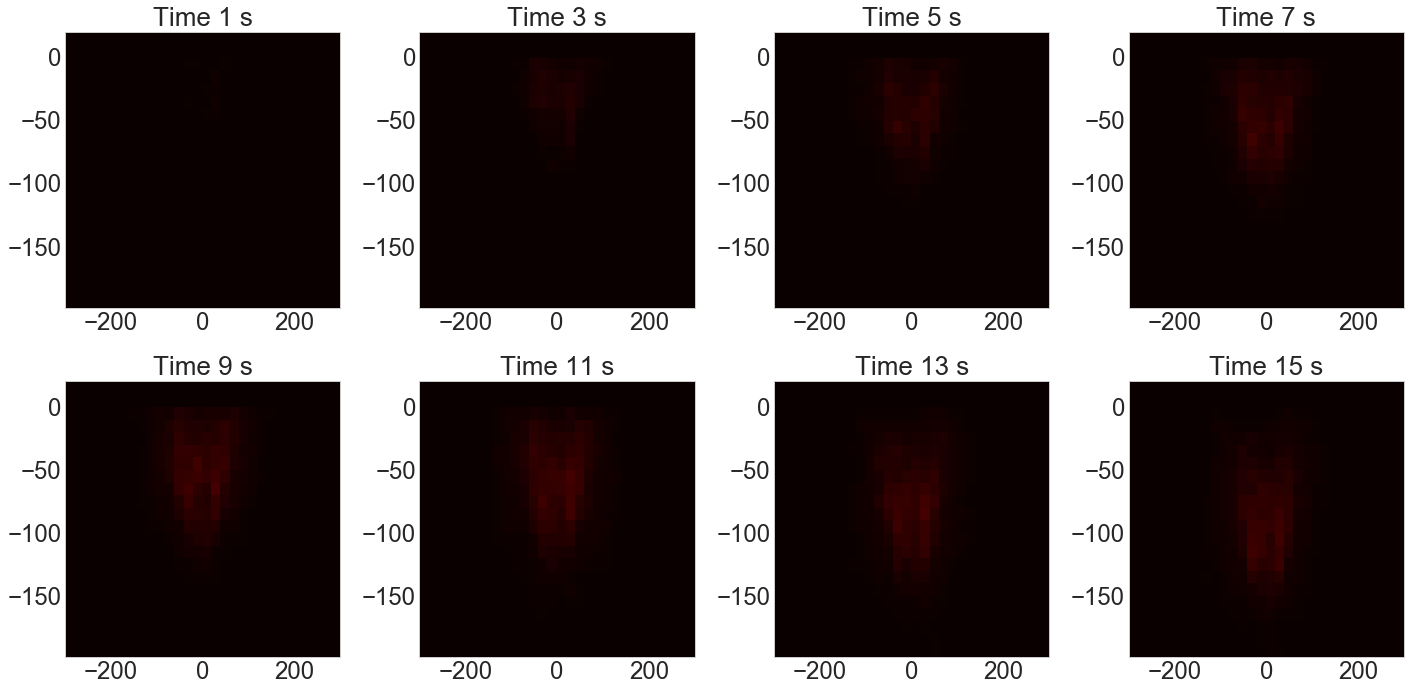

In [29]:
plt.figure(figsize=(20,10))

# plot one second intervals, show every other time point.

for i, timept in enumerate(range(1,16,2),start=1):
    
#     print(i)
    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    
    branched_actin_bound_ends_time=branched_actin_bound_ends.loc[branched_actin_bound_ends['time']>(timept-1)].loc[branched_actin_bound_ends['time']<=(timept)]

    times_per_timept=len(sorted(list(set(branched_actin_bound_ends_time.time))))

    # set position

    x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000
    z_plus_time = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)

    x_minus_time = branched_actin_bound_ends_time.minus_xpos_recalibrated*1000
    z_minus_time = (branched_actin_bound_ends_time.minus_zpos+0.4)*(-1000)
    
#     x = new_actin_pos_time['xpos_recalibrated']*1000
#     y = (new_actin_pos_time['zpos']+0.4)*(-1000)

    # set number of bins (kind of like pixel size) here. 
    
    # x: 600 points, 30 bins is about 20 nm pixel.
    # z: about 10 nm pixel
    
    model_points_plus,xs,ys=np.histogram2d(x_plus_time,z_plus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
    model_points_plus=np.flipud(np.rot90(model_points_plus))

    model_points_minus,xs,ys=np.histogram2d(x_minus_time,z_minus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
    model_points_minus=np.flipud(np.rot90(model_points_minus))    
    
    # histogram (sum) for one time

    # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.
    # assuming that nb time points is same for all runs. using one model point = 10 nm and one actin subunit is 2.75 nm.

    model_points_plus=model_points_plus/len(runs)/times_per_timept
    model_points_minus=model_points_minus/len(runs)/times_per_timept


    plt.subplot(2, 4, i)

    plt.pcolormesh(xs, ys, model_points_minus)


#     cb = plt.colorbar(label = 'Actin monomers')
    plt.title('Time ' + str(timept) + ' s', fontsize=26)

    # log scale 
    # plt.hist2d(x, y, bins = 40, norm=LogNorm())


    plt.xlim([-300, 300])
    plt.ylim(bottom = -199)

    # max colormap to show
    
    plt.clim([0, 25])
    
#     plt.xlabel('x (nm)')
#     plt.ylabel('Z (nm)')
    
    plt.xticks(size=24)
    plt.yticks(size=24)

    plt.tight_layout()
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_minus_ends_map_XZ_time_subplots.png')
    plt.savefig('../figures/'+pref+'_minus_ends_map_XZ_time_subplots.pdf')

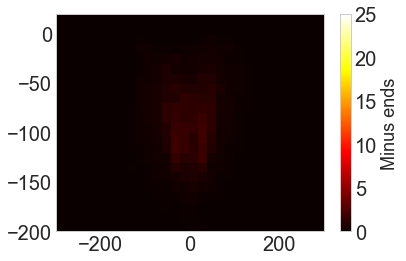

In [30]:
plt.figure()
plt.pcolormesh(xs, ys, model_points_minus)
plt.clim([0, 25])
plt.colorbar(label = 'Minus ends')

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'minus_ends_map_XZ_time_subplots_colorbar.png')

plt.show()

## plus and minus end positions

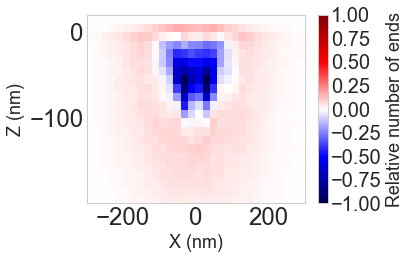

In [312]:
# heat map RZ

plt.cm.get_cmap('seismic')
plt.set_cmap('seismic')


# x = branched_actin_bound_ends.plus_rpos_recalibrated*1000a
# y = (branched_actin_bound_ends.plus_zpos+0.4)*(-1000)

x_plus = branched_actin_bound_ends.plus_xpos_recalibrated*1000
z_plus = (branched_actin_bound_ends.plus_zpos+0.4)*(-1000)

x_minus = branched_actin_bound_ends.minus_xpos_recalibrated*1000
z_minus = (branched_actin_bound_ends.minus_zpos+0.4)*(-1000)

# set number of bins (kind of like pixel size) here. 

# x: 600 points, 30 bins is about 20 nm pixel.
# z: about 10 nm pixel

model_points_plus,xs,ys=np.histogram2d(x_plus,z_plus, bins=[30,22],range=[[-300,300],[-200, 20]])
model_points_plus=np.flipud(np.rot90(model_points_plus))

model_points_minus,xs,ys=np.histogram2d(x_minus,z_minus, bins=[30,22],range=[[-300,300],[-200, 20]])
model_points_minus=np.flipud(np.rot90(model_points_minus))    

# mean actin in terms of run and time: just divide by number runs and nb time points in time bin.
# assuming that nb time points is same for all runs. using one model point = 10 nm and one actin subunit is 2.75 nm.

model_points_plus=model_points_plus/len(runs)/len(times)
model_points_minus=model_points_minus/len(runs)/len(times)

# difference between plus and minus ends. positive is more plus ends.

ends_plus_over_minus = model_points_plus-model_points_minus

plt.pcolormesh(xs, ys, ends_plus_over_minus)

plt.xlim([-300, 300])
plt.ylim(bottom = -199)

# max colormap to show

plt.clim([-1, 1])

plt.colorbar(label = 'Relative number of ends')

plt.xlabel('X (nm)')
plt.ylabel('Z (nm)')

plt.xticks(size=24)
plt.yticks(size=24)

plt.tight_layout()

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_plusminus_ends_map_XZ_seismic.png')
    plt.savefig('../figures/'+pref+'_plusminus_ends_map_XZ_seismic.pdf')

plt.show()

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


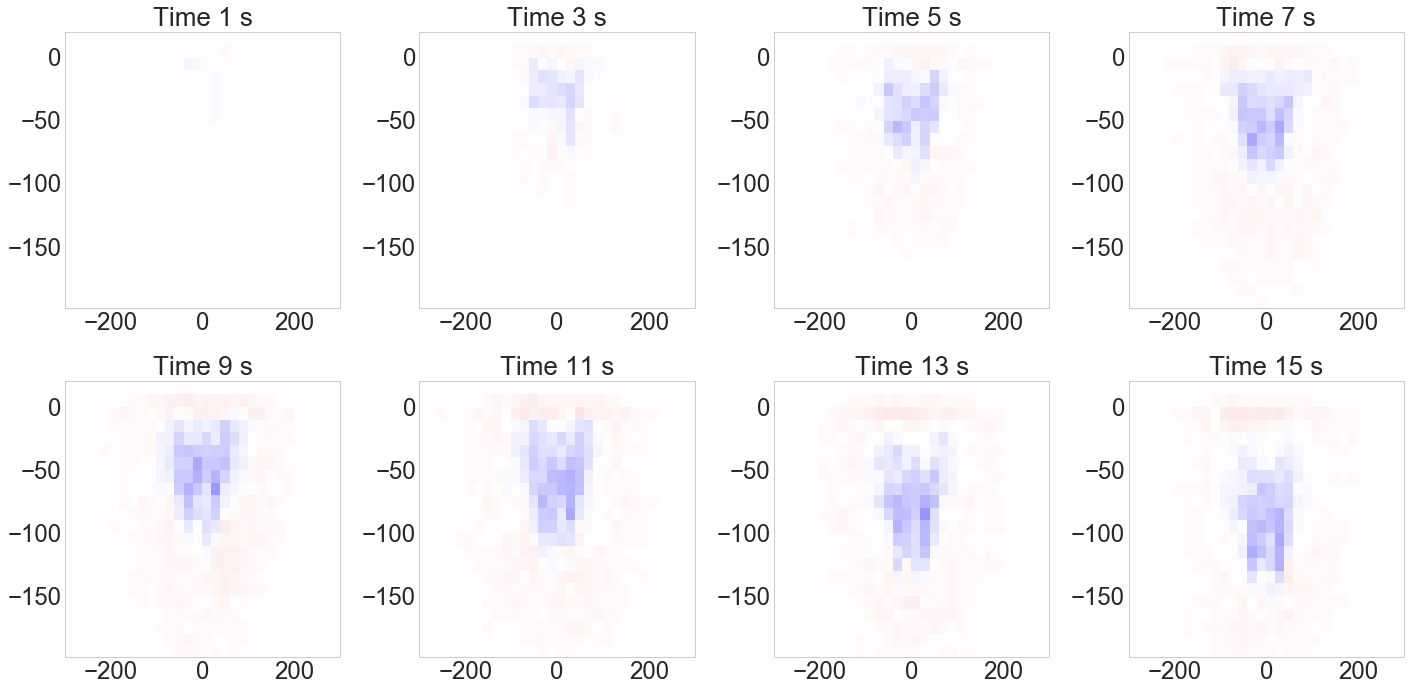

In [31]:
plt.figure(figsize=(20,10))

# plot one second intervals, show every other time point.

plt.cm.get_cmap('seismic')
plt.set_cmap('seismic')


for i, timept in enumerate(range(1,16,2),start=1):
    

    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    
    branched_actin_bound_ends_time=branched_actin_bound_ends.loc[branched_actin_bound_ends['time']>(timept-1)].loc[branched_actin_bound_ends['time']<=(timept)]

    times_per_timept=len(sorted(list(set(branched_actin_bound_ends_time.time))))

    # set position

    x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000
    z_plus_time = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)

    x_minus_time = branched_actin_bound_ends_time.minus_xpos_recalibrated*1000
    z_minus_time = (branched_actin_bound_ends_time.minus_zpos+0.4)*(-1000)
    
    # set number of bins (kind of like pixel size) here. 
    
    # x: 600 points, 30 bins is about 20 nm pixel.
    # z: about 10 nm pixel
    
    model_points_plus,xs,ys=np.histogram2d(x_plus_time,z_plus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
    model_points_plus=np.flipud(np.rot90(model_points_plus))

    model_points_minus,xs,ys=np.histogram2d(x_minus_time,z_minus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
    model_points_minus=np.flipud(np.rot90(model_points_minus))    
    
    # histogram (sum) for one time

    # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.
    # assuming that nb time points is same for all runs. using one model point = 10 nm and one actin subunit is 2.75 nm.

    model_points_plus=model_points_plus/len(runs)/times_per_timept
    model_points_minus=model_points_minus/len(runs)/times_per_timept

    # difference between plus and minus ends. positive is more plus ends.
    
    ends_plus_over_minus = model_points_plus-model_points_minus
    
    
    plt.subplot(2, 4, i)

      
    plt.pcolormesh(xs, ys, ends_plus_over_minus)

#     plt.imshow(model_points_minus)

    
#     plt.set_cmap('Oranges')    
#     plt.pcolormesh(xs, ys, model_points_minus)


    plt.title('Time ' + str(timept) + ' s', fontsize=26)

    # log scale 
    # plt.hist2d(x, y, bins = 40, norm=LogNorm())


    plt.xlim([-300, 300])
    plt.ylim(bottom = -199)

    # max colormap to show
    
    plt.clim([-7, 7])
    
#     plt.xlabel('x (nm)')
#     plt.ylabel('Z (nm)')
    
    plt.xticks(size=24)
    plt.yticks(size=24)

    plt.tight_layout()

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_plusminus_ends_map_XZ_time_subplots_seismic.png')
    plt.savefig('../figures/'+pref+'_plusminus_ends_map_XZ_time_subplots_seismic.pdf')

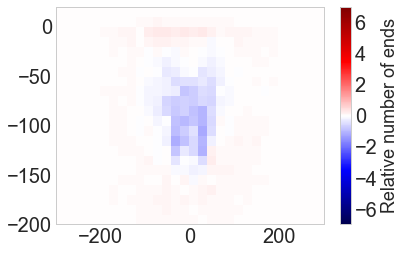

In [32]:
plt.figure()
plt.pcolormesh(xs, ys, ends_plus_over_minus)
plt.clim([-7, 7])
plt.colorbar(label = 'Relative number of ends')

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_plusminus_ends_map_XZ_time_subplots_colorbar.png')

plt.show()

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


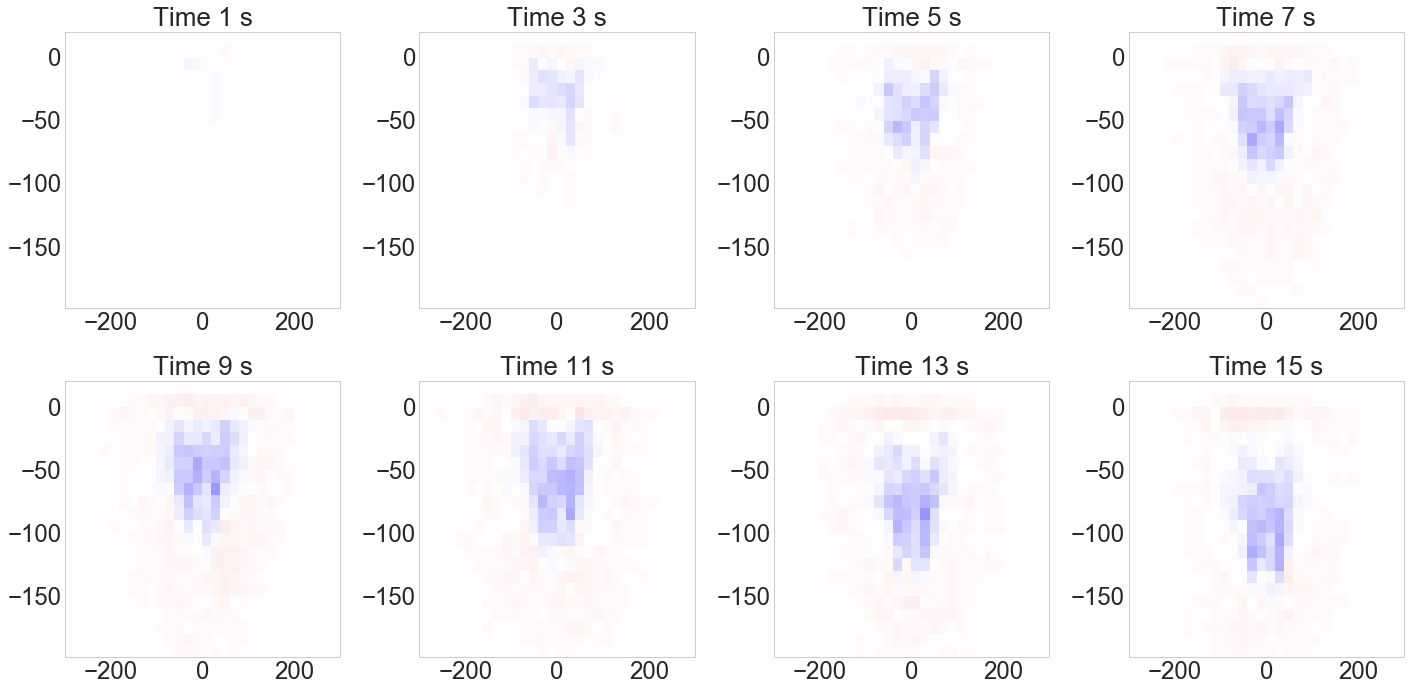

In [34]:
plt.figure(figsize=(20,10))

# plot one second intervals, show every other time point.

plt.cm.get_cmap('seismic')
plt.set_cmap('seismic')


for i, timept in enumerate(range(1,16,2),start=1):
    

    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    
    branched_actin_bound_ends_time=branched_actin_bound_ends.loc[branched_actin_bound_ends['time']>(timept-1)].loc[branched_actin_bound_ends['time']<=(timept)]

    times_per_timept=len(sorted(list(set(branched_actin_bound_ends_time.time))))

    # set position

    x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000
    z_plus_time = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)

    x_minus_time = branched_actin_bound_ends_time.minus_xpos_recalibrated*1000
    z_minus_time = (branched_actin_bound_ends_time.minus_zpos+0.4)*(-1000)
    
    # set number of bins (kind of like pixel size) here. 
    
    # x: 600 points, 30 bins is about 20 nm pixel.
    # z: about 10 nm pixel
    
    model_points_plus,xs,ys=np.histogram2d(x_plus_time,z_plus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
    model_points_plus=np.flipud(np.rot90(model_points_plus))

    model_points_minus,xs,ys=np.histogram2d(x_minus_time,z_minus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
    model_points_minus=np.flipud(np.rot90(model_points_minus))    
    
    # histogram (sum) for one time

    # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.
    # assuming that nb time points is same for all runs. using one model point = 10 nm and one actin subunit is 2.75 nm.

    model_points_plus=model_points_plus/len(runs)/times_per_timept
    model_points_minus=model_points_minus/len(runs)/times_per_timept

    # difference between plus and minus ends. positive is more plus ends.
    
    ends_plus_over_minus = model_points_plus-model_points_minus
    
    
    plt.subplot(2, 4, i)

      
    plt.pcolormesh(xs, ys, ends_plus_over_minus)

#     plt.imshow(model_points_minus)

    
#     plt.set_cmap('Oranges')    
#     plt.pcolormesh(xs, ys, model_points_minus)


    plt.title('Time ' + str(timept) + ' s', fontsize=26)

    # log scale 
    # plt.hist2d(x, y, bins = 40, norm=LogNorm())


    plt.xlim([-300, 300])
    plt.ylim(bottom = -199)

    # max colormap to show
    
    plt.clim([-7, 7])
    
#     plt.xlabel('x (nm)')
#     plt.ylabel('Z (nm)')
    
    plt.xticks(size=24)
    plt.yticks(size=24)

    plt.tight_layout()

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_plusminus_ends_map_XZ_time_subplots_seismic.png')
    plt.savefig('../figures/'+pref+'_plusminus_ends_map_XZ_time_subplots_seismic.pdf')

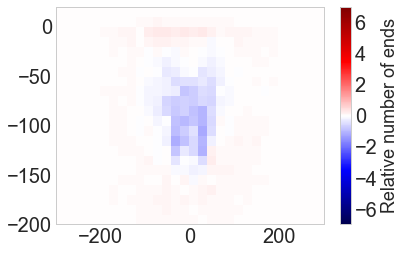

In [35]:
plt.figure()
plt.pcolormesh(xs, ys, ends_plus_over_minus)
plt.clim([-7, 7])
plt.colorbar(label = 'Relative number of ends')

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_plusminus_ends_map_XZ_time_subplots_colorbar.png')

plt.show()

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


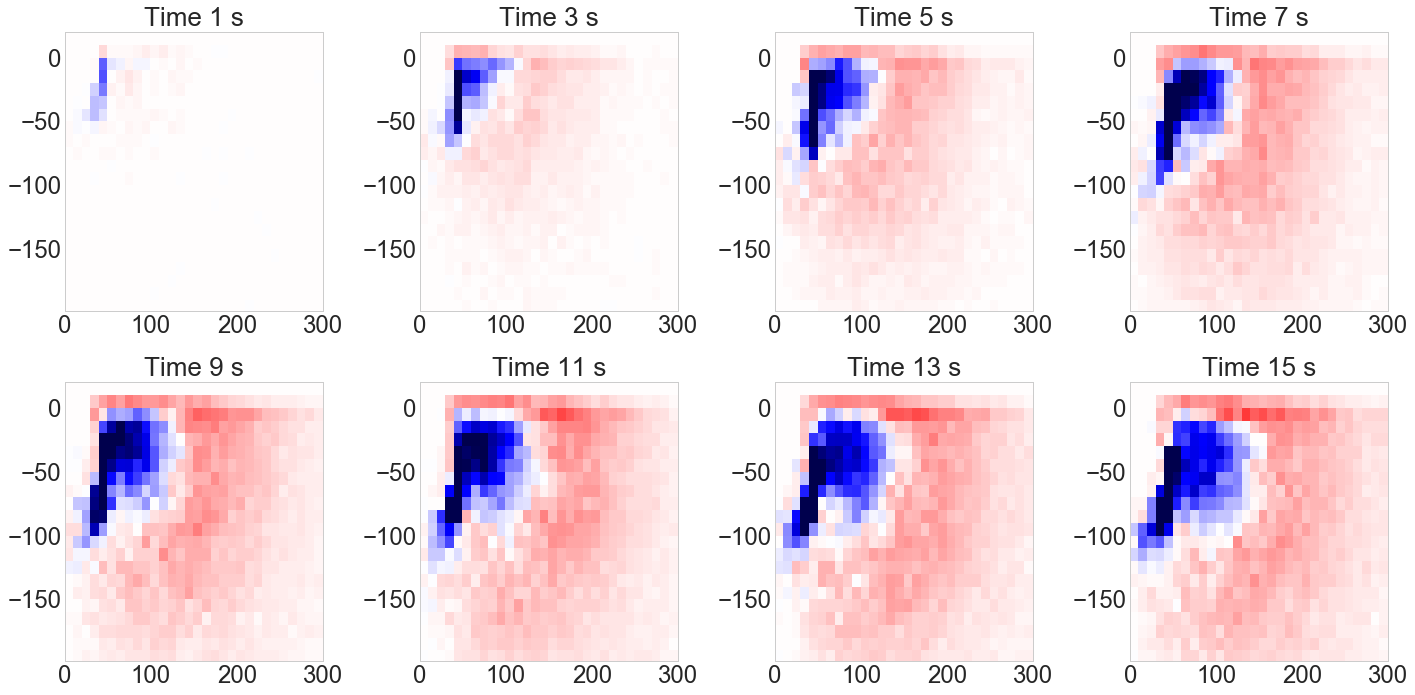

In [52]:
# versus R

plt.figure(figsize=(20,10))

# plot one second intervals, show every other time point.

plt.cm.get_cmap('seismic')
plt.set_cmap('seismic')


for i, timept in enumerate(range(1,16,2),start=1):
    

    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    
    branched_actin_bound_ends_time=branched_actin_bound_ends.loc[branched_actin_bound_ends['time']>(timept-1)].loc[branched_actin_bound_ends['time']<=(timept)]

    times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

    # set position

    r_plus_time = branched_actin_bound_ends_time.plus_rpos_recalibrated*1000
    z_plus_time = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)

    r_minus_time = branched_actin_bound_ends_time.minus_rpos_recalibrated*1000
    z_minus_time = (branched_actin_bound_ends_time.minus_zpos+0.4)*(-1000)
    
    # set number of bins (kind of like pixel size) here. 
    
    # x: 600 points, 30 bins is about 20 nm pixel.
    # z: about 10 nm pixel
    
    model_points_plus,xs,ys=np.histogram2d(r_plus_time,z_plus_time,bins=[30,22],range=[[0, 300],[-200, 20]])
    model_points_plus=np.flipud(np.rot90(model_points_plus))

    model_points_minus,xs,ys=np.histogram2d(r_minus_time,z_minus_time,bins=[30,22],range=[[0, 300],[-200, 20]])
    model_points_minus=np.flipud(np.rot90(model_points_minus))    
    
    # histogram (sum) for one time

    # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.
    # assuming that nb time points is same for all runs. using one model point = 10 nm and one actin subunit is 2.75 nm.

    model_points_plus=model_points_plus/len(runs)/times_per_timept
    model_points_minus=model_points_minus/len(runs)/times_per_timept

    # difference between plus and minus ends. positive is more plus ends.
    
    ends_plus_over_minus = model_points_plus-model_points_minus
    
    
    plt.subplot(2, 4, i)

      
    plt.pcolormesh(xs, ys, ends_plus_over_minus)

    plt.title('Time ' + str(timept) + ' s', fontsize=26)

    # log scale 
    # plt.hist2d(x, y, bins = 40, norm=LogNorm())


    plt.xlim([0, 300])
    plt.ylim(bottom = -199)

    # max colormap to show
    
    plt.clim([-7, 7])
    
#     plt.xlabel('x (nm)')
#     plt.ylabel('Z (nm)')
    
    plt.xticks(size=24)
    plt.yticks(size=24)

    plt.tight_layout()

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'plusminus_ends_map_RZ_time_subplots_seismic.png')
    plt.savefig('../figures/'+pref+'plusminus_ends_map_RZ_time_subplots_seismic.pdf')


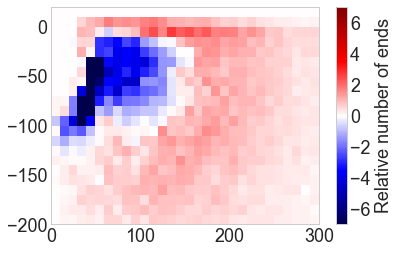

In [50]:
plt.figure()
plt.pcolormesh(xs, ys, ends_plus_over_minus)
plt.clim([-7, 7])
plt.colorbar(label = 'Relative number of ends')

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'plusminus_ends_map_RZ_time_subplots_colorbar.png')

plt.show()

# hist of zpos growing, capped, all plus, minus ends


# amplitude of gap bt peak z pos as metric?

In [16]:
# for when header is misnamed plus_zir
if 'plus_zir' in list(branched_actin_bound_ends):
    branched_actin_bound_ends['plus_zdir']=branched_actin_bound_ends['plus_zir']

In [234]:
## convert to degrees, oriented vertically such that +90 is POSITIVE orientation and -90 is negative orientation


branched_actin_bound_ends['zdir_deg_flip90'] = np.degrees((np.arccos(branched_actin_bound_ends['plus_zdir'])-(np.pi)/2))

# for branch angles too

branched_actin_bound_arp['branch_zdir_deg_flip90'] = np.degrees((np.arccos(branched_actin_bound_arp['branch_zdir'])-(np.pi)/2))
branched_actin_bound_arp.head()


run  time  bound_state  arp_id      xpos  nucleating_state  \
0  run0000_0001   0.4            1      25  0.004889                 1   
1  run0000_0001   0.5            1      25  0.004018                 1   
2  run0000_0001   0.6            1      25  0.003005                 1   
3  run0000_0001   0.7            1      25  0.001646                 1   
4  run0000_0001   0.8            1      25  0.001407                 1   

       ypos      zpos      rpos  bound_distance_along_fiber1  \
0  0.039625 -0.388666  0.039925                     0.102615   
1  0.039548 -0.387135  0.039752                     0.102615   
2  0.039348 -0.384087  0.039462                     0.102615   
3  0.038225 -0.380108  0.038261                     0.102615   
4  0.038695 -0.377559  0.038721                     0.102615   

            ...            bud_zpos  bud_internalization  xpos_recalibrated  \
0           ...           -0.401087            -0.001087           0.010657   
1           ...           -0.400162            -0.000162           0.010672   
2           ...           -0.398350             0.001650           0.008777   
3           ...           -0.394256             0.005744           0.008319   
4           ...           -0.392674             0.007326           0.007896   

   ypos_recalibrated  zpos_recalibrated  rpos_recalibrated  branch_xdir  \
0           0.044031           0.012421           0.045302    -0.248313   
1           0.043478           0.013027           0.044768    -0.062657   
2           0.041707           0.014263           0.042621    -0.589050   
3           0.041488           0.014148           0.042314    -0.643319   
4           0.041430           0.015115           0.042176    -0.621177   

   branch_ydir  branch_zdir  branch_zdir_deg_flip90  
0     0.595523     0.214297              -12.374287  
1     0.663643    -0.309944               18.055826  
2     0.189855     0.337859              -19.746456  
3    -0.043867     0.319377              -18.625222  
4    -0.049853     0.252842              -14.645751  

[5 rows x 34 columns]

(array([  65.,  485., 2694., 5181., 6251., 5293., 4000., 2442.,  759.,
          64.]), array([-82.54055419, -67.76077572, -52.98099725, -38.20121878,
        -23.4214403 ,  -8.64166183,   6.13811664,  20.91789511,
         35.69767358,  50.47745206,  65.25723053]), <a list of 10 Patch objects>)

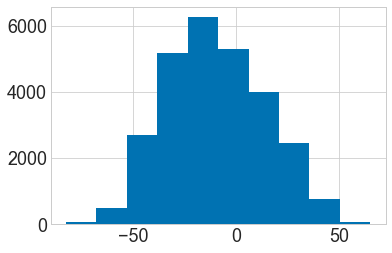

In [235]:
plt.hist(branched_actin_bound_arp['branch_zdir_deg_flip90'])

In [34]:
# # angle of plus ends in Z

# plt.cm.get_cmap('plasma')
# plt.set_cmap('magma')

# # versus R
# plt.figure(1)
# plt.figure(figsize=(20,10))

# for i, timept in enumerate(range(1,16,2),start=1):
    
# #     print(i)
#     print('time ' + str(timept))
    
#     # bin ± 0.5s as interval
#     branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

#     branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

# #     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

#     # set position

# #     x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000

#     r_plus_time = branched_actin_bound_ends_time.plus_rpos*1000
    
#     z_dir_plus_time = branched_actin_bound_ends_time.plus_zdir

#     z_dir_plus_degrees_time = np.degrees(np.arccos(branched_actin_bound_ends_time.plus_zdir))
    
#     z_dir_plus_hist,xs,ys=np.histogram2d(r_plus_time,z_dir_plus_degrees_time,bins=[30,22],range=[[0, 300],[0, 180]])
#     z_dir_plus_hist = np.flipud(np.rot90(z_dir_plus_hist))
#     plt.subplot(2, 4, i)
      
#     plt.pcolormesh(xs, ys, z_dir_plus_hist)
    
#     plt.xlim([0, 250])
    
#     plt.xlabel('R')
#     plt.ylabel('z_dir')
    
# #     cb = plt.colorbar(label = 'ends')
#     plt.title('Time ' + str(timept) + ' s', fontsize=24)
    
#     plt.xticks(size=20)
#     plt.yticks(size=20)

#     plt.tight_layout()
    
    
# # if save_figures == 'yes': 
# #     plt.savefig('../figures/'+pref+'plus_zdir_time_subplots.png')
# #     plt.savefig('../figures/'+pref+'plus_zdir_time_subplots.pdf')
    



In [35]:
# # angle of plus ends in Z

# # as flip90

# # versus R
# plt.figure(1)
# plt.figure(figsize=(20,10))

# for i, timept in enumerate(range(1,16,2),start=1):
    
# #     print(i)
#     print('time ' + str(timept))
    
#     # bin ± 0.5s as interval
#     branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

#     branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

# #     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

#     # set position

# #     x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000

#     r_plus_time = branched_actin_bound_ends_time.plus_rpos*1000
    
#     z_dir_plus_time_flip90 = branched_actin_bound_ends_time.zdir_deg_flip90

# #     z_dir_plus_degrees_time = np.degrees(np.arccos(branched_actin_bound_ends_time.zdir))
    
#     z_dir_plus_hist,xs,ys=np.histogram2d(r_plus_time,z_dir_plus_time_flip90,bins=[30,22],range=[[0, 300],[-90, 90]])
#     z_dir_plus_hist = np.flipud(np.rot90(z_dir_plus_hist))
#     plt.subplot(2, 4, i)
      
#     plt.pcolormesh(xs, ys, z_dir_plus_hist)
    
#     plt.xlim([0, 250])
    
#     plt.xlabel('R')
#     plt.ylabel('z_dir')
    
# #     cb = plt.colorbar(label = 'ends')
#     plt.title('Time ' + str(timept) + ' s', fontsize=24)
    
#     plt.yticks([-90, -45, 0, 45, 90])
    
#     plt.xticks(size=20)
#     plt.yticks(size=20)

#     plt.tight_layout()
    
    
# if save_figures == 'yes': 
#     plt.savefig('../figures/'+pref+'plus_zdir_time_flip90_subplots.png')
#     plt.savefig('../figures/'+pref+'plus_zdir_time_flip90_subplots.pdf')
    



time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


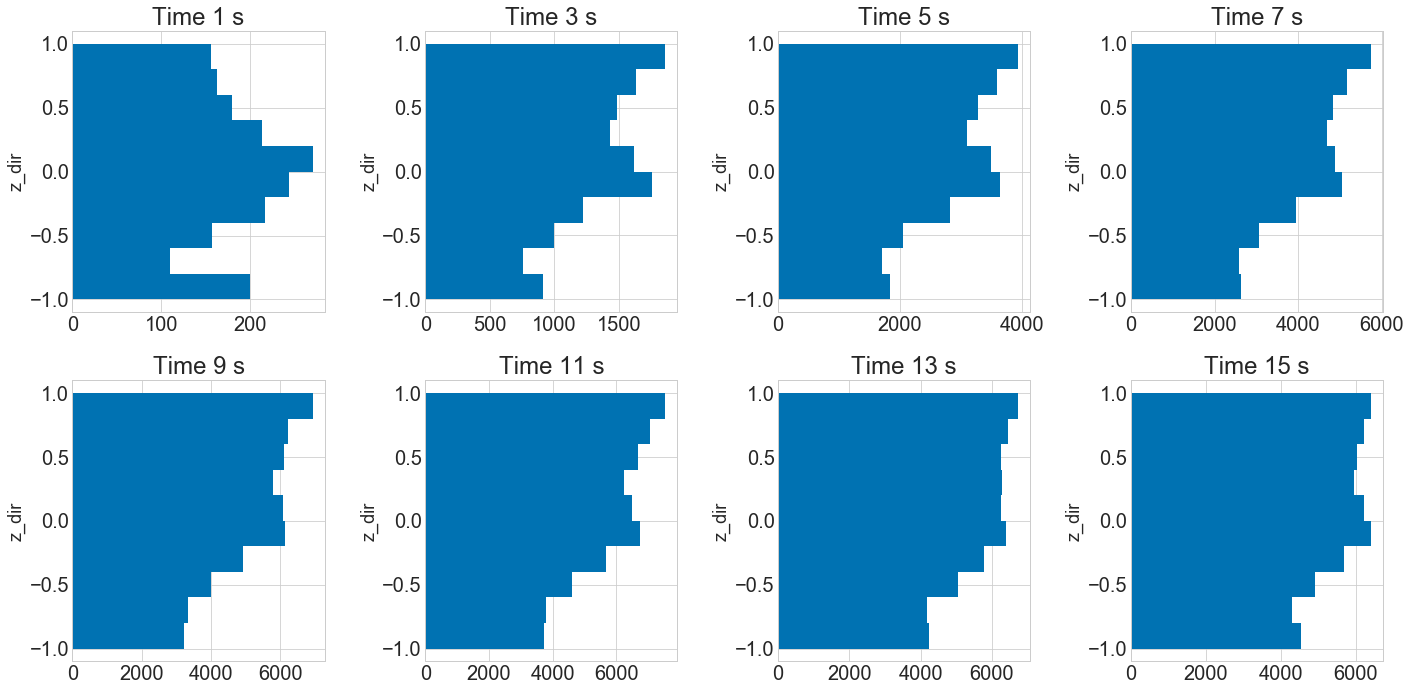

In [38]:
# angle of plus ends in Z

# hist 


plt.figure(figsize=(20,10))

for i, timept in enumerate(range(1,16,2),start=1):
    
#     print(i)
    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

    branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

#     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

    # set position

#     x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000

    r_plus_time = branched_actin_bound_ends_time.plus_rpos*1000
    
    z_dir_plus_time = branched_actin_bound_ends_time.plus_zdir

    z_dir_plus_degrees_time = np.degrees(np.arccos(branched_actin_bound_ends_time.plus_zdir))
    
    z_dir_plus_hist,xs,ys=np.histogram2d(r_plus_time,z_dir_plus_degrees_time,bins=[30,22],range=[[0, 300],[0, 180]])
    z_dir_plus_hist = np.flipud(np.rot90(z_dir_plus_hist))
    plt.subplot(2, 4, i)
      
#     plt.pcolormesh(xs, ys, z_dir_plus_hist)
    plt.hist(z_dir_plus_time, orientation = 'horizontal')
#     plt.ylim([0, 180])
    
#     plt.xlabel('R')
    plt.ylabel('z_dir')
    
#     cb = plt.colorbar(label = 'ends')
    plt.title('Time ' + str(timept) + ' s', fontsize=24)
    
    plt.xticks(size=20)
    plt.yticks(size=20)

    plt.tight_layout()
    
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'plus_zdir_time_hist_subplots.png')
    plt.savefig('../figures/'+pref+'plus_zdir_time_hist_subplots.pdf')
    



time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


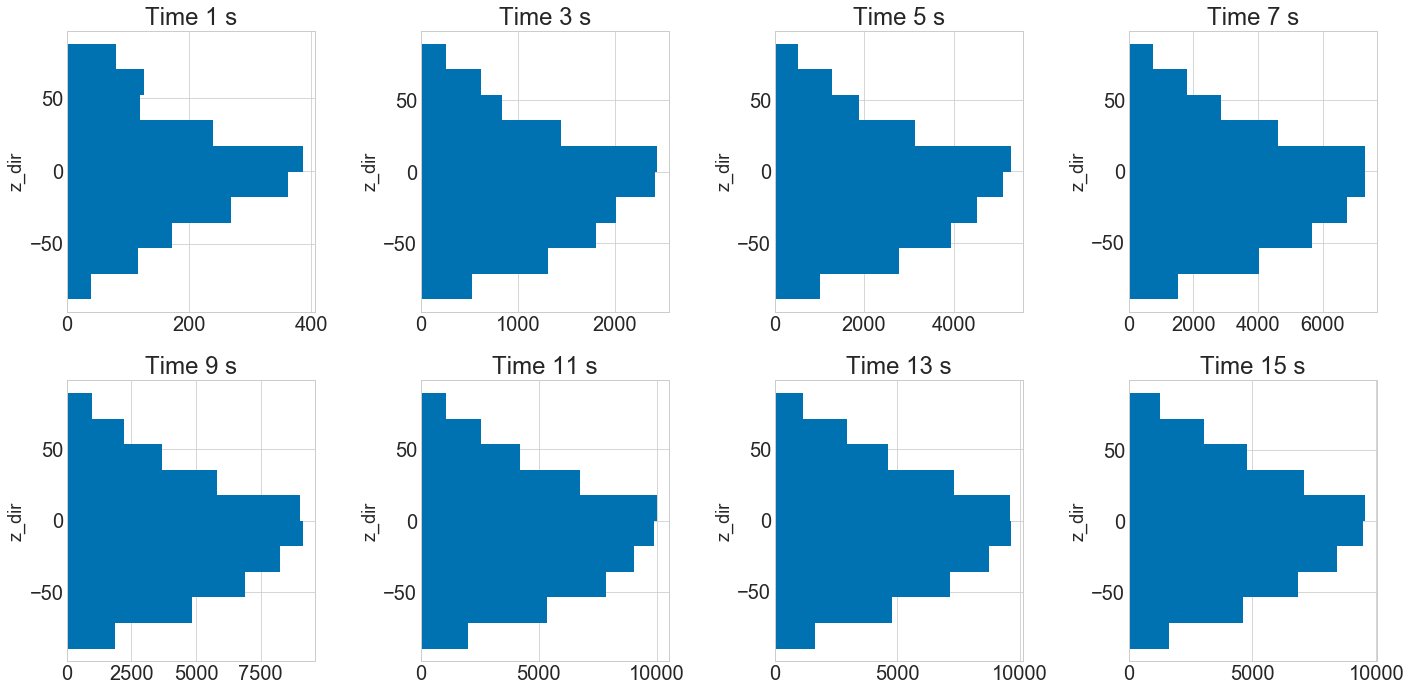

In [39]:
# angle of plus ends in Z

# hist or rose plot


plt.figure(figsize=(20,10))




for i, timept in enumerate(range(1,16,2),start=1):
    
#     print(i)
    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

    nb_runs = len(sorted(list(set(branched_actin_bound_ends_no_index.run))))
    
#     group by time, average run, to get histogram with right magnitude
    
    branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

    times_per_timept=len(sorted(list(set(branched_actin_bound_ends_time.time))))

    # set position

#     x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000

    r_plus_time = branched_actin_bound_ends_time.plus_rpos*1000
    
    z_dir_plus_time = branched_actin_bound_ends_time.plus_zdir
    
#   convert to per time point

#     z_dir_plus_time = z_dir_plus_time/len(runs)/len(times)

    z_dir_plus_rad_time = np.arccos(z_dir_plus_time)
    z_dir_plus_rad_flip90 = (z_dir_plus_rad_time-(np.pi)/2)
    
    z_dir_plus_degrees_time = np.degrees(np.arccos(branched_actin_bound_ends_time.plus_zdir))
    
#     set 0 = horizontal, +90 is toward base and -90 toward tip
    
    z_dir_plus_degrees_time_flip90 = (z_dir_plus_degrees_time-90)
    
    z_dir_plus_hist,xs,ys=np.histogram2d(r_plus_time,z_dir_plus_degrees_time,bins=[30,22],range=[[0, 300],[0, 180]])
    z_dir_plus_hist = np.flipud(np.rot90(z_dir_plus_hist))
    
    z_dir_plus_hist = z_dir_plus_hist/nb_runs/times_per_timept
    
    plt.subplot(2, 4, i)
      
#     plt.pcolormesh(xs, ys, z_dir_plus_hist)
    plt.hist(z_dir_plus_degrees_time_flip90, orientation = 'horizontal')
#     plt.ylim([0, 180])
    
#     plt.xlabel('R')
    plt.ylabel('z_dir')
    
#     cb = plt.colorbar(label = 'ends')
    plt.title('Time ' + str(timept) + ' s', fontsize=24)
    
    plt.xticks(size=20)
    plt.yticks(size=20)

    plt.tight_layout()
    
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'plus_zdir_time_hist_degrees_flip90_subplots.png')
    plt.savefig('../figures/'+pref+'plus_zdir_time_hist_degrees_flip90_subplots.pdf')
    



time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


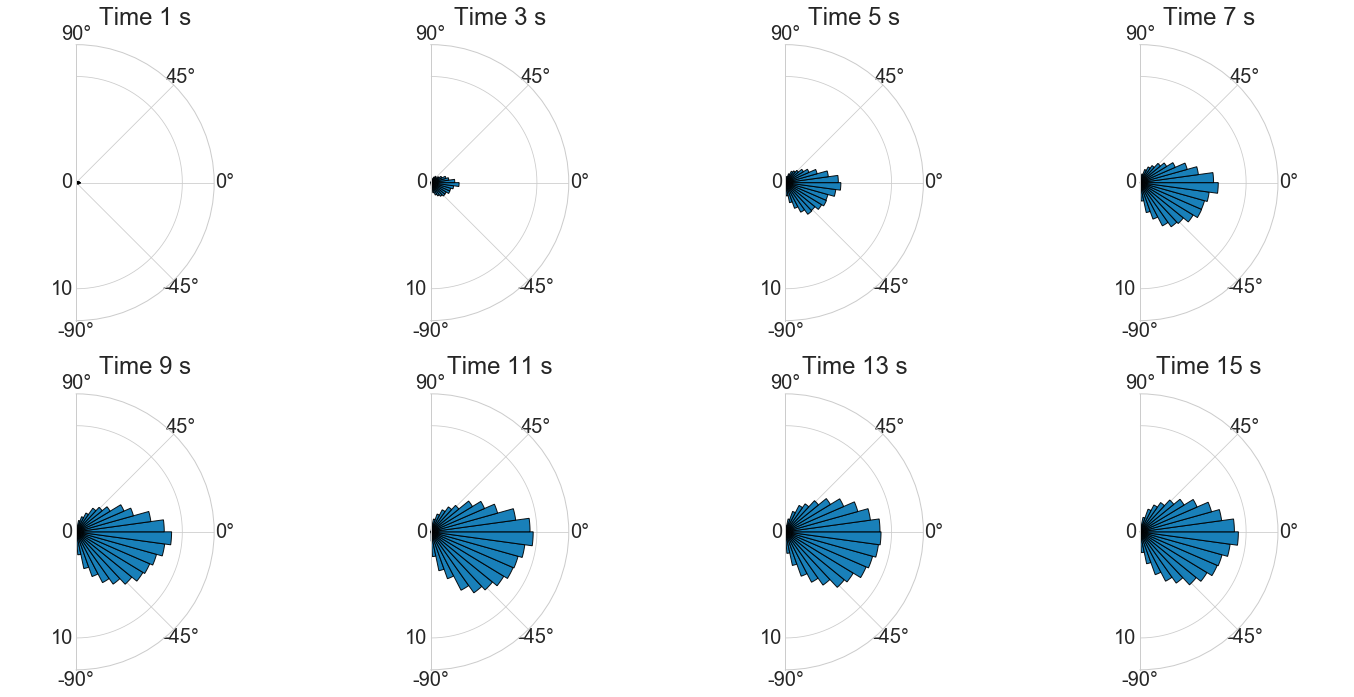

In [40]:
# rose plot


plt.figure(figsize=(20,10))

for i, timept in enumerate(range(1,16,2),start=1):
    
#     print(i)
    print('time ' + str(timept))
    
    # bin 1s interval [time-1:time]
    branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

    branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

#     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))
    nb_runs = len(sorted(list(set(branched_actin_bound_ends_no_index.run))))
    
    times_per_timept=len(sorted(list(set(branched_actin_bound_ends_time.time))))


    # set position

#     x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000

    z_dir_plus_time = branched_actin_bound_ends_time.plus_zdir

#     print(len(z_dir_plus_time))
    z_dir_plus_rad_time = np.arccos(z_dir_plus_time)
    z_dir_plus_rad_flip90 = (z_dir_plus_rad_time-(np.pi)/2)
    
    z_dir_plus_degrees_time = np.degrees(np.arccos(branched_actin_bound_ends_time.plus_zdir))
    
#     set 0 = horizontal, +90 is toward base and -90 toward tip
    
    z_dir_plus_degrees_time_flip90 = (z_dir_plus_degrees_time-90)
    
#     z_dir_plus_hist,xs,ys=np.histogram2d(r_plus_time,z_dir_plus_degrees_time,bins=[30,22],range=[[0, 300],[0, 180]])
#     z_dir_plus_hist = np.flipud(np.rot90(z_dir_plus_hist))
    ax = plt.subplot(2, 4, i, polar=True)
    
    
    # http://qingkaikong.blogspot.com/2016/04/plot-histogram-on-clock.html

#     arr = z_dir_plus_rad_flip90
    N = 23
    bottom = 0

    # make the histogram that bin
    radii, tick = np.histogram(z_dir_plus_rad_flip90, bins = 23)

#     scle to one tie point
    radii = radii/nb_runs/times_per_timept
    
    # create theta for tick
    theta = np.linspace(-np.pi/2, np.pi/2, N, endpoint=False)

    # width of each bin on the plot
    width = (np.pi) / N

    # make a polar plot
#     aplt.figure(figsize = (12, 8))
#     ax = plt.subplot(111, polar=True)
    bars = ax.bar(theta, radii, width=width, bottom=bottom, edgecolor='black', alpha=0.9)
    
    plt.xlim([-np.pi/2, np.pi/2])


#     plt.pcolormesh(xs, ys, z_dir_plus_hist)
#     plt.hist(z_dir_plus_degrees_time_flip90, orientation = 'horizontal')
#     plt.ylim([0, 180])
    
#     plt.xlabel('R')
#     plt.ylabel('z_dir')
    
#     cb = plt.colorbar(label = 'ends')
    plt.title('Time ' + str(timept) + ' s', fontsize=24)
    
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.yticks([0, 10])

    plt.xticks([-np.pi/2,-np.pi/4,0,np.pi/4,np.pi/2])
    plt.ylim([0, 13])
    
plt.tight_layout()
    
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'plus_zdir_time_rose_flip90_subplots_abs.png')
    plt.savefig('../figures/'+pref+'plus_zdir_time_rose_flip90_subplots_abs.pdf')
    
plt.show()


In [ ]:
# # http://qingkaikong.blogspot.com/2016/04/plot-histogram-on-clock.html

# arr = z_dir_plus_rad_flip90
# N = 23
# bottom = 2

# # make the histogram that bin
# radii, tick = np.histogram(z_dir_plus_rad_flip90, bins = 23)

# # create theta for tick
# theta = np.linspace(-np.pi/2, np.pi/2, N, endpoint=False)

# # width of each bin on the plot
# width = (np.pi) / N

# # make a polar plot
# plt.figure(figsize = (12, 8))
# ax = plt.subplot(111, polar=True)
# bars = ax.bar(theta, radii, width=width, bottom=bottom)

# plt.xlim([-np.pi/2, np.pi/2])

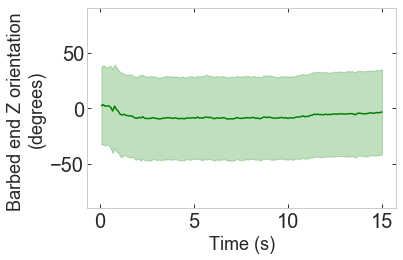

In [41]:
# mean dir over time and std
means = branched_actin_bound_ends.groupby('time').zdir_deg_flip90.mean()
stds = branched_actin_bound_ends.groupby('time').zdir_deg_flip90.std()

plt.figure(figsize=(6,4))
plt.rc('font', size=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

color='green'

plt.plot(means.index,means, c=color)
times_cur = means.index
yminus=means-stds
yplus=means+stds

plt.fill_between(times_cur, np.array(yminus), np.array(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 



# branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

# # zdirs = branched_actin_bound_ends['plus_zdir']
# # zdirs_rad = np.arccos(zdirs)
# # zdirs_rad_flip90 = -(zdirs_rad-(np.pi)/2)

# # zdirs_deg_flip90 = np.degrees(zdirs_rad_flip90)

# branched_actin_bound_ends['zdir_deg_flip90'] = np.degrees(-(np.arccos(branched_actin_bound_ends['plus_zdir'])-(np.pi)/2))

# zdir_deg_flip90 = branched_actin_bound_ends['zdir_deg_flip90']
# times_cur = branched_actin_bound_ends.reset_index()['time']

# zdirs = branched_actin_bound_ends.loc[branched_actin_bound_ends['zdir_deg_flip90']].groupby('time').mean 


# # z_dirs = branched_actin_bound_ends.groupby(level=['run', 'time']).z()

# zdirs_by_time_mean = pd.DataFrame(zdirs_deg_flip90).groupby('time').mean()
# zdirs_by_time_std = pd.DataFrame(zdirs_deg_flip90).groupby('time').std()

# plt.figure(figsize=(6,4))
# plt.rc('font', size=20) 
# plt.rc('xtick', labelsize=20) 
# plt.rc('ytick', labelsize=20) 

# color='green'

# plt.plot(zdirs_by_time_mean.index,zdirs_by_time_mean, c=color)
# yminus=zdirs_by_time_mean.plus_zdir-zdirs_by_time_std.plus_zdir
# yplus=zdirs_by_time_mean.plus_zdir+zdirs_by_time_std.plus_zdir

# plt.fill_between(zdirs_by_time_mean.index, np.array(yminus), np.array(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 


plt.xlabel('Time (s)')
plt.ylabel('Barbed end Z orientation \n(degrees)')

# z

plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)

plt.ylim([-90, 90])
plt.tight_layout()

plt.savefig('../figures/'+pref+'zdir_vs_time.png')
plt.savefig('../figures/'+pref+'zdir_vs_time.pdf')

plt.show()

## anisotropy of Z dir relative to randomly oriented filaments



## absolute versus relative to XYZ > 5 nm from bud

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


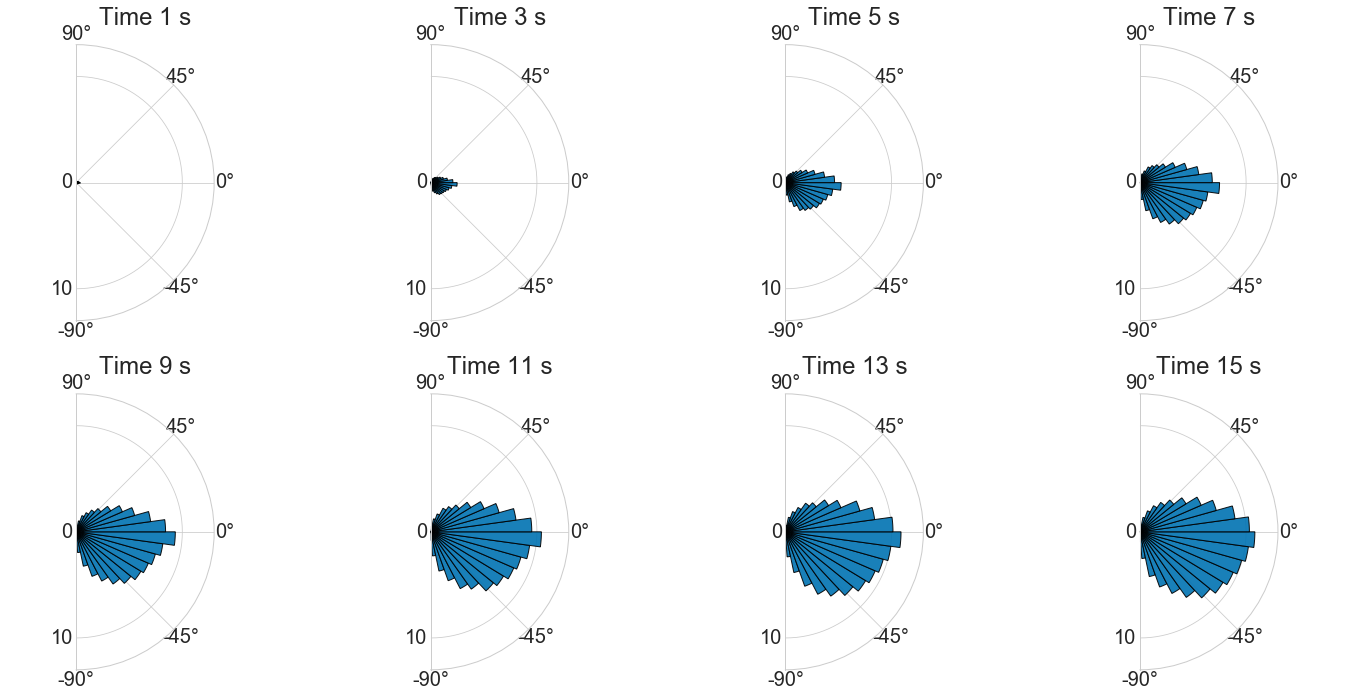

In [66]:
# rose plot


plt.figure(figsize=(20,10))

for i, timept in enumerate(range(1,16,2),start=1):
    
#     print(i)
    print('time ' + str(timept))


    # bin 1s interval [time-1:time]
    branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

    branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]
    branched_actin_bound_ends_time_outside_bud = branched_actin_bound_ends_time.loc[branched_actin_bound_ends_time['plus_rpos_recalibrated']>0.035]

#     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))
    nb_runs = len(sorted(list(set(branched_actin_bound_ends_no_index.run))))
    
    times_per_timept=len(sorted(list(set(branched_actin_bound_ends_time.time))))


    # set position

#     x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000

    z_dir_plus_time = branched_actin_bound_ends_time_outside_bud.plus_zdir

#     print(len(z_dir_plus_time))
    z_dir_plus_rad_time = np.arccos(z_dir_plus_time)
    z_dir_plus_rad_flip90 = (z_dir_plus_rad_time-(np.pi)/2)
    
    z_dir_plus_degrees_time = np.degrees(np.arccos(branched_actin_bound_ends_time.plus_zdir))
    
#     set 0 = horizontal, +90 is toward base and -90 toward tip
    
    z_dir_plus_degrees_time_flip90 = (z_dir_plus_degrees_time-90)
    

    ax = plt.subplot(2, 4, i, polar=True)
    
    
    # http://qingkaikong.blogspot.com/2016/04/plot-histogram-on-clock.html

#     arr = z_dir_plus_rad_flip90
    N = 23
    bottom = 0

    # make the histogram that bin
    radii, tick = np.histogram(z_dir_plus_rad_flip90, bins = 23)

#     scle to one time point
    radii = radii/nb_runs/times_per_timept
    
    # create theta for tick
    theta = np.linspace(-np.pi/2, np.pi/2, N, endpoint=False)

    # width of each bin on the plot
    width = (np.pi) / N

    # make a polar plot

    bars = ax.bar(theta, radii, width=width, bottom=bottom, edgecolor='black', alpha=0.9)
    
    plt.xlim([-np.pi/2, np.pi/2])



    plt.title('Time ' + str(timept) + ' s', fontsize=24)
    
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.yticks([0, 10])

    plt.xticks([-np.pi/2,-np.pi/4,0,np.pi/4,np.pi/2])
    plt.ylim([0, 13])
    
plt.tight_layout()
    
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'plus_zdir_time_rose_flip90_subplots_abs_outside_bud.png')
    plt.savefig('../figures/'+pref+'plus_zdir_time_rose_flip90_subplots_abs_outside_bud.pdf')
    
plt.show()

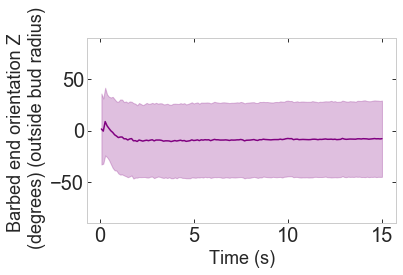

In [218]:
# mean dir over time and std
# means = branched_actin_bound_ends.groupby('time').radial_orientation.mean()
# stds = branched_actin_bound_ends.groupby('time').radial_orientation.std()

means = branched_actin_bound_ends.loc[branched_actin_bound_ends['plus_rpos_recalibrated']>0.045].groupby('time').zdir_deg_flip90.mean()
stds = branched_actin_bound_ends.loc[branched_actin_bound_ends['plus_rpos_recalibrated']>0.045].groupby('time').zdir_deg_flip90.std()


plt.figure(figsize=(6,4))
plt.rc('font', size=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

color='purple'

plt.plot(means.index,means, c=color)
times_cur = means.index
yminus=means-stds
yplus=means+stds

plt.fill_between(times_cur, np.array(yminus), np.array(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 



# branched_actin_bound_ends
# branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

# # only ends > 35 nm from bud, in recalibrated axes
# zdirs = branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['plus_rpos_recalibrated']>0.035]['plus_zdir']
# zdirs_rad = np.arccos(zdirs)
# zdirs_rad_flip90 = -(zdirs_rad-(np.pi)/2)

# zdirs_deg_flip90 = np.degrees(zdirs_rad_flip90)
# plt.hist(zdirs_deg_flip90)

# pd.d

# # z_dirs = branched_actin_bound_ends.groupby(level=['run', 'time']).z()

# zdirs_by_time_mean = pd.DataFrame(zdirs_deg_flip90).groupby('time').mean()
# zdirs_by_time_std = pd.DataFrame(zdirs_deg_flip90).groupby('time').std()

# plt.figure(figsize=(6,4))
# plt.rc('font', size=20) 
# plt.rc('xtick', labelsize=20) 
# plt.rc('ytick', labelsize=20) 

# color='green'

# plt.plot(zdirs_by_time_mean.index,zdirs_by_time_mean, c=color)
# yminus=zdirs_by_time_mean.plus_zdir-zdirs_by_time_std.plus_zdir
# yplus=zdirs_by_time_mean.plus_zdir+zdirs_by_time_std.plus_zdir

# plt.fill_between(zdirs_by_time_mean.index, np.array(yminus), np.array(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 


plt.xlabel('Time (s)')
plt.ylabel('Barbed end orientation Z \n (degrees) (outside bud radius)')

# z

plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)

plt.ylim([-90, 90])
plt.tight_layout()

plt.savefig('../figures/'+pref+'zdir_outside_bud_vs_time.png')
plt.savefig('../figures/'+pref+'zdir_outside_bud_vs_time.pdf')

plt.show()

## zdir versus Z position

In [37]:
# # angle of plus ends in Z

# # as flip90

# # versus R
# plt.figure(1)
# plt.figure(figsize=(20,10))

# for i, timept in enumerate(range(1,16,2),start=1):
    
# #     print(i)
#     print('time ' + str(timept))
    
#     # bin ± 0.5s as interval
#     branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

#     branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

# #     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

#     # set position

# #     x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000

#     z_plus_time = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)
    
#     z_dir_plus_time_flip90 = branched_actin_bound_ends_time.zdir_deg_flip90

# #     z_dir_plus_degrees_time = np.degrees(np.arccos(branched_actin_bound_ends_time.zdir))
    
#     z_dir_plus_hist,xs,ys=np.histogram2d(z_plus_time,z_dir_plus_time_flip90,bins=[30,22],range=[[-200, 20],[-90, 90]])
# #     z_dir_plus_hist,xs,ys=np.histogram2d(z_dir_plus_time_flip90,z_plus_time,bins=[30,22],range=[[-90, 90],[-200, 20]])


#     z_dir_plus_hist = np.flipud(np.rot90(z_dir_plus_hist))
#     plt.subplot(2, 4, i)
      
#     plt.pcolormesh(xs, ys, z_dir_plus_hist)
    
# #     plt.xlim([0, 250])
    
#     plt.xlabel('Z')
#     plt.ylabel('z_dir')
    
# #     cb = plt.colorbar(label = 'ends')
#     plt.title('Time ' + str(timept) + ' s', fontsize=24)
    
#     plt.yticks([-90, -45, 0, 45, 90])
    
#     plt.xticks(size=20)
#     plt.yticks(size=20)

#     plt.tight_layout()
    
    
# if save_figures == 'yes': 
#     plt.savefig('../figures/'+pref+'plus_zdir_time_flip90_vs_z_subplots.png')
#     plt.savefig('../figures/'+pref+'plus_zdir_time_flip90_vs_z_subplots.pdf')
    



In [43]:
# hsv 75% colormap
# https://stackoverflow.com/questions/18926031/how-to-extract-a-subset-of-a-colormap-as-a-new-colormap-in-matplotlib
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

# arr = np.linspace(0, 50, 100).reshape((10, 10))
# fig, ax = plt.subplots(ncols=2)

cmap = plt.get_cmap('hsv')
new_cmap = truncate_colormap(cmap, 0, 0.75)

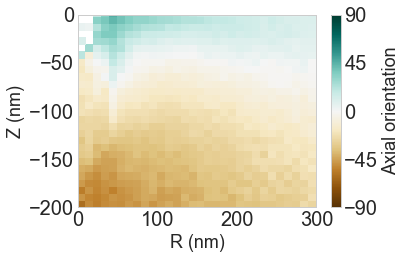

In [43]:
# zdir heat map RZ

plt.cm.get_cmap('PiYG')
# plt.set_cmap('PiYG')
plt.set_cmap('BrBG')

# plt.set_cmap('hsv')



x = branched_actin_bound_ends.plus_rpos_recalibrated*1000
    
y = (branched_actin_bound_ends.plus_zpos+0.4)*(-1000)

color = branched_actin_bound_ends.zdir_deg_flip90

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
  bins=30, statistic='mean', range = [[0,300],[-200,20]])
bin_means = np.flipud(np.rot90(bin_means))

# bin_means = bin_means/len(runs)/len(times)

# color map 

plt.pcolormesh(xedges, yedges, bin_means)

# color map hsv[0, 75%]

# plt.pcolormesh(xedges, yedges, bin_means, cmap=new_cmap)

cbar = plt.colorbar(label = 'Axial orientation')
plt.clim([-90,90])
cbar.set_ticks([-90, -45, 0, 45, 90])
# plt.caxis([-90, 90])
plt.xlabel('R (nm)')
plt.ylabel('Z (nm)')
plt.ylim([-200,0])

plt.tight_layout()

if(save_figures=='yes'):

    plt.savefig('../figures/'+pref+'_axial_orientation_RZ.pdf')
    plt.savefig('../figures/'+pref+'_axial_orientation_RZ.png')
    
plt.show()

In [ ]:
# same color code as cytosim snapshot, 75% of hsv

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


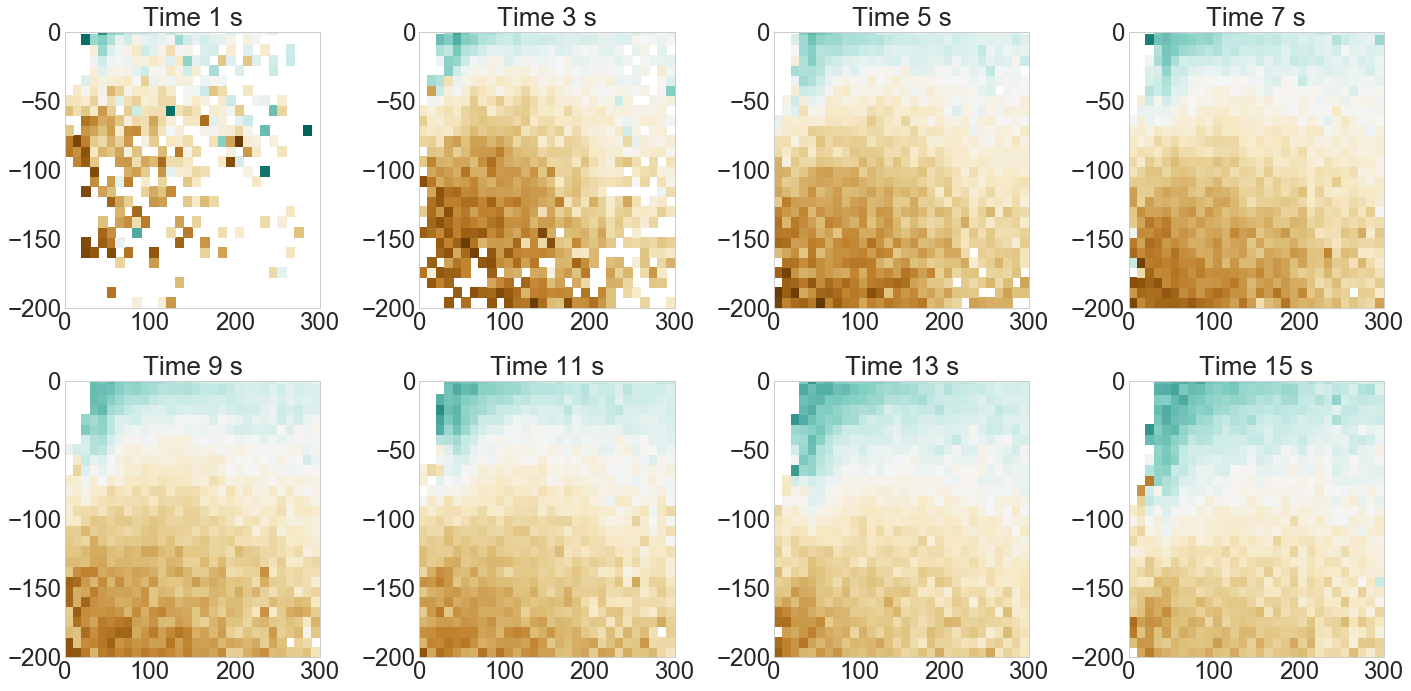

In [44]:
# zdir over time in subplots
# versus R and Z

plt.figure(figsize=(20,10))

for i, timept in enumerate(range(1,16,2),start=1):

    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

    branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]
   
    x = branched_actin_bound_ends_time.plus_rpos_recalibrated*1000

    y = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)
    
    color = branched_actin_bound_ends_time.zdir_deg_flip90

    bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
      bins=30, statistic='mean', range = [[0,300],[-200,20]])
    bin_means = np.flipud(np.rot90(bin_means))   
    plt.subplot(2, 4, i)
    plt.pcolormesh(xedges, yedges, bin_means)  
    plt.title('Time ' + str(timept) + ' s', fontsize=26)    
    plt.xticks(size=24)
    plt.yticks(size=24)
    plt.clim([-90,90])
    plt.ylim([-200,0])
    plt.tight_layout()
    
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_axial_orientation_time_RZ_subplots.png')
    plt.savefig('../figures/'+pref+'_axial_orientation_time_RZ_subplots.pdf')
    


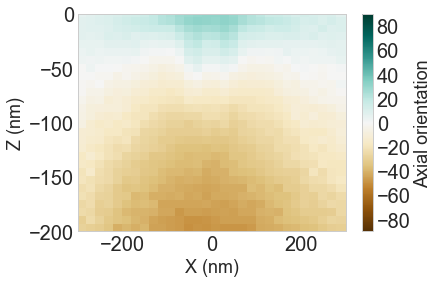

In [132]:
# zdir heat map XZ

plt.cm.get_cmap('PiYG')
# plt.set_cmap('PiYG')
plt.set_cmap('BrBG')



x = branched_actin_bound_ends.plus_xpos_recalibrated*1000
    
y = (branched_actin_bound_ends.plus_zpos+0.4)*(-1000)

color = branched_actin_bound_ends.zdir_deg_flip90

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
  bins=30, statistic='mean', range = [[-300,300],[-200,20]])
bin_means = np.flipud(np.rot90(bin_means))

# bin_means = bin_means/len(runs)/len(times)

plt.pcolormesh(xedges, yedges, bin_means)

plt.colorbar(label = 'Axial orientation')
plt.clim([-90,90])
plt.xlabel('X (nm)')
plt.ylabel('Z (nm)')
plt.ylim([-200,0])

if('save_figures'=='yes'):

    plt.savefig('../figures/'+pref+'axial_orientation_XZ.pdf')
    plt.savefig('../figures/'+pref+'axial_orientation_XZ.png')

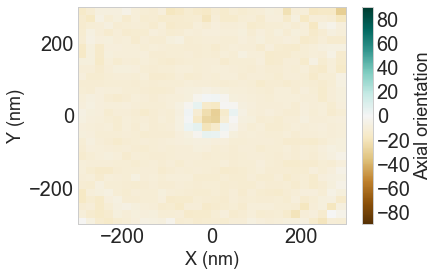

In [321]:
# zdir heat map XZ

plt.cm.get_cmap('PiYG')
# plt.set_cmap('PiYG')
plt.set_cmap('BrBG')



x = branched_actin_bound_ends.plus_xpos_recalibrated*1000
    
y = (branched_actin_bound_ends.plus_ypos_recalibrated)*(1000)

color = branched_actin_bound_ends.zdir_deg_flip90

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
  bins=30, statistic='mean', range = [[-300,300],[-300,300]])
bin_means = np.flipud(np.rot90(bin_means))

# bin_means = bin_means/len(runs)/len(times)

plt.pcolormesh(xedges, yedges, bin_means)

plt.colorbar(label = 'Axial orientation')
plt.clim([-90,90])
plt.xlabel('X (nm)')
plt.ylabel('Y (nm)')
# plt.ylim([-200,0])

if(save_figures=='yes'):

    plt.savefig('../figures/'+pref+'axial_orientation_XY.pdf')
    plt.savefig('../figures/'+pref+'axial_orientation_XY.png')

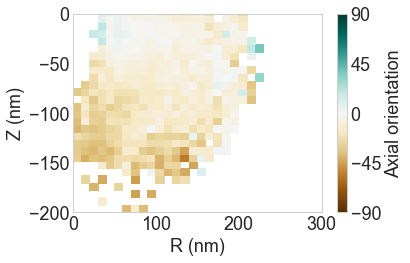

In [237]:
# arp angle zdir

# heat map RZ

# plt.cm.get_cmap('PiYG')
# plt.set_cmap('PiYG')
plt.set_cmap('BrBG')

# plt.set_cmap('hsv')



x = branched_actin_bound_arp.rpos_recalibrated*1000
    
y = (branched_actin_bound_arp.zpos+0.4)*(-1000)

color = branched_actin_bound_arp.branch_zdir_deg_flip90

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
  bins=30, statistic='mean', range = [[0,300],[-200,20]])
bin_means = np.flipud(np.rot90(bin_means))

# bin_means = bin_means/len(runs)/len(times)

# color map 

plt.pcolormesh(xedges, yedges, bin_means)

# color map hsv[0, 75%]

# plt.pcolormesh(xedges, yedges, bin_means, cmap=new_cmap)

cbar = plt.colorbar(label = 'Axial orientation')
plt.clim([-90,90])
cbar.set_ticks([-90, -45, 0, 45, 90])
# plt.caxis([-90, 90])
plt.xlabel('R (nm)')
plt.ylabel('Z (nm)')
plt.ylim([-200,0])

plt.tight_layout()

if(save_figures=='yes'):

    plt.savefig('../figures/'+pref+'_arp_axial_orientation_RZ.pdf')
    plt.savefig('../figures/'+pref+'_arp_axial_orientation_RZ.png')
    
plt.show()

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


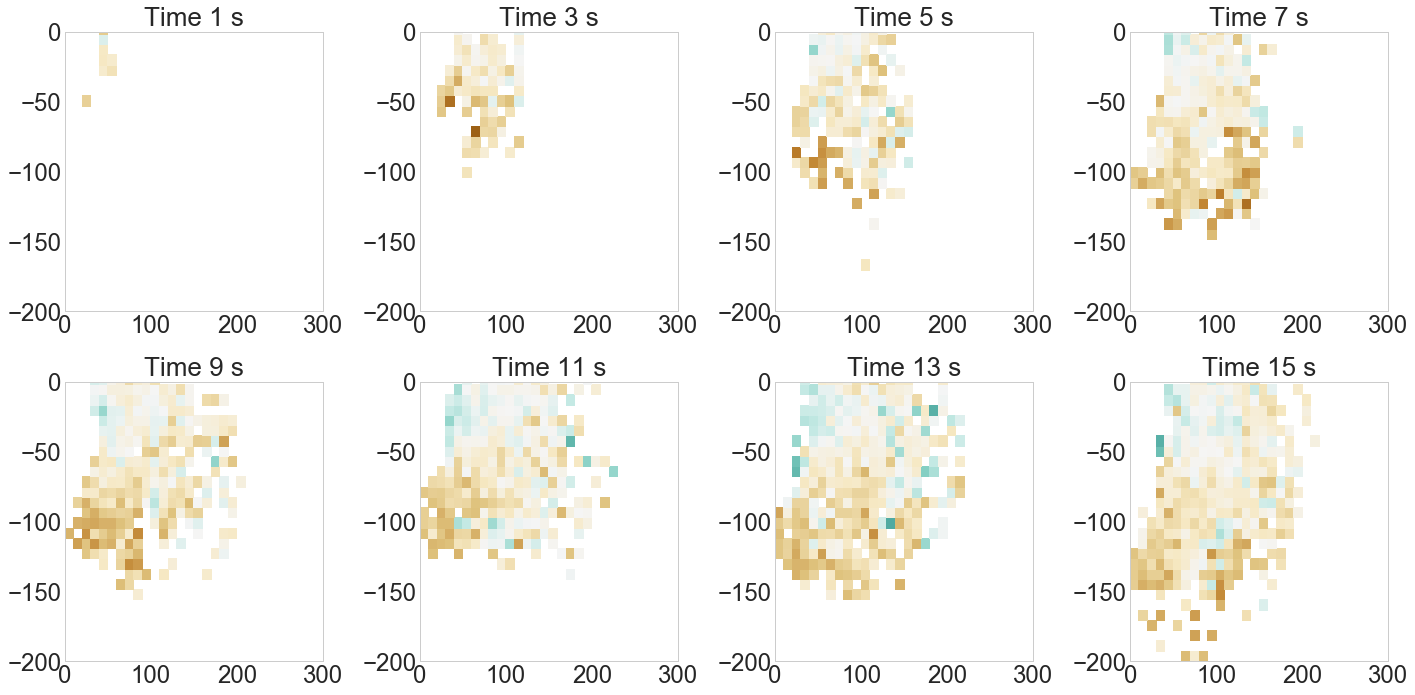

In [239]:
# arp zdir over time in subplots
# versus R and Z

plt.figure(figsize=(20,10))

for i, timept in enumerate(range(1,16,2),start=1):

    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    branched_actin_bound_arp_no_index=branched_actin_bound_arp.reset_index()

    branched_actin_bound_arp_time=branched_actin_bound_arp_no_index.loc[branched_actin_bound_arp_no_index['time']>(timept-1)].loc[branched_actin_bound_arp_no_index['time']<=(timept)]
   
    x = branched_actin_bound_arp_time.rpos_recalibrated*1000

    y = (branched_actin_bound_arp_time.zpos+0.4)*(-1000)
    
    color = branched_actin_bound_arp_time.branch_zdir_deg_flip90

    bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
      bins=30, statistic='mean', range = [[0,300],[-200,20]])
    bin_means = np.flipud(np.rot90(bin_means))   
    plt.subplot(2, 4, i)
    plt.pcolormesh(xedges, yedges, bin_means)  
    plt.title('Time ' + str(timept) + ' s', fontsize=26)    
    plt.xticks(size=24)
    plt.yticks(size=24)
    plt.clim([-90,90])
    plt.ylim([-200,0])
    plt.tight_layout()
    
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_arp_axial_orientation_time_RZ_subplots.png')
    plt.savefig('../figures/'+pref+'_arp_axial_orientation_time_RZ_subplots.pdf')
    



In [ ]:

# as a graph

# metric for anisotropy or base-oriented organization. can wait on this til i get graphs of x y dir below.


In [45]:
# get unit vector by dividing by mgnitude of x y position

# note that these are not recalibrated to bud position, so very close to the bud the directions could be opposite. but will be consistent with dir values.

cur_x = np.array(branched_actin_bound_ends['plus_xpos'])
cur_y = np.array(branched_actin_bound_ends['plus_ypos'])

cur_x_dir = np.array(branched_actin_bound_ends['plus_xdir'])
cur_y_dir = np.array(branched_actin_bound_ends['plus_ydir'])

cur_mag = np.sqrt((cur_x*cur_x)+(cur_y*cur_y))

unit_x = np.divide(cur_x,cur_mag)
unit_y = np.divide(cur_y,cur_mag)

# radial orientatoin defined as unit vector * cos(direction).
# I think it should be one if the pos is aligned with the direction from the origin. and -1 if opposite.

# get a pos and neg control on this.

radial_orientation_x = unit_x*cur_x_dir
radial_orientation_y = unit_y*cur_y_dir

# define radial orientation as SUM radial orientation in x and y. 
# need to check this 

radial_orientation = np.sum([radial_orientation_x, radial_orientation_y], axis = 0)

branched_actin_bound_ends['radial_orientation'] = radial_orientation

# I had really better sure this comes out to random for a randomly oridented filemant. but is promising.

# with neg control

if import_random_filaments =='yes':
    random_filament_ends
    cur_x = np.array(random_filament_ends['plus_xpos'])
    cur_y = np.array(random_filament_ends['plus_ypos'])

    cur_x_dir = np.array(random_filament_ends['plus_xdir'])
    cur_y_dir = np.array(random_filament_ends['plus_ydir'])

    cur_mag = np.sqrt((cur_x*cur_x)+(cur_y*cur_y))

    unit_x = np.divide(cur_x,cur_mag)
    unit_y = np.divide(cur_y,cur_mag)

    # radial orientatoin defined as unit vector * cos(direction).
    # I think it should be one if the pos is aligned with the direction from the origin. and -1 if opposite.

    # get a pos and neg control on this.

    radial_orientation_x = unit_x*cur_x_dir
    radial_orientation_y = unit_y*cur_y_dir

    # define radial orientation as SUM radial orientation in x and y. 
    # need to check this 

    radial_orientation = np.sum([radial_orientation_x, radial_orientation_y], axis = 0)

    random_filament_ends['radial_orientation'] = radial_orientation
    print('calculated for negative control: radial orientation')


plt.hist(radial_orientation)
plt.show()
# print('radial orientation: ' + str(np.mean(radial_orientation))+ + '+-' + str(np.std(radial_orientation)))

      

NameError: name 'import_random_filaments' is not defined

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


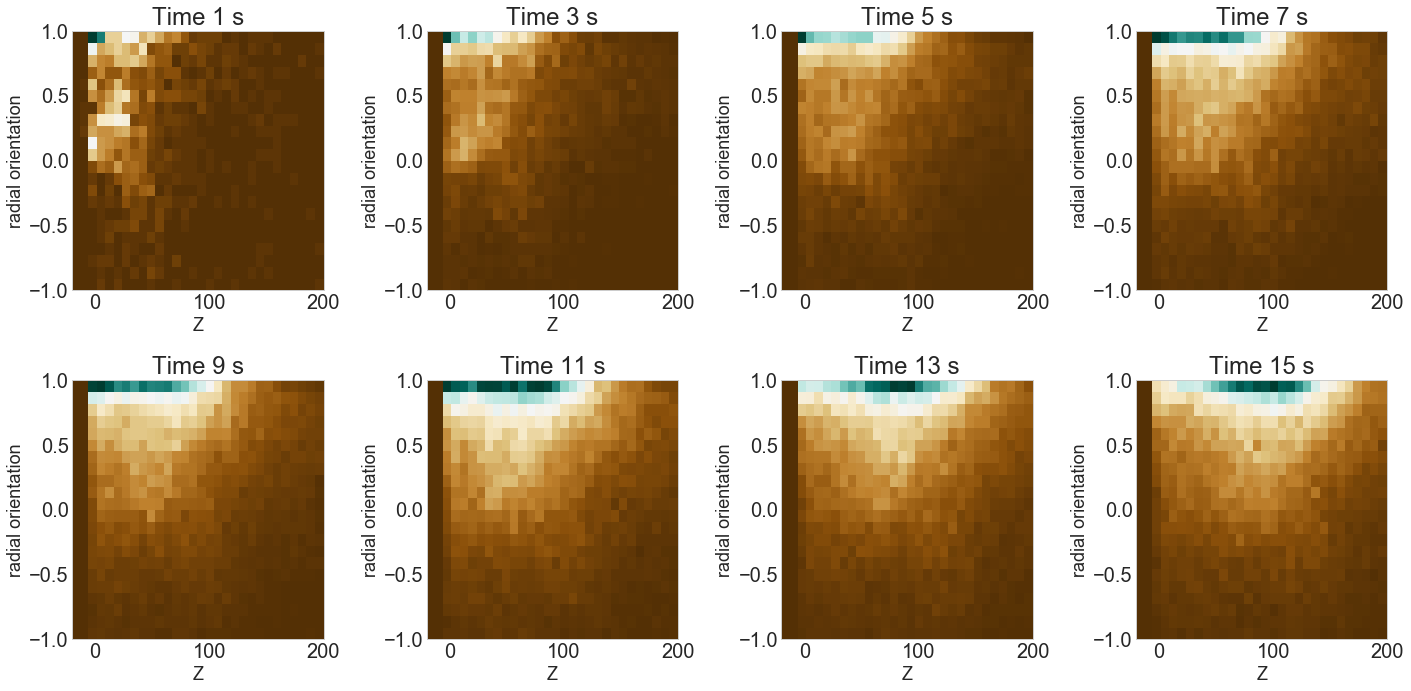

In [46]:
# radial orientation

# versus R or and Z

plt.figure(figsize=(20,10))

for i, timept in enumerate(range(1,16,2),start=1):

    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

    branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

#     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

    # set position

    x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000
    
    r_plus_time = branched_actin_bound_ends_time.plus_rpos_recalibrated*1000

    z_plus_time = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)
    
    radial_orientation_time = branched_actin_bound_ends_time.radial_orientation

#     z_dir_plus_degrees_time = np.degrees(np.arccos(branched_actin_bound_ends_time.zdir))
    
    z_dir_plus_hist,xs,ys=np.histogram2d(-z_plus_time,radial_orientation_time,bins=[30,22],range=[[-20, 200],[-1, 1]])
#     z_dir_plus_hist,xs,ys=np.histogram2d(z_dir_plus_time_flip90,z_plus_time,bins=[30,22],range=[[-90, 90],[-200, 20]])


    z_dir_plus_hist = np.flipud(np.rot90(z_dir_plus_hist))
    plt.subplot(2, 4, i)
      
    plt.pcolormesh(xs, ys, z_dir_plus_hist)
    
#     plt.xlim([0, 250])
    
    plt.xlabel('Z')
    plt.ylabel('radial orientation')
    
#     cb = plt.colorbar(label = 'ends')
    plt.title('Time ' + str(timept) + ' s', fontsize=24)
    
#     plt.yticks([-90, -45, 0, 45, 90])
    
    plt.xticks(size=20)
    plt.yticks(size=20)

    plt.tight_layout()
    
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'radial_orientation_time_vs_z_subplots.png')
    plt.savefig('../figures/'+pref+'radial_orientation_time_vs_z_subplots.pdf')
    





time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


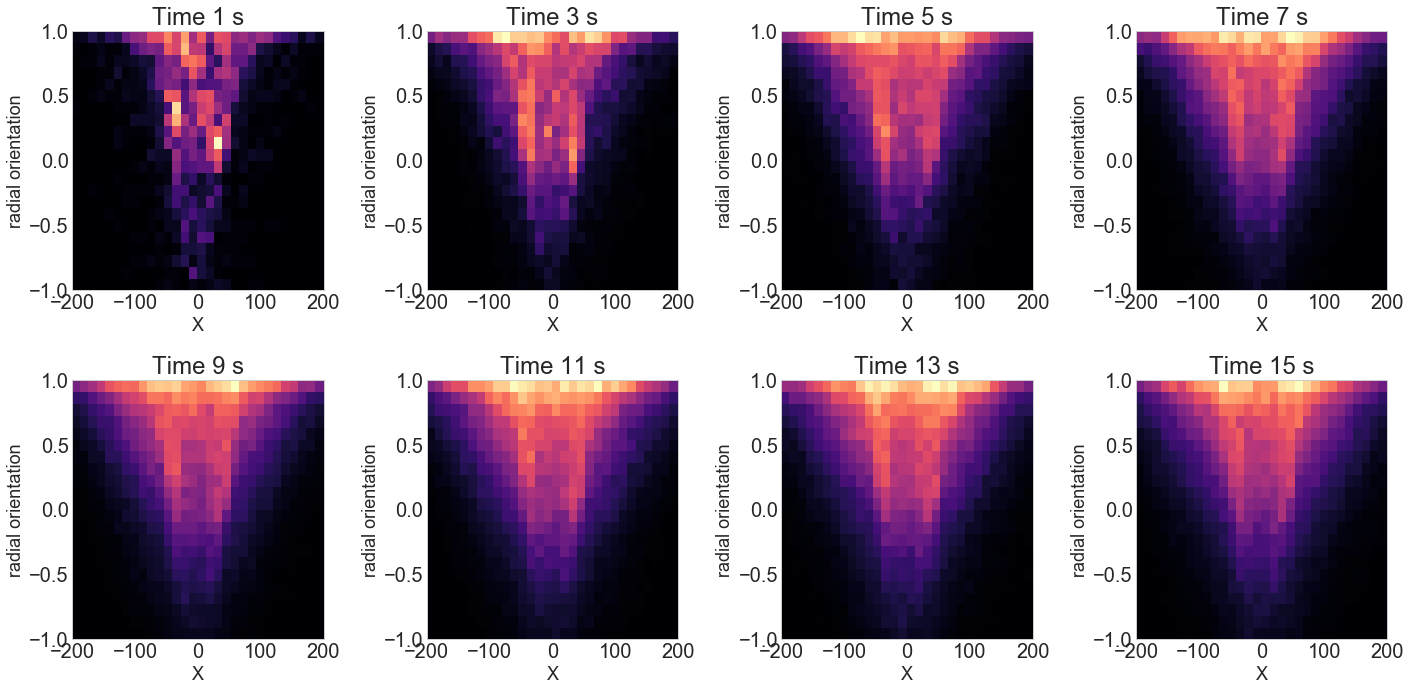

In [71]:
# radial orientation

# versus X and Z

plt.figure(figsize=(20,10))

for i, timept in enumerate(range(1,16,2),start=1):

    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

    branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

#     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

    # set position

    x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000
    
    r_plus_time = branched_actin_bound_ends_time.plus_rpos_recalibrated*1000

    z_plus_time = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)
    
    radial_orientation_time = branched_actin_bound_ends_time.radial_orientation

#     z_dir_plus_degrees_time = np.degrees(np.arccos(branched_actin_bound_ends_time.zdir))
    
    z_dir_plus_hist,xs,ys=np.histogram2d(x_plus_time,radial_orientation_time,bins=[30,22],range=[[-200, 200],[-1, 1]])
#     z_dir_plus_hist,xs,ys=np.histogram2d(z_dir_plus_time_flip90,z_plus_time,bins=[30,22],range=[[-90, 90],[-200, 20]])


    z_dir_plus_hist = np.flipud(np.rot90(z_dir_plus_hist))
    plt.subplot(2, 4, i)
      
    plt.pcolormesh(xs, ys, z_dir_plus_hist)
    
#     plt.xlim([0, 250])
    
    plt.xlabel('X')
    plt.ylabel('radial orientation')
    
#     cb = plt.colorbar(label = 'ends')
    plt.title('Time ' + str(timept) + ' s', fontsize=24)
    
#     plt.yticks([-90, -45, 0, 45, 90])
    
    plt.xticks(size=20)
    plt.yticks(size=20)

    plt.tight_layout()
    
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'radial_orientation_time_vs_x_subplots.png')
    plt.savefig('../figures/'+pref+'radial_orientation_time_vs_x_subplots.pdf')
    





time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


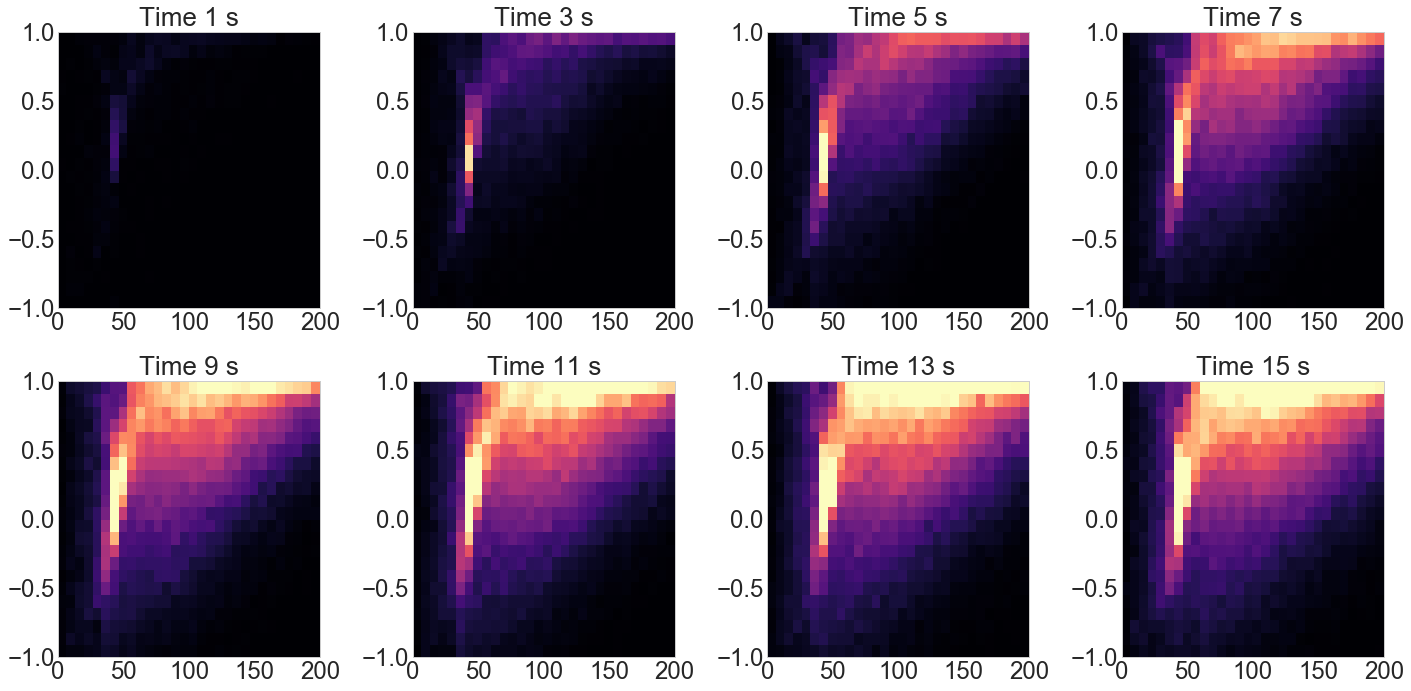

In [78]:
# radial orientation

# versus R and Z

plt.figure(figsize=(20,10))

for i, timept in enumerate(range(1,16,2),start=1):

    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

    branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

#     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

    # set position

    x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000
    
    r_plus_time = branched_actin_bound_ends_time.plus_rpos_recalibrated*1000

    z_plus_time = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)
    
    radial_orientation_time = branched_actin_bound_ends_time.radial_orientation

#     z_dir_plus_degrees_time = np.degrees(np.arccos(branched_actin_bound_ends_time.zdir))
    
    r_dir_plus_hist,xs,ys=np.histogram2d(r_plus_time,radial_orientation_time,bins=[30,22],range=[[0, 200],[-1, 1]])
#     z_dir_plus_hist,xs,ys=np.histogram2d(z_dir_plus_time_flip90,z_plus_time,bins=[30,22],range=[[-90, 90],[-200, 20]])


    r_dir_plus_hist = np.flipud(np.rot90(r_dir_plus_hist))
    
#     scale by nb runs and time in time bind
    r_dir_plus_hist = r_dir_plus_hist/len(runs)/times_per_timept
    
    plt.subplot(2, 4, i)
      
    plt.pcolormesh(xs, ys, r_dir_plus_hist)
    
#     plt.xlim([0, 250])
    
#     plt.xlabel('R')
#     plt.ylabel('radial orientation')
    plt.clim([0, 0.6])
    
#     cb = plt.colorbar(label = 'ends')
    plt.title('Time ' + str(timept) + ' s', fontsize=26)
    
#     plt.yticks([-90, -45, 0, 45, 90])
    
    plt.xticks(size=24)
    plt.yticks(size=24)

    plt.tight_layout()
    
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'radial_orientation_time_vs_r_subplots_abs.png')
    plt.savefig('../figures/'+pref+'radial_orientation_time_vs_r_subplots_abs.pdf')
    


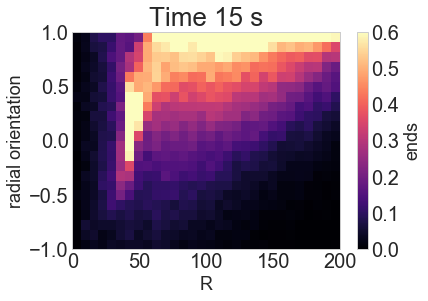

In [77]:
plt.pcolormesh(xs, ys, r_dir_plus_hist)
plt.xlabel('R')
plt.ylabel('radial orientation')
plt.clim([0, 0.6])

cb = plt.colorbar(label = 'ends')
plt.title('Time ' + str(timept) + ' s', fontsize=26)

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'radial_orientation_time_vs_r_subplots_abs_colorbar.png')

In [69]:
# # radial orientation, relative scale histogram

# # versus R and Z

# plt.figure(figsize=(20,10))

# for i, timept in enumerate(range(1,16,2),start=1):

#     print('time ' + str(timept))
    
#     # bin ± 0.5s as interval
#     branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

#     branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

# #     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

#     # set position

#     x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000
    
#     r_plus_time = branched_actin_bound_ends_time.plus_rpos_recalibrated*1000

#     z_plus_time = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)
    
#     radial_orientation_time = branched_actin_bound_ends_time.radial_orientation

# #     z_dir_plus_degrees_time = np.degrees(np.arccos(branched_actin_bound_ends_time.zdir))
    
#     r_dir_plus_hist,xs,ys=np.histogram2d(r_plus_time,radial_orientation_time,bins=[30,22],range=[[0, 200],[-1, 1]])
# #     z_dir_plus_hist,xs,ys=np.histogram2d(z_dir_plus_time_flip90,z_plus_time,bins=[30,22],range=[[-90, 90],[-200, 20]])


#     r_dir_plus_hist = np.flipud(np.rot90(r_dir_plus_hist))
    
# #     scale by nb runs and time in time bind
#     r_dir_plus_hist = r_dir_plus_hist/len(runs)/times_per_timept
    
#     plt.subplot(2, 4, i)
      
#     plt.pcolormesh(xs, ys, r_dir_plus_hist)
    
# #     plt.xlim([0, 250])
    
# #     plt.xlabel('R')
# #     plt.ylabel('radial orientation')
# #     plt.clim([0, 0.6])
    
# #     cb = plt.colorbar(label = 'ends')
#     plt.title('Time ' + str(timept) + ' s', fontsize=26)
    
# #     plt.yticks([-90, -45, 0, 45, 90])
    
#     plt.xticks(size=24)
#     plt.yticks(size=24)

#     plt.tight_layout()
    
    
# if save_figures == 'yes': 
#     plt.savefig('../figures/'+pref+'radial_orientation_time_vs_r_subplots_relative_colorbar.png')
#     plt.savefig('../figures/'+pref+'radial_orientation_time_vs_r_subplots_relative_colorbar.pdf')
    


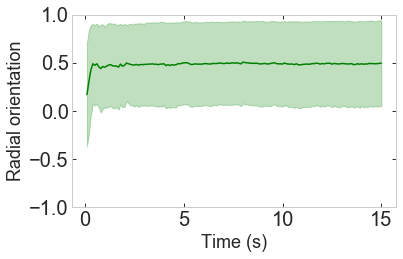

In [50]:
#### radial orientation mean std over time
means = branched_actin_bound_ends.groupby('time').radial_orientation.mean()
stds = branched_actin_bound_ends.groupby('time').radial_orientation.std()

if import_random_filaments=='yes':
    means_rf = random_filament_ends.groupby('time').radial_orientation.mean()
    stds_rf = random_filament_ends.groupby('time').radial_orientation.std()
    

plt.figure(figsize=(6,4))
plt.rc('font', size=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

# random orientation control

if import_random_filaments=='yes':
    

    color='black'

    plt.plot(means_rf.index,means_rf, c=color, alpha =0.5)
    times_cur = means_rf.index
    yminus=means_rf-stds_rf
    yplus=means_rf+stds_rf

    plt.fill_between(times_cur, np.array(yminus), np.array(yplus), alpha=0.15,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 



color='green'

plt.plot(means.index,means, c=color)
times_cur = means.index
yminus=means-stds
yplus=means+stds

plt.fill_between(times_cur, np.array(yminus), np.array(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 

plt.xlabel('Time (s)')
plt.ylabel('Radial orientation')


# z

plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)

plt.ylim([-1, 1])
plt.tight_layout()

if(save_figures=='yes'):
    plt.savefig('../figures/'+pref+'_radial_orientation_vs_time.png')
    plt.savefig('../figures/'+pref+'_radial_orientation_vs_time.pdf')

plt.show()

# branched_actin_bound_ends.radial_orientation

In [70]:
# # radial orientation hist

# plt.figure(figsize=(20,10))

# for i, timept in enumerate(range(1,16,2),start=1):

#     print('time ' + str(timept))
    
#     # bin ± 0.5s as interval
#     branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

#     branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

# #     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

#     # set position

# #     x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000
    
# #     r_plus_time = branched_actin_bound_ends_time.plus_rpos_recalibrated*1000

# #     z_plus_time = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)
    
#     radial_orientation_time = branched_actin_bound_ends_time.radial_orientation

# #     z_dir_plus_degrees_time = np.degrees(np.arccos(branched_actin_bound_ends_time.zdir))
    
# #     z_dir_plus_hist,xs,ys=np.histogram2d(r_plus_time,radial_orientation_time,bins=[30,22],range=[[0, 200],[-1, 1]])
# # #     z_dir_plus_hist,xs,ys=np.histogram2d(z_dir_plus_time_flip90,z_plus_time,bins=[30,22],range=[[-90, 90],[-200, 20]])


# #     z_dir_plus_hist = np.flipud(np.rot90(z_dir_plus_hist))
#     plt.subplot(2, 4, i)
      
#     plt.hist(radial_orientation_time)
    
# #     plt.xlim([0, 250])
    
# #     plt.xlabel('R')
#     plt.xlabel('radial orientation')
    
# #     cb = plt.colorbar(label = 'ends')
#     plt.title('Time ' + str(timept) + ' s', fontsize=24)
    
# #     plt.yticks([-90, -45, 0, 45, 90])
    
#     plt.xticks(size=20)
#     plt.yticks(size=20)

#     plt.tight_layout()
    
    
# if save_figures == 'yes': 
#     plt.savefig('../figures/'+pref+'radial_orientation_time_hist_subplots.png')
#     plt.savefig('../figures/'+pref+'radial_orientation_time_hist_subplots.pdf')
    





In [ ]:
# radial orientation versus x and z heat map

# bin x and z values into pixels, and then plot against those.

# make mean radial orientation per binned value, using groupby. see titanic example. but make sure it's 2d.

# radial orientation versus r and z heat map

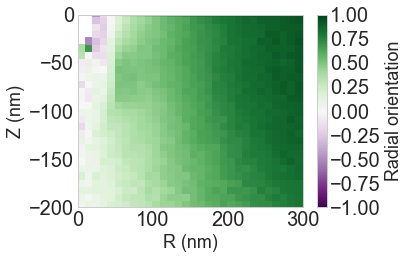

In [297]:

plt.cm.get_cmap('PiYG')
# plt.set_cmap('PiYG')
plt.set_cmap('PRGn')



x = branched_actin_bound_ends.plus_rpos_recalibrated*1000
    
y = (branched_actin_bound_ends.plus_zpos+0.4)*(-1000)

color = branched_actin_bound_ends['radial_orientation']

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
  bins=30, statistic='mean', range = [[0,300],[-200,20]])
bin_means = np.flipud(np.rot90(bin_means))

# bin_means = bin_means/len(runs)/len(times)

plt.pcolormesh(xedges, yedges, bin_means)

plt.colorbar(label = 'Radial orientation')
plt.clim([-1,1])
plt.xlabel('R (nm)')
plt.ylabel('Z (nm)')
plt.ylim([-200,0])

plt.tight_layout()

if(save_figures=='yes'):

    plt.savefig('../figures/'+pref+'_radial_orientation_RZ.pdf')
    plt.savefig('../figures/'+pref+'_radial_orientation_RZ.png')

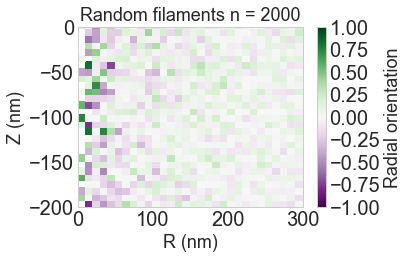

In [342]:

plt.cm.get_cmap('PiYG')
# plt.set_cmap('PiYG')
plt.set_cmap('PRGn')

if import_random_filaments =='yes':

    x = random_filament_ends.plus_rpos*1000

    y = (random_filament_ends.plus_zpos+0.4)*(-1000)

    color = random_filament_ends['radial_orientation']
   
    bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
      bins=30, statistic='mean', range = [[0,300],[-200,20]])
    bin_means = np.flipud(np.rot90(bin_means))

    # bin_means = bin_means/len(runs)/len(times)

    plt.title('Random filaments n = 2000')
    
    plt.pcolormesh(xedges, yedges, bin_means)

    plt.colorbar(label = 'Radial orientation')
    plt.clim([-1,1])
    plt.xlabel('R (nm)')
    plt.ylabel('Z (nm)')
    plt.ylim([-200,0])

    plt.tight_layout()

    if(save_figures=='yes'):

        plt.savefig('../figures/'+pref+'_random_filaments_radial_orientation_RZ.pdf')
        plt.savefig('../figures/'+pref+'_random_filaments_radial_orientation_RZ.png')

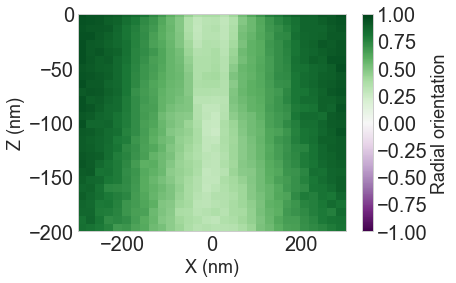

In [295]:
# XZ
plt.cm.get_cmap('PiYG')
# plt.set_cmap('PiYG')
plt.set_cmap('PRGn')



x = branched_actin_bound_ends.plus_xpos_recalibrated*1000
    
y = (branched_actin_bound_ends.plus_zpos+0.4)*(-1000)

color = branched_actin_bound_ends['radial_orientation']

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
  bins=30, statistic='mean', range = [[-300,300],[-200,20]])
bin_means = np.flipud(np.rot90(bin_means))

# bin_means = bin_means/len(runs)/len(times)

plt.pcolormesh(xedges, yedges, bin_means)

plt.colorbar(label = 'Radial orientation')
plt.clim([-1,1])
plt.xlabel('X (nm)')
plt.ylabel('Z (nm)')
plt.ylim([-200,0])

if('save_figures'=='yes'):

    plt.savefig('../figures/'+pref+'_radial_orientation_XZ.pdf')
    plt.savefig('../figures/'+pref+'_radial_orientation_XZ.png')

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


<Figure size 432x288 with 0 Axes>

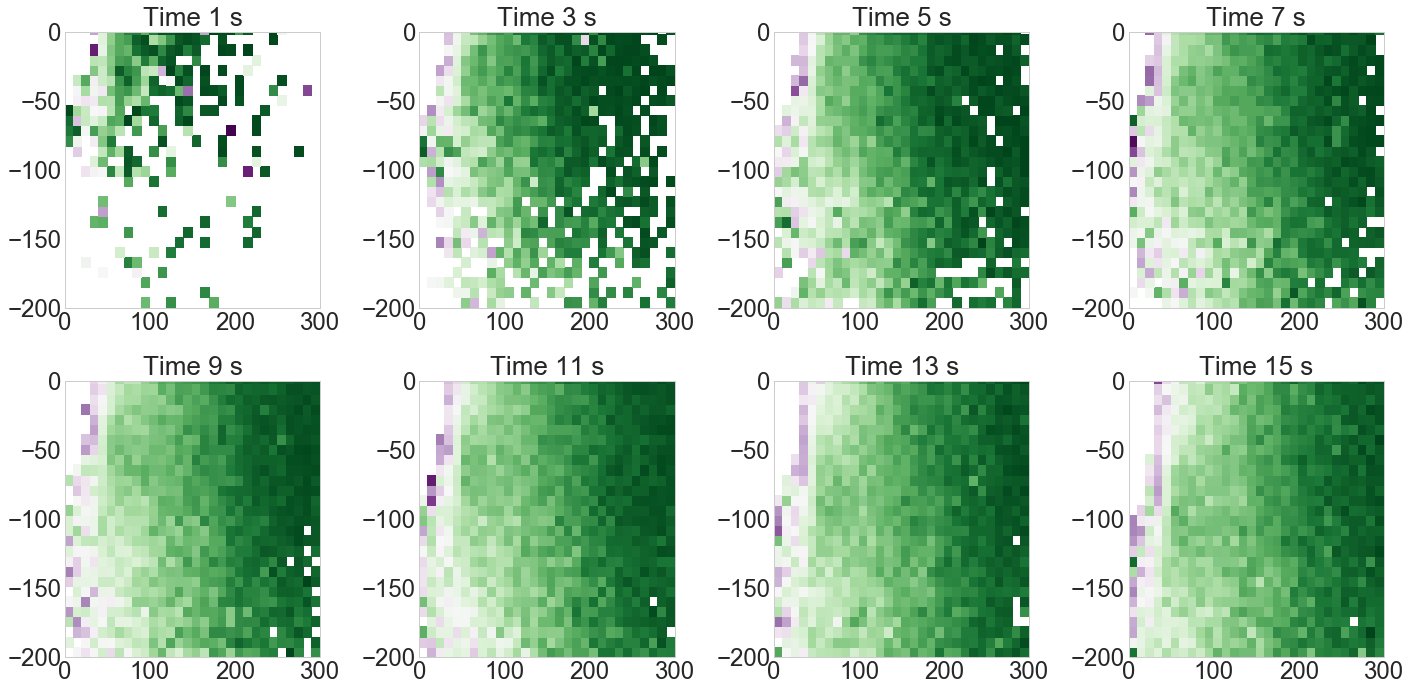

In [37]:
# over time in subplots
# versus R and Z
plt.set_cmap('PRGn')
plt.figure(figsize=(20,10))

for i, timept in enumerate(range(1,16,2),start=1):

    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

    branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

#     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

    # set position

#     x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000
    
    x = branched_actin_bound_ends_time.plus_rpos_recalibrated*1000

    y = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)
    
    color = branched_actin_bound_ends_time.radial_orientation

#     z_dir_plus_degrees_time = np.degrees(np.arccos(branched_actin_bound_ends_time.zdir))
    bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
      bins=30, statistic='mean', range = [[0,300],[-200,20]])
    bin_means = np.flipud(np.rot90(bin_means))

    # bin_means = bin_means/len(runs)/len(times)

#     plt.pcolormesh(xedges, yedges, bin_means)
#     r_dir_plus_hist,xs,ys=np.histogram2d(r_plus_time,radial_orientation_time,bins=[30,22],range=[[0, 200],[-1, 1]])
#     z_dir_plus_hist,xs,ys=np.histogram2d(z_dir_plus_time_flip90,z_plus_time,bins=[30,22],range=[[-90, 90],[-200, 20]])


#     r_dir_plus_hist = np.flipud(np.rot90(r_dir_plus_hist))
    
#     scale by nb runs and time in time bind
#     r_dir_plus_hist = r_dir_plus_hist/len(runs)/times_per_timept
    
    plt.subplot(2, 4, i)
    plt.pcolormesh(xedges, yedges, bin_means)  
#     plt.pcolormesh(xs, ys, r_dir_plus_hist)
    
#     plt.xlim([0, 250])
    
#     plt.xlabel('R')
#     plt.ylabel('radial orientation')
#     plt.clim([0, 0.6])
    
#     cb = plt.colorbar(label = 'ends')
    plt.title('Time ' + str(timept) + ' s', fontsize=26)
    
#     plt.yticks([-90, -45, 0, 45, 90])
    
    plt.xticks(size=24)
    plt.yticks(size=24)
    plt.clim([-1,1])
    plt.ylim([-200,0])
    plt.tight_layout()
    
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_radial_orientation_time_RZ_subplots.png')
    plt.savefig('../figures/'+pref+'_radial_orientation_time_RZ_subplots.pdf')
    


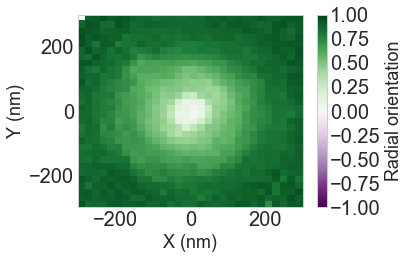

In [51]:
# radial orientation vs XY

plt.cm.get_cmap('PiYG')
# plt.set_cmap('PiYG')
plt.set_cmap('PRGn')



x = branched_actin_bound_ends.plus_xpos_recalibrated*1000
    
y = (branched_actin_bound_ends.plus_ypos_recalibrated)*(1000)

color = branched_actin_bound_ends['radial_orientation']

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
  bins=30, statistic='mean', range = [[-300,300],[-300,300]])
bin_means = np.flipud(np.rot90(bin_means))

# bin_means = bin_means/len(runs)/len(times)

plt.pcolormesh(xedges, yedges, bin_means)

plt.colorbar(label = 'Radial orientation')
plt.clim([-1,1])
plt.xlabel('X (nm)')
plt.ylabel('Y (nm)')
# plt.ylim([-200,0])
plt.tight_layout()
if(save_figures=='yes'):

    plt.savefig('../figures/'+pref+'_radial_orientation_XY.pdf')
    plt.savefig('../figures/'+pref+'_radial_orientation_XY.png')

In [ ]:
# radial orientation  xy over time

## position of barbed end w.r.t to neck versus membrane

In [ ]:
# bud is 45 nm in radius, with neck 30 nm radius.

# hip1r ends 9 nm above the center of the sphere. 

# reasonable demarcation between bud and neck is 10 nm above sphere (recalibrated bud z position).

# the neck is 30 nm radius, so a point <35 nm from r=0 and >10 nm above z=0 (both recalibrated) is near the neck

# z ≤ 5 nm is near the base of pit.

# e.g. within 5 nm

# identify location of bud, neck using recalibrated and absolute value.


# add plus ends base neck True/False boolean colun as in parameter sweep analysis

In [52]:
# metric for how close to neck or base, in micron

close_metric = 0.0075

plus_ends_base = branched_actin_bound_ends.loc[branched_actin_bound_ends['plus_zpos']+0.4<close_metric]
plus_ends_neck = branched_actin_bound_ends.loc[branched_actin_bound_ends['plus_rpos_recalibrated']<(0.03+close_metric)].loc[branched_actin_bound_ends['plus_zpos_recalibrated']<0.010]

growing_ends_base = branched_actin_bound_ends.loc[branched_actin_bound_ends['plus_state']==1].loc[branched_actin_bound_ends['plus_zpos']+0.4<close_metric]
growing_ends_neck = branched_actin_bound_ends.loc[branched_actin_bound_ends['plus_state']==1].loc[branched_actin_bound_ends['plus_rpos_recalibrated']<(0.03+close_metric)].loc[branched_actin_bound_ends['plus_zpos_recalibrated']<0.010]

def get_mean_count_time(data_frame):
# merge with solid to get remaing timepoints (which will count as 0)

    merged = pd.merge(solid_positions, data_frame, on=['run','time'], how = 'outer')

    # use pivot table to identify number of columns in the ends dataframe. other runs, timepoints will be 0

    data_frame_time_count = merged.pivot_table(index=['run', 'time'], values='plus_rpos', fill_value=0, dropna = False, aggfunc='count')

    # mean std grouped by time

    mean_nb_vs_time=data_frame_time_count.groupby('time').mean().iloc[:,0]
    std_nb_vs_time=data_frame_time_count.groupby('time').std().iloc[:,0]
    
    return [mean_nb_vs_time, std_nb_vs_time]

# def get_mean_count_time(data_frame):

#     # get size of dataframe; i.e. number of ends that satisfy above criteria

#     data_frame_time_count = data_frame.groupby(['run', 'time']).size()

#     # mean std grouped by time

#     mean_nb_vs_time=pd.DataFrame(data_frame_time_count).groupby('time').mean().iloc[:,0]
#     std_nb_vs_time=pd.DataFrame(data_frame_time_count).groupby('time').std().iloc[:,0]
    
#     return [mean_nb_vs_time, std_nb_vs_time]
    

[plus_ends_base_time_mean, plus_ends_base_time_std] = get_mean_count_time(plus_ends_base)
[plus_ends_neck_time_mean, plus_ends_neck_time_std] = get_mean_count_time(plus_ends_neck)

[growing_ends_base_time_mean, growing_ends_base_time_std] = get_mean_count_time(growing_ends_base)
[growing_ends_neck_time_mean, growing_ends_neck_time_std] = get_mean_count_time(growing_ends_neck)



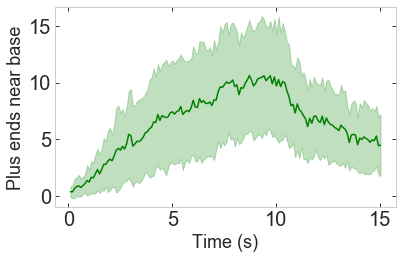

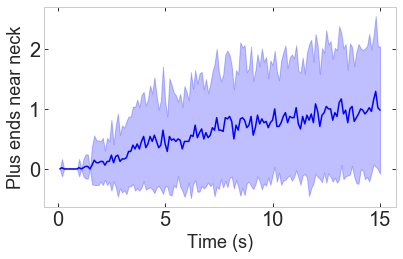

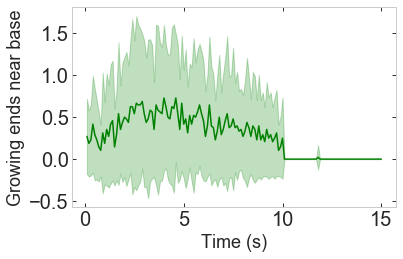

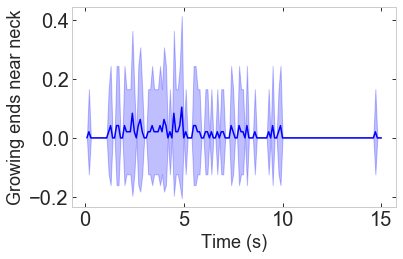

In [53]:
# means_time = mean_nb_ends_time.iloc[:,0]
# stds_time  = std_nb_ends_time.iloc[:,0]



    
plot_errorbar(plus_ends_base_time_mean, plus_ends_base_time_std, 'green', 'Plus ends near base')   
plot_errorbar(plus_ends_neck_time_mean, plus_ends_neck_time_std, 'blue', 'Plus ends near neck')

plot_errorbar(growing_ends_base_time_mean, growing_ends_base_time_std, 'green', 'Growing ends near base')   
plot_errorbar(growing_ends_neck_time_mean, growing_ends_neck_time_std, 'blue', 'Growing ends near neck')



if('save_figures'=='yes'):
    plt.savefig('../figures/'+pref+'_ends_near_base_neck_vs_time.png')
    plt.savefig('../figures/'+pref+'_ends_near_base_neck_vs_time.pdf')

plt.show()

## use this to count barbed ends near base just in case

In [9]:
# save barbed end number over time

# plus_ends_base_time_mean.to_pickle('barbed_ends_time_mean.pkl')
# plus_ends_base_time_std.to_pickle('barbed_ends_time_std.pkl')



In [45]:
solid_positions.to_pickle(output_dir+'/dataframes/solid_positions.pkl')

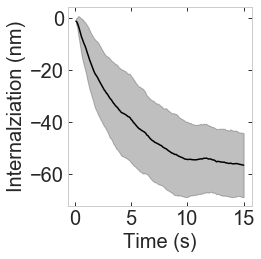

In [184]:


mean_intern = (solid_positions['internalization'].groupby('time').mean()*1000)
std_intern = (solid_positions['internalization'].groupby('time').std()*1000)
plt.figure(figsize=[4,4])
plot_multiple_errorbars(-mean_intern, std_intern, 'Black', 'Internalziation (nm)')

plt.xticks([0,5,10,15])

plt.savefig('../figures/'+pref+'_internalization_time.pdf')
plt.savefig('../figures/'+pref+'_internalization_time.png')

# mean_intern.to_pickle('internalization_time_mean.pkl')
# std_intern.to_pickle('internalization_time_std.pkl')



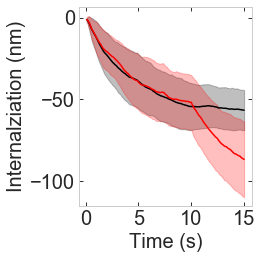

In [185]:
# overlay w endocytosis_cut

intern_cut

mean_intern = (solid_positions['internalization'].groupby('time').mean()*1000)
std_intern = (solid_positions['internalization'].groupby('time').std()*1000)

mean_intern_cut = (intern_cut['internalization'].groupby('time').mean()*1000)
std_intern_cut = (intern_cut['internalization'].groupby('time').std()*1000)

plt.figure(figsize=[4,4])

plot_multiple_errorbars(-mean_intern, std_intern, 'Black', 'Internalziation (nm)')
plot_multiple_errorbars(-mean_intern_cut, std_intern_cut, 'Red', 'Internalziation (nm)')


plt.xticks([0,5,10,15])

plt.savefig('../figures/'+pref+'_internalization_comparison_time.pdf')
plt.savefig('../figures/'+pref+'_internalization_comparison_time.png')


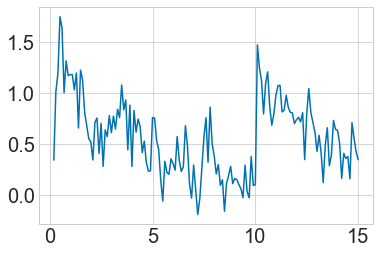

In [36]:
plt.plot(mean_intern.diff())

Text(0.5,0,'Time (s)')

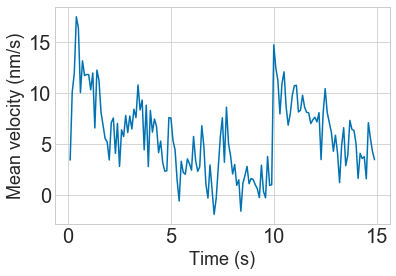

In [113]:
timestep = 0.1 # s
diffs = np.diff(mean_intern,n=1)/timestep
times = np.arange(0.1,15,0.1)
plt.plot(times,diffs)

plt.ylabel('Mean velocity (nm/s)')
plt.xlabel('Time (s)')


In [ ]:
# why errorbars large? maybe because almost always zero? Or is it averaging too many?


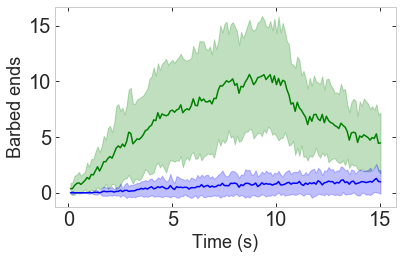

In [56]:
plt.figure(figsize=(6,4))
plt.rc('font', size=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

means1 = plus_ends_base_time_mean
stds1  = plus_ends_base_time_std   

means2 = plus_ends_neck_time_mean
stds2  = plus_ends_neck_time_std

color='green'

plt.plot(means1.index,means1, c=color)
times_cur = means1.index
yminus=means1-stds1
yplus=means1+stds1

plt.fill_between(times_cur, np.asarray(yminus), np.asarray(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 

color='blue'

plt.plot(means2.index,means2, c=color)
times_cur = means2.index
yminus=means2-stds2
yplus=means2+stds2

plt.fill_between(times_cur, np.asarray(yminus), np.asarray(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 



plt.xlabel('Time (s)')
plt.ylabel('Barbed ends')

plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)

plt.tight_layout()


if(save_figures =='yes'):
    plt.savefig('../figures/'+pref+'_ends_near_base_neck_vs_time_7pt5nm.png')
    plt.savefig('../figures/'+pref+'_ends_near_base_neck_vs_time_7pt5nm.pdf')

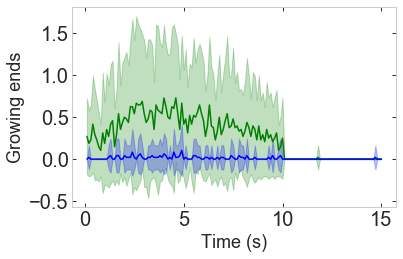

In [57]:
# growing ends

plt.figure(figsize=(6,4))
plt.rc('font', size=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

means1 = growing_ends_base_time_mean
stds1  = growing_ends_base_time_std   

means2 = growing_ends_neck_time_mean
stds2  = growing_ends_neck_time_std

color='green'

plt.plot(means1.index,means1, c=color)
times_cur = means1.index
yminus=means1-stds1
yplus=means1+stds1

plt.fill_between(times_cur, np.asarray(yminus), np.asarray(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 

color='blue'

plt.plot(means2.index,means2, c=color)
times_cur = means2.index
yminus=means2-stds2
yplus=means2+stds2

plt.fill_between(times_cur, np.asarray(yminus), np.asarray(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 



plt.xlabel('Time (s)')
plt.ylabel('Growing ends')

plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)

plt.tight_layout()


if(save_figures =='yes'):
    plt.savefig('../figures/'+pref+'_growing_ends_near_base_neck_vs_time_7pt5nm.png')
    plt.savefig('../figures/'+pref+'_growing_ends_near_base_neck_vs_time_7pt5nm.pdf')

In [ ]:
# position of actin model point w.r.t neck versus membrane

# total actin coverage near neck.



## calculate and plot bending angles.

In [17]:
# direct bound filaments only

# merging with "how = inner" will remove the indirect bound filaments because thier fiber ids are not represeted in final_hip1r_bound

hip1r_bound_ends_attachment = pd.merge(branched_actin_bound_ends,final_bound_hip1r, how='inner', on = ['run', 'time', 'fiber_id'])

hip1r_bound_ends_attachment = hip1r_bound_ends_attachment.drop(columns = ['bud_xpos_x',
                                                                                   'bud_ypos_x', 'bud_zpos_x', 'bud_internalization_x'])

hip1r_bound_ends_attachment = hip1r_bound_ends_attachment.rename(
    index=str, columns={'bud_xpos_y':'bud_xpos','bud_ypos_y':'bud_ypos',
                        'bud_zpos_y':'bud_zpos',
                        'bud_internalization_y':'bud_internalization'})
hip1r_bound_ends_attachment.head()

run  time  fiber_id   length  minus_state  minus_xpos  minus_ypos  \
0  run0000_0022   0.1         2  0.05332            0     0.02162     0.02321   
1  run0000_0022   0.1         6  0.03235            0     0.02429    -0.03693   
2  run0000_0022   0.1         8  0.03783            0    -0.02617     0.03697   
3  run0000_0022   0.2         2  0.10327            0     0.01730     0.02824   
4  run0000_0022   0.2         6  0.03240            0     0.01921    -0.03942   

   minus_zpos  minus_xdir  minus_ydir           ...             \
0    -0.36372    -0.91485    -0.23260           ...              
1    -0.38075     0.53352     0.52886           ...              
2    -0.39474     0.73306     0.50515           ...              
3    -0.35130    -0.87699    -0.48049           ...              
4    -0.38248     0.72920     0.64784           ...              

   attachment_zdir  hip1r_force_magnitude  hip1r_rpos  bud_xpos  bud_ypos  \
0         0.336073              10.142051    0.016926 -0.001240  0.000146   
1        -0.651584            2091.329962    0.043929 -0.001240  0.000146   
2         0.455456              21.892716    0.045526 -0.001240  0.000146   
3        -0.125359            1525.334404    0.023218 -0.003723 -0.000716   
4        -0.565262            2311.815179    0.042564 -0.003723 -0.000716   

   bud_zpos  bud_internalization  hip1r_xpos_recalibrated  \
0 -0.396131             0.003869                -0.003076   
1 -0.396131             0.003869                 0.035799   
2 -0.396131             0.003869                -0.020605   
3 -0.392512             0.007488                -0.015456   
4 -0.392512             0.007488                 0.035799   

   hip1r_ypos_recalibrated  hip1r_zpos_recalibrated  
0                 0.016220                 0.041862  
1                -0.027264                 0.000283  
2                 0.039797                 0.004077  
3                -0.012369                 0.040412  
4                -0.027264                 0.000283  

[5 rows x 50 columns]

In [18]:
# implement dot product for 3 component vector with long list using np.dot()
# slow way to do it
# dots = [np.dot([x_dir_plus[i],y_dir_plus[i],z_dir_plus[i]] , [x_dir_final_attachment[i],y_dir_final_attachment[i],z_dir_final_attachment[i]]) for i, vec in enumerate(x_dir_plus)]


In [19]:

# orientation plus end
x_dir_plus = hip1r_bound_ends_attachment.plus_xdir
y_dir_plus = hip1r_bound_ends_attachment.plus_ydir
z_dir_plus = hip1r_bound_ends_attachment.plus_zdir

xyz_dir_plus = np.array([[x_dir_plus], [y_dir_plus], [z_dir_plus]])


z_dir_plus_rad = np.arccos(z_dir_plus)
z_dir_plus_rad_flip90 = -(z_dir_plus_rad-(np.pi)/2)

# length filament

filament_length = np.array(hip1r_bound_ends_attachment.length)

# x_dir_plus_time = branched_actin_bound_ends_time_outside_bud.plus_xdir
# y_dir_plus_time = branched_actin_bound_ends_time_outside_bud.plus_ydir
# z_dir_plus_time = branched_actin_bound_ends_time_outside_bud.plus_zdir


# from hip1r-last-attachment
# final_bound_hip1r

# orientation last attachment

x_dir_final_attachment = hip1r_bound_ends_attachment.attachment_xdir
y_dir_final_attachment = hip1r_bound_ends_attachment.attachment_ydir
z_dir_final_attachment = hip1r_bound_ends_attachment.attachment_zdir

xyz_dir_final_attachment = np.array([[x_dir_final_attachment], [y_dir_final_attachment], [z_dir_final_attachment]])

# abscissa last attachment


abscissa = np.array(hip1r_bound_ends_attachment.abscissa)

# plt.hist(filament_length)

length_to_plus_end = filament_length-abscissa

# plt.hist(length_to_plus_end)

hip1r_bound_ends_attachment['length_to_plus_end'] = length_to_plus_end

# formula is:

# length to plus end is length minus abscissa(hip1r-last-point), right?
# dot product orientation attachment and plus end

# dot_product_attachment_plus_end = np.dot(xyz_dir_final_attachment, xyz_dir_plus)

# slow way to do it
dot_product_attachment_plus_end = [np.dot([x_dir_plus[i],y_dir_plus[i],z_dir_plus[i]] , [x_dir_final_attachment[i],y_dir_final_attachment[i],z_dir_final_attachment[i]]) for i, vec in enumerate(x_dir_plus)]

# fast way, matrix type dot product?

# dot_product_attachment_plus_end = np.multiply(x_dir_final_attachment, x_dir_plus) + np.multiply(y_dir_final_attachment,y_dir_plus) + np.multiply(z_dir_final_attachment, z_dir_plus)



# round dot product to 3 decimals to avoid rounding errors and values a tiny bit >1

bending_angle_radian = np.arccos(np.around(dot_product_attachment_plus_end,3))

bending_angle_degrees = np.degrees(np.arccos(np.around(dot_product_attachment_plus_end,3)))

hip1r_bound_ends_attachment['bending_angle_degrees'] = bending_angle_degrees

# hip1r_bound_ends_attachment

# plt.scatter(hip1r_bound_ends_attachment.length_to_plus_end, hip1r_bound_ends_attachment.bending_angle_degrees)

kT = 0.00414 #pN um
Lp = 10 # um, calculate this from properties when it varies.

# calculate bending energy:
# Lp.*thetas.*thetas*kT/(2*s)
# convert to pN nm rather than pN um

bending_energy=kT*Lp*pow(bending_angle_radian,2)/(2*length_to_plus_end)*1000

hip1r_bound_ends_attachment['bending_energy'] = bending_energy
hip1r_bound_ends_attachment.head()
# all of these filaments,


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:81: RuntimeWarning: divide by zero encountered in true_divide
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in true_divide


run  time  fiber_id   length  minus_state  minus_xpos  minus_ypos  \
0  run0000_0022   0.1         2  0.05332            0     0.02162     0.02321   
1  run0000_0022   0.1         6  0.03235            0     0.02429    -0.03693   
2  run0000_0022   0.1         8  0.03783            0    -0.02617     0.03697   
3  run0000_0022   0.2         2  0.10327            0     0.01730     0.02824   
4  run0000_0022   0.2         6  0.03240            0     0.01921    -0.03942   

   minus_zpos  minus_xdir  minus_ydir       ...        bud_xpos  bud_ypos  \
0    -0.36372    -0.91485    -0.23260       ...       -0.001240  0.000146   
1    -0.38075     0.53352     0.52886       ...       -0.001240  0.000146   
2    -0.39474     0.73306     0.50515       ...       -0.001240  0.000146   
3    -0.35130    -0.87699    -0.48049       ...       -0.003723 -0.000716   
4    -0.38248     0.72920     0.64784       ...       -0.003723 -0.000716   

   bud_zpos  bud_internalization  hip1r_xpos_recalibrated  \
0 -0.396131             0.003869                -0.003076   
1 -0.396131             0.003869                 0.035799   
2 -0.396131             0.003869                -0.020605   
3 -0.392512             0.007488                -0.015456   
4 -0.392512             0.007488                 0.035799   

   hip1r_ypos_recalibrated  hip1r_zpos_recalibrated  length_to_plus_end  \
0                 0.016220                 0.041862            0.024874   
1                -0.027264                 0.000283            0.011845   
2                 0.039797                 0.004077            0.031912   
3                -0.012369                 0.040412            0.043655   
4                -0.027264                 0.000283            0.011895   

   bending_angle_degrees  bending_energy  
0               0.000000        0.000000  
1               0.000000        0.000000  
2               0.000000        0.000000  
3               2.562559        0.948512  
4               0.000000        0.000000  

[5 rows x 53 columns]

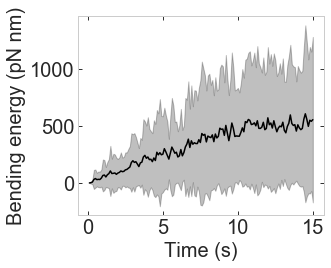

In [28]:
# plot direct bending energy

sum_bending_energy_direct_run_time = hip1r_bound_ends_attachment.pivot_table(index=['run', 'time'], values='bending_energy', fill_value=0, dropna = False, aggfunc='sum')
# mean std grouped by time

mean_bending_energy_direct_vs_time=sum_bending_energy_direct_run_time.groupby('time').mean().iloc[:,0]
std_bending_energy_direct_vs_time=sum_bending_energy_direct_run_time.groupby('time').std().iloc[:,0]

plt.figure(figsize=[5,4])

plot_multiple_errorbars(mean_bending_energy_direct_vs_time, std_bending_energy_direct_vs_time, 'black', 'Bending energy (pN nm)')   




time 1
time 2
time 3
time 4
time 5
time 6
time 7
time 8
time 9
time 10
time 11
time 12
time 13
time 14
time 15


<Figure size 432x288 with 0 Axes>

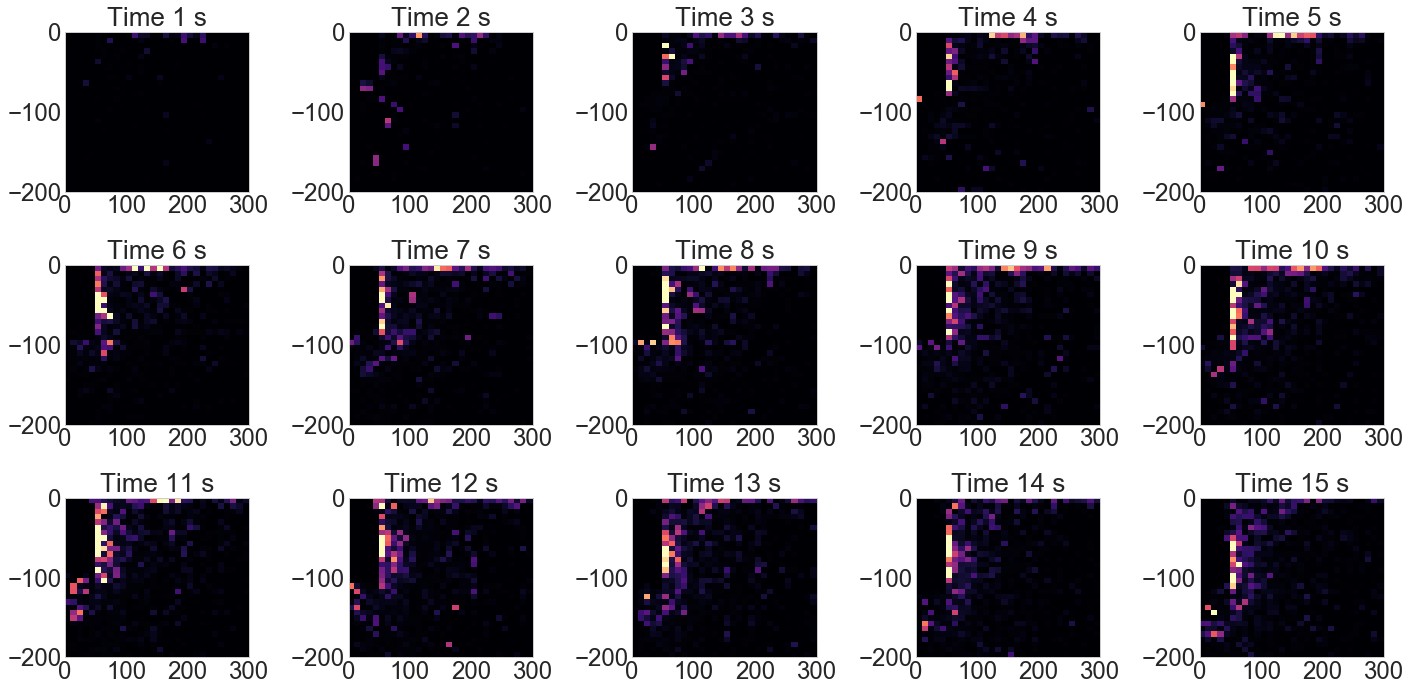

In [64]:
# over time

# versus R and Z
plt.set_cmap('magma')
# filter by length of free filament

free_length_threshold = 0.00

outside_bud = 'yes'

plt.figure(figsize=(20,10))

for i, timept in enumerate(range(1,16,1),start=1):

    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    
    ends_time = hip1r_bound_ends_attachment.loc[hip1r_bound_ends_attachment['length_to_plus_end']>free_length_threshold]
    
    ends_time = ends_time.reset_index()
    if outside_bud=='yes':
        in_bud_idx =ends_time.loc[ends_time['plus_rpos_recalibrated']<0.05].loc[ends_time['plus_zpos_recalibrated']>-0.05].loc[ends_time['plus_zpos_recalibrated']<0.05].index
        ends_time = ends_time.drop(in_bud_idx)
#         ends_time = ends_time.loc[in_bud_idx]


    branched_actin_bound_ends_no_index=ends_time.reset_index()

    branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

  # set position
    
    x = branched_actin_bound_ends_time.plus_rpos_recalibrated*1000

    y = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)
    
    color = branched_actin_bound_ends_time['bending_energy']

    bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, bins=30, statistic='sum', range = [[0,300],[-200,0]])
    bin_means = np.flipud(np.rot90(bin_means))

    bin_means = bin_means/len(runs)/len(times)
    
    plt.subplot(3, 5, i)
    plt.pcolormesh(xedges, yedges, bin_means)


    
#     cb = plt.colorbar(label = 'Bending energy (pN nm)')
    plt.title('Time ' + str(timept) + ' s', fontsize=26)
    plt.clim([0, 0.2])
#     plt.yticks([-90, -45, 0, 45, 90])
    
    plt.xticks(size=24)
    plt.yticks(size=24)
    
#     plt.xlim([0,100])
#     plt.ylim([-120, 0])

    plt.tight_layout()
    
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_bending_energy_direct_RZ.png')
    plt.savefig('../figures/'+pref+'_bending_energy_direct_RZr.pdf')
    


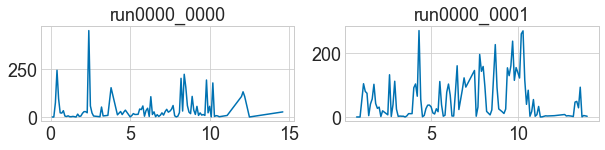

In [242]:
# just the filaments near the base

base_filaments = hip1r_bound_ends_attachment.loc[(hip1r_bound_ends_attachment['plus_zpos']+0.4)<0.0075]

# sum_bending_energy_run_time = base_filaments.pivot_table(index=['run', 'time'], values='bending_energy', fill_value=0, dropna = False, aggfunc='sum')
# mean std grouped by time
plt.figure(figsize=(10,50))
# show it come s out same
base_filaments = base_filaments.set_index(['run','time'])
for i, r in enumerate(runs):
    filaments_run = base_filaments.loc[r]
    mf = filaments_run.groupby('time').sum().bending_energy
    plt.subplot(24,2,i+1)
    plt.plot(mf)
    plt.title(str(r))

# mean_bending_energy_vs_time=sum_bending_energy_run_time.groupby('time').mean().iloc[:,0]
# std_bending_energy_vs_time=sum_bending_energy_run_time.groupby('time').std().iloc[:,0]

# plot_errorbar(mean_bending_energy_vs_time, std_bending_energy_vs_time, 'black', 'Bending energy (pN nm)')   

# plt.plot(mean_bending_energy_vs_time)

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_bending_energy_all_plots_direct_near_base.png')
    plt.savefig('../figures/'+pref+'_bending_energy_all_plots_direct_near_base.pdf')
                                                 
                                                 

In [21]:
# calculate internalization energy 1/2 kx^2 in pN nm

spring_constant = 0.15 #pN/ nm
solid_positions['internalization_energy'] = 0.5*spring_constant*solid_positions['internalization']*solid_positions['internalization']*1e6
solid_positions.tail()

xpos      ypos      zpos  internalization  \
run          time id                                                  
run0000_0066 14.6 1   0.011982  0.009765 -0.348711         0.051289   
             14.7 1   0.011156  0.008628 -0.349214         0.050786   
             14.8 1   0.010549  0.008755 -0.349863         0.050137   
             14.9 1   0.010441  0.009759 -0.351621         0.048379   
             15.0 1   0.011772  0.011247 -0.350494         0.049506   

                      internalization_energy  
run          time id                          
run0000_0066 14.6 1               197.292114  
             14.7 1               193.441335  
             14.8 1               188.528908  
             14.9 1               175.539573  
             15.0 1               183.813303

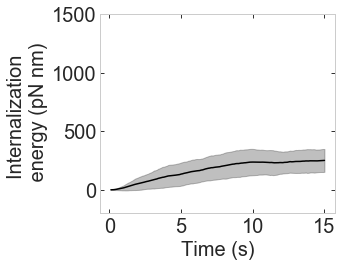

In [54]:
# sum_bending_energy_run_time.groupby('time').mean().iloc[:,0]

# this is only valid fi the spring constant doesn't change durig the simulation.

mean_intern_energy = solid_positions.groupby(level=['time']).mean().internalization_energy
std_intern_energy =  solid_positions.groupby(level=['time']).std().internalization_energy
plt.figure(figsize=[5,4])
plot_multiple_errorbars(mean_intern_energy, std_intern_energy, 'black', 'Internalization \n energy (pN nm)')
plt.xticks([0,5,10,15])
plt.ylim([-200, 1500])

plt.savefig('../figures/'+pref+'_internalization_energy_time.png')
plt.savefig('../figures/'+pref+'_internalization_energy_time.pdf')


In [112]:

# all plots: 

internalization_solid_positions.groupby(level=['time']).internalization_energy

actin_monomers_by_run_time = actin_points_by_run_time*10/2.75

actin_monomers_by_time_mean = pd.DataFrame(actin_monomers_by_run_time).groupby('time').count()

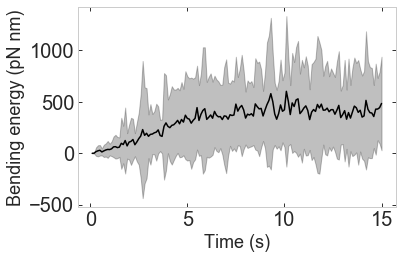

In [66]:
# plot
plot_errorbar(mean_bending_energy_vs_time, std_bending_energy_vs_time, 'black', 'Bending energy (pN nm)')   

if('save_figures'=='yes'):
    plt.savefig('../figures/'+pref+'_bending_energy_vs_time.png')
    plt.savefig('../figures/'+pref+'_bending_energy_vs_time.pdf')
    
plt.show()

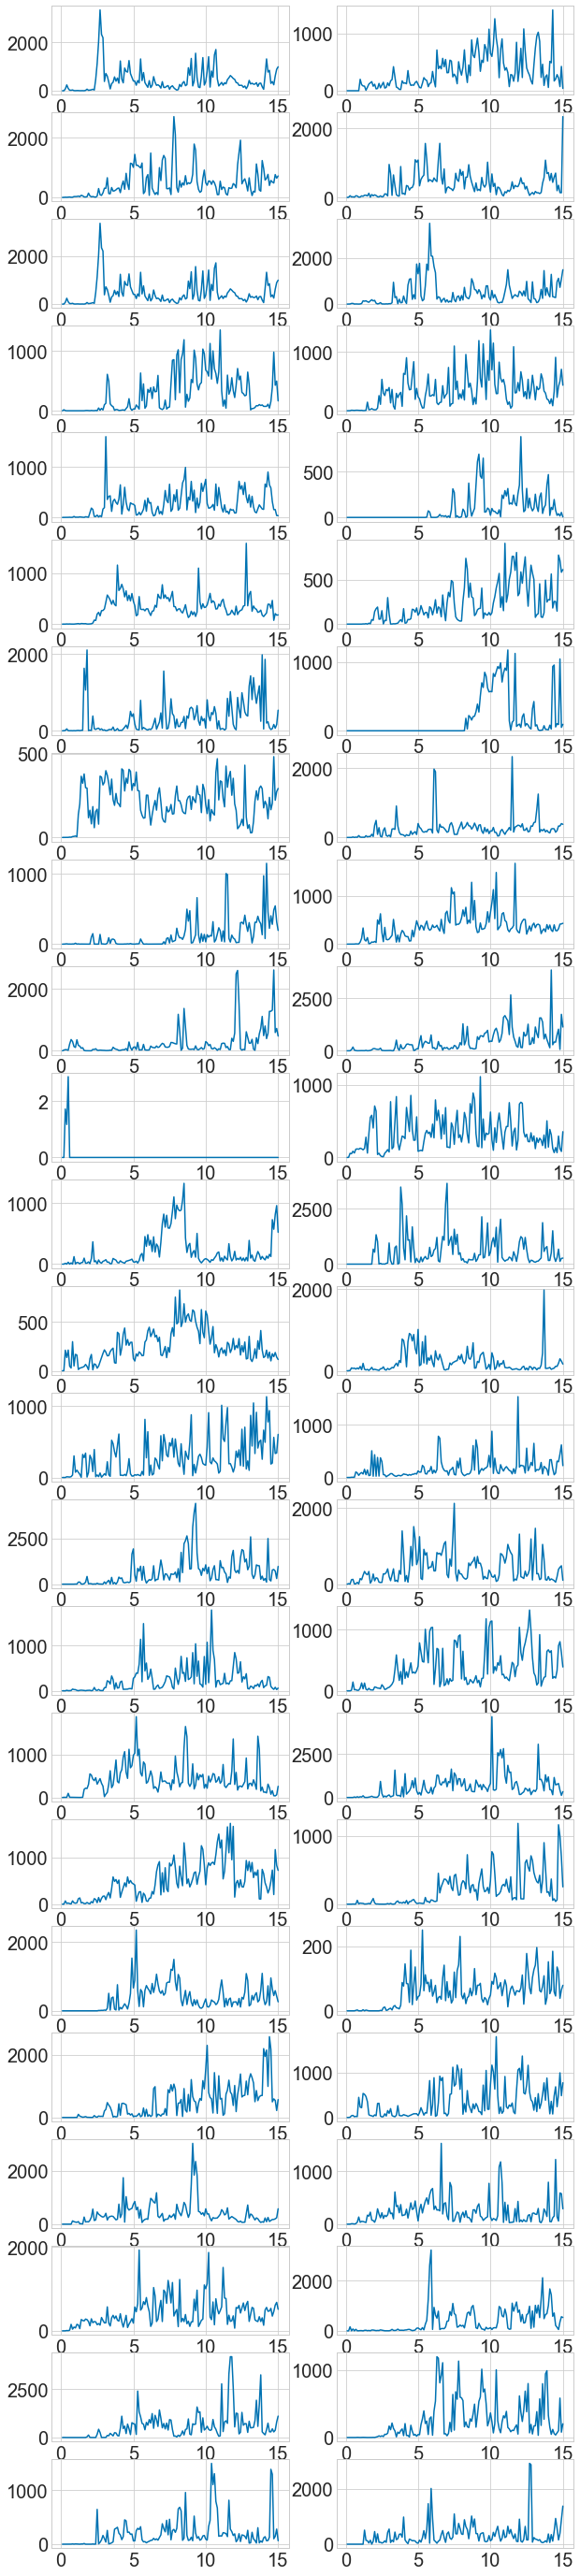

In [68]:
plt.figure(figsize=(10,50))
for i, runn in enumerate(runs):
    sum_bending_energy_time_one_run = sum_bending_energy_run_time.loc[runn]
    plt.subplot(24,2,i+1)
    plt.plot(sum_bending_energy_time_one_run.bending_energy)
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_bending_energy_all_plots_direct.png')
    plt.savefig('../figures/'+pref+'_bending_energy_all_plots_direct.pdf')
     
# plt.ylim(0, 300)

In [ ]:
# # code from max:
# x = all_fiber_forces.loc[run]['rpos']*1000
# y = (all_fiber_forces.loc[run]['zpos']+0.4)*-1000
# color = all_fiber_forces.loc[run].reset_index()['time']

# x = df['plus_rpos']*1000
# y = (df['plus_zpos']+0.4)*-1000
# color = df['growth']*10000

# denominator, xedges, yedges = np.histogram2d(x,y,bins=[200, 100])

# bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
#   bins=30, statistic='mean', range = [[0,500],[-500,0]])
# bin_means = np.flipud(np.rot90(bin_means))

# plt.pcolormesh(xedges, yedges, bin_means)

# hip1r_bound_ends_attachment['bending_energy']

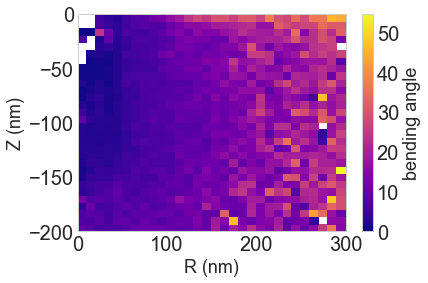

In [69]:
plt.set_cmap('plasma')

# versus R: sum bending energy in heat map
from scipy.stats import binned_statistic_2d

x = hip1r_bound_ends_attachment['plus_rpos_recalibrated']*1000
y = (hip1r_bound_ends_attachment['plus_zpos']+0.4)*(-1000)

color = hip1r_bound_ends_attachment['bending_angle_degrees']
# x = hip1r_bound_ends_attachment['bending_energy']

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
  bins=30, statistic='mean', range = [[0,300],[-200,0]])
bin_means = np.flipud(np.rot90(bin_means))

plt.pcolormesh(xedges, yedges, bin_means)

plt.colorbar(label='bending angle')
plt.xlabel('R (nm)')
plt.ylabel('Z (nm)')

plt.ylim([-200, 0])


plt.savefig('../figures/'+pref+'bending_angle_vs_RZ.pdf')

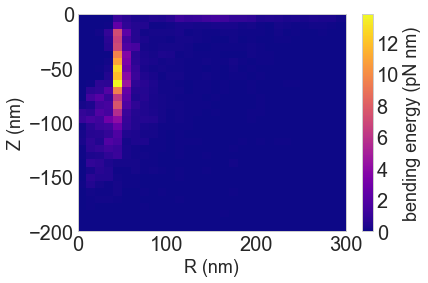

In [70]:
# versus R: sum bending energy in heat map
from scipy.stats import binned_statistic_2d

x = hip1r_bound_ends_attachment['plus_rpos_recalibrated']*1000
y = (hip1r_bound_ends_attachment['plus_zpos']+0.4)*(-1000)

color = hip1r_bound_ends_attachment['bending_energy']
# x = hip1r_bound_ends_attachment['bending_energy']

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
  bins=30, statistic='sum', range = [[0,300],[-200,0]])
bin_means = np.flipud(np.rot90(bin_means))

bin_means = bin_means/len(runs)/len(times)

plt.pcolormesh(xedges, yedges, bin_means)

plt.colorbar(label='bending energy (pN nm)')
plt.xlabel('R (nm)')
plt.ylabel('Z (nm)')

plt.ylim([-200,0])


plt.savefig('../figures/'+pref+'bending_energy_vs_RZ.pdf')

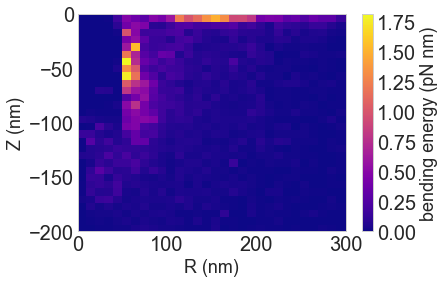

In [71]:
# versus R: sum bending energy in heat map
from scipy.stats import binned_statistic_2d

# choose plus ends not embedded in bud

outside_bud = 'yes'

ends_no_index = hip1r_bound_ends_attachment.reset_index()
if outside_bud=='yes':
#         ends_time = ends_time.loc[ends_time['plus_rpos_recalibrated'>0.03]].loc[(ends_time['plus_zpos_recalibrated']+0.04)]
    in_bud_idx =ends_no_index.loc[ends_no_index['plus_rpos_recalibrated']<0.055].loc[ends_no_index['plus_zpos_recalibrated']>-0.055].loc[ends_no_index['plus_zpos_recalibrated']<0.055].index
    ends_no_index = ends_no_index.drop(in_bud_idx)

x = ends_no_index['plus_rpos_recalibrated']*1000
y = (ends_no_index['plus_zpos']+0.4)*(-1000)

color = ends_no_index['bending_energy']
# x = hip1r_bound_ends_attachment['bending_energy']

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
  bins=30, statistic='sum', range = [[0,300],[-200,0]])
bin_means = np.flipud(np.rot90(bin_means))

bin_means = bin_means/len(runs)/len(times)

plt.pcolormesh(xedges, yedges, bin_means)

plt.colorbar(label='bending energy (pN nm)')
plt.xlabel('R (nm)')
plt.ylabel('Z (nm)')

plt.ylim([-200,0])


plt.savefig('../figures/'+pref+'bending_energy_vs_RZ_outside_bud_only.pdf')

In [ ]:
# only filaments with plus end outside bud (rel z and r>bud dimensions)

In [ ]:
# only filaments with lengh>5 subunits (13.75)

In [ ]:
# of capped filaments versus growing filaments.

In [25]:
# indirect attachment
# merge ends and final_hip1r, include indirect 

branched_actin_bound_ends_attachment = pd.merge(branched_actin_bound_ends,final_bound_hip1r, how='outer', on = ['run', 'time', 'fiber_id'])

branched_actin_bound_ends_attachment = branched_actin_bound_ends_attachment.drop(columns = ['bud_xpos_x',
                                                                                   'bud_ypos_x', 'bud_zpos_x', 'bud_internalization_x'])

branched_actin_bound_ends_attachment = branched_actin_bound_ends_attachment.rename(
    index=str, columns={'bud_xpos_y':'bud_xpos','bud_ypos_y':'bud_ypos',
                        'bud_zpos_y':'bud_zpos',
                        'bud_internalization_y':'bud_internalization'})

# filter ONLY the indirect bound filaments, which do not have hip1r info 

indirect_bound_ends_attachment = branched_actin_bound_ends_attachment.loc[branched_actin_bound_ends_attachment['attachment_zdir'].isna()]

# orientation plus end
x_dir_plus = indirect_bound_ends_attachment.plus_xdir
y_dir_plus = indirect_bound_ends_attachment.plus_ydir
z_dir_plus = indirect_bound_ends_attachment.plus_zdir

# length filament

filament_length = indirect_bound_ends_attachment.length

indirect_bound_ends_attachment['length_to_plus_end'] = filament_length 

# orientation MINUS END

x_dir_minus = indirect_bound_ends_attachment.minus_xdir
y_dir_minus = indirect_bound_ends_attachment.minus_ydir
z_dir_minus = indirect_bound_ends_attachment.minus_zdir


# formula is:

# length to plus end 
# dot product orientation attachment and plus end

# dot_product_minus_plus_end = np.multiply(x_dir_minus, x_dir_plus) + np.multiply(y_dir_minus,y_dir_plus) + np.multiply(z_dir_minus, z_dir_plus)

dot_product_minus_plus_end = [np.dot([x_dir_minus[i],y_dir_minus[i],z_dir_minus[i]] , [x_dir_plus[i],y_dir_plus[i],z_dir_plus[i]]) for i, vec in enumerate(x_dir_plus)]



# round dot product to 3 decimals to avoid rounding errors and values a tiny bit >1

bending_angle_radian = np.arccos(np.around(dot_product_minus_plus_end,3))

bending_angle_degrees = np.degrees(np.arccos(np.around(dot_product_minus_plus_end,3)))

indirect_bound_ends_attachment['bending_angle_degrees'] = bending_angle_degrees

kT = 0.00414 #pN um
Lp = 10 # um, calculate this from properties when it varies.

# calculate bending energy:
# Lp.*thetas.*thetas*kT/(2*s)
# convert to pN nm rather than pN um

bending_energy=kT*Lp*pow(bending_angle_radian,2)/(2*filament_length)*1000

indirect_bound_ends_attachment['bending_energy'] = bending_energy
indirect_bound_ends_attachment.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

run  time  fiber_id   length  minus_state  minus_xpos  \
15  run0000_0022   0.4        34  0.04611            0    -0.03308   
16  run0000_0022   0.4        35  0.01715            0     0.05696   
22  run0000_0022   0.5        34  0.04748            0    -0.03595   
23  run0000_0022   0.5        35  0.06711            0     0.05181   
31  run0000_0022   0.6        34  0.04748            0    -0.03683   

    minus_ypos  minus_zpos  minus_xdir  minus_ydir       ...        bud_xpos  \
15     0.03021    -0.36616    -0.13817     0.93257       ...             NaN   
16    -0.04011    -0.40008    -0.13353    -0.98389       ...             NaN   
22     0.02533    -0.36545    -0.77592    -0.61844       ...             NaN   
23    -0.05700    -0.40028    -0.00809     0.86342       ...             NaN   
31     0.02268    -0.35933    -0.83808     0.45596       ...             NaN   

    bud_ypos  bud_zpos  bud_internalization  hip1r_xpos_recalibrated  \
15       NaN       NaN                  NaN                      NaN   
16       NaN       NaN                  NaN                      NaN   
22       NaN       NaN                  NaN                      NaN   
23       NaN       NaN                  NaN                      NaN   
31       NaN       NaN                  NaN                      NaN   

    hip1r_ypos_recalibrated  hip1r_zpos_recalibrated  length_to_plus_end  \
15                      NaN                      NaN             0.04611   
16                      NaN                      NaN             0.01715   
22                      NaN                      NaN             0.04748   
23                      NaN                      NaN             0.06711   
31                      NaN                      NaN             0.04748   

    bending_angle_degrees  bending_energy  
15               0.000000        0.000000  
16               0.000000        0.000000  
22               2.562559        0.872091  
23               2.562559        0.617000  
31               0.000000        0.000000  

[5 rows x 53 columns]

In [26]:
# plot indirect bending energy

sum_bending_energy_indirect_run_time = indirect_bound_ends_attachment.pivot_table(index=['run', 'time'], values='bending_energy', fill_value=0, dropna = False, aggfunc='sum')
# mean std grouped by time

mean_bending_energy_indirect_vs_time=sum_bending_energy_indirect_run_time.groupby('time').mean().iloc[:,0]
std_bending_energy_indirect_vs_time=sum_bending_energy_indirect_run_time.groupby('time').std().iloc[:,0]

mean_bending_energy_indirect_vs_time



time
0.1       0.141556
0.2       0.296315
0.3       0.495817
0.4       0.224370
0.5       0.411991
0.6       0.605968
0.7       1.174207
0.8       1.590872
0.9       1.745153
1.0       2.791734
1.1       4.290288
1.2       4.851738
1.3       4.830447
1.4       6.660887
1.5       7.853602
1.6       9.231579
1.7      10.711408
1.8      12.101501
1.9      14.053988
2.0      15.317506
2.1      16.721960
2.2      19.836143
2.3      21.691229
2.4      23.947835
2.5      25.536178
2.6      25.451530
2.7      29.919277
2.8      29.599703
2.9      30.880122
3.0      33.960553
           ...    
12.1    176.181342
12.2    177.017580
12.3    179.066173
12.4    183.553128
12.5    184.278850
12.6    182.634472
12.7    202.725045
12.8    201.227304
12.9    215.859008
13.0    200.632974
13.1    206.738720
13.2    179.973206
13.3    180.875014
13.4    179.363991
13.5    183.462111
13.6    183.199408
13.7    185.400000
13.8    177.466648
13.9    193.140333
14.0    209.982928
14.1    213.841351
14.2   

In [25]:
#  bendin genergy of random filaments

# random_filament_ends

# branched_actin_bound_ends_attachment = pd.merge(branched_actin_bound_ends,final_bound_hip1r, how='outer', on = ['run', 'time', 'fiber_id'])

# branched_actin_bound_ends_attachment = branched_actin_bound_ends_attachment.drop(columns = ['bud_xpos_x',
#                                                                                    'bud_ypos_x', 'bud_zpos_x', 'bud_internalization_x'])

# branched_actin_bound_ends_attachment = branched_actin_bound_ends_attachment.rename(
#     index=str, columns={'bud_xpos_y':'bud_xpos','bud_ypos_y':'bud_ypos',
#                         'bud_zpos_y':'bud_zpos',
#                         'bud_internalization_y':'bud_internalization'})

# # filter ONLY the indirect bound filaments, which do not have hip1r info 

# indirect_bound_ends_attachment = branched_actin_bound_ends_attachment.loc[branched_actin_bound_ends_attachment['attachment_zdir'].isna()]

# orientation plus end
x_dir_plus = random_filament_ends.plus_xdir
y_dir_plus = random_filament_ends.plus_ydir
z_dir_plus = random_filament_ends.plus_zdir

# length filament

filament_length = random_filament_ends.length

random_filament_ends['length_to_plus_end'] = filament_length 

# orientation MINUS END

x_dir_minus = random_filament_ends.minus_xdir
y_dir_minus = random_filament_ends.minus_ydir
z_dir_minus = random_filament_ends.minus_zdir


# formula is:

# length to plus end 
# dot product orientation attachment and plus end

# dot_product_minus_plus_end = np.multiply(x_dir_minus, x_dir_plus) + np.multiply(y_dir_minus,y_dir_plus) + np.multiply(z_dir_minus, z_dir_plus)

dot_product_minus_plus_end = [np.dot([x_dir_minus[i],y_dir_minus[i],z_dir_minus[i]] , [x_dir_plus[i],y_dir_plus[i],z_dir_plus[i]]) for i, vec in enumerate(x_dir_plus)]



# round dot product to 3 decimals to avoid rounding errors and values a tiny bit >1

bending_angle_radian = np.arccos(np.around(dot_product_minus_plus_end,3))

bending_angle_degrees = np.degrees(np.arccos(np.around(dot_product_minus_plus_end,3)))

random_filament_ends['bending_angle_degrees'] = bending_angle_degrees

kT = 0.00414 #pN um
Lp = 10 # um, calculate this from properties when it varies.

# calculate bending energy:
# Lp.*thetas.*thetas*kT/(2*s)
# convert to pN nm rather than pN um

bending_energy=kT*Lp*pow(bending_angle_radian,2)/(2*filament_length)*1000

random_filament_ends['bending_energy'] = bending_energy
random_filament_ends.head()



fiber_id  length  minus_state  minus_xpos  minus_ypos  \
run          time id                                                          
run0000_0000 0.1  1          1   0.075            0    -0.18971    -0.11011   
                  2          2   0.075            0    -0.29927     0.36893   
                  3          3   0.100            0     0.28693    -0.10891   
                  4          4   0.100            0     0.31724    -0.50611   
                  5          5   0.100            0    -0.45411    -0.03982   

                      minus_zpos  minus_xdir  minus_ydir  minus_zdir  \
run          time id                                                   
run0000_0000 0.1  1     -0.13498    -0.64324    -0.45879    -0.61299   
                  2      0.39196     0.23084    -0.63364     0.73838   
                  3      0.46793     0.95678     0.15013     0.24908   
                  4      0.00590    -0.86833     0.05646     0.49276   
                  5     -0.14575     0.89751     0.19695     0.39457   

                      plus_state  plus_xpos  plus_ypos  plus_zpos  plus_xdir  \
run          time id                                                           
run0000_0000 0.1  1            4   -0.23793   -0.14455   -0.18095   -0.64246   
                  2            4   -0.28202    0.32143    0.44738    0.22920   
                  3            1    0.38262   -0.09400    0.49285    0.95738   
                  4            4    0.23038   -0.50059    0.05512   -0.86790   
                  5            1   -0.36435   -0.02035   -0.10619    0.89740   

                      plus_ydir  plus_zdir  plus_rpos  length_to_plus_end  \
run          time id                                                        
run0000_0000 0.1  1    -0.45937   -0.61337   0.278398               0.075   
                  2    -0.63303    0.73942   0.427613               0.075   
                  3     0.14788    0.24813   0.393998               0.100   
                  4     0.05648    0.49351   0.551058               0.100   
                  5     0.19250    0.39702   0.364918               0.100   

                      bending_angle_degrees  bending_energy  
run          time id                                         
run0000_0000 0.1  1                     0.0             0.0  
                  2                     0.0             0.0  
                  3                     0.0             0.0  
                  4                     0.0             0.0  
                  5                     0.0             0.0

In [26]:

sum_bending_energy_random_run_time = random_filament_ends.pivot_table(index=['run', 'time'], values='bending_energy', aggfunc='sum')
# mean std grouped by time

mean_bending_energy_random_vs_time=sum_bending_energy_random_run_time.groupby('time').mean().iloc[:,0]
std_bending_energy_random_vs_time=sum_bending_energy_random_run_time.groupby('time').std().iloc[:,0]

mean_bending_energy_random_vs_time



time
0.1     0.000000
0.2     1.104184
0.3     0.414069
0.4     1.053576
0.5     2.007532
0.6     2.350653
0.7     2.762736
0.8     3.672331
0.9     2.611970
1.0     3.135870
1.1     2.581313
1.2     2.272433
1.3     2.103536
1.4     2.708312
1.5     1.576783
1.6     4.474454
1.7     2.973219
1.8     5.412715
1.9     4.916761
2.0     2.341963
2.1     3.311520
2.2     4.718456
2.3     4.473415
2.4     3.686693
2.5     5.084717
2.6     2.441052
2.7     2.573579
2.8     1.751704
2.9     5.157762
3.0     1.630903
          ...   
12.1    4.537743
12.2    4.457746
12.3    2.756888
12.4    2.747141
12.5    2.952693
12.6    5.132993
12.7    3.964447
12.8    1.996387
12.9    3.051311
13.0    4.742034
13.1    2.285658
13.2    3.192971
13.3    5.084830
13.4    0.643818
13.5    5.568402
13.6    6.169009
13.7    1.971174
13.8    3.134345
13.9    2.631847
14.0    3.926804
14.1    2.339997
14.2    4.275939
14.3    2.669672
14.4    1.334083
14.5    2.097661
14.6    2.414123
14.7    3.166482
14.8    3

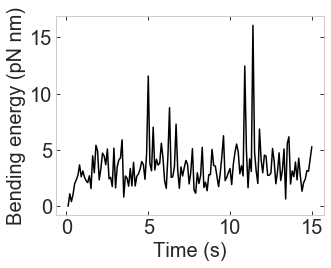

In [27]:
plt.figure(figsize=[5,4])
plot_multiple_errorbars(mean_bending_energy_random_vs_time, std_bending_energy_random_vs_time, 'black', 'Bending energy (pN nm)')
# plot_multiple_errorbars(mean_bending_energy_direct_vs_time, std_bending_energy_direct_vs_time, 'green', 'Bending energy (pN nm)')

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_bending_energy_random.png')
    plt.savefig('../figures/'+pref+'_bending_energy_random.pdf')
    



# plot total bending energy vs random filament bending energy overlaid. 

3.5131685296161663 ± 2.0168524729365047


0.2866666666666667

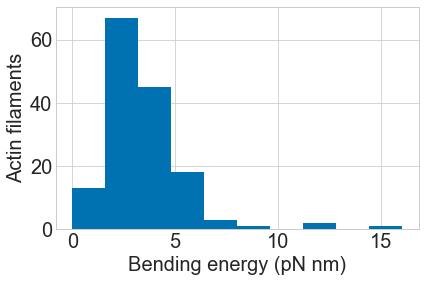

In [34]:
plt.hist(sum_bending_energy_random_run_time.bending_energy)
plt.tight_layout()
plt.xlabel('Bending energy (pN nm)')
plt.ylabel('Actin filaments')

print(str(np.mean(sum_bending_energy_random_run_time.bending_energy))+' ± '+str(np.std(sum_bending_energy_random_run_time.bending_energy)))

np.sum(sum_bending_energy_random_run_time.bending_energy>4.114)/len(sum_bending_energy_random_run_time.bending_energy)




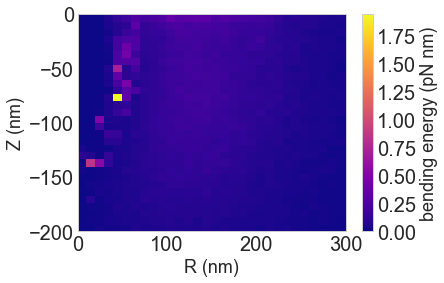

In [74]:
# versus R: sum bending energy in heat map
from scipy.stats import binned_statistic_2d

x = indirect_bound_ends_attachment['plus_rpos_recalibrated']*1000
y = (indirect_bound_ends_attachment['plus_zpos']+0.4)*(-1000)

color = indirect_bound_ends_attachment['bending_energy']
# x = hip1r_bound_ends_attachment['bending_energy']

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
  bins=30, statistic='sum', range = [[0,300],[-200,0]])
bin_means = np.flipud(np.rot90(bin_means))

bin_means = bin_means/len(runs)/len(times)

plt.pcolormesh(xedges, yedges, bin_means)

plt.colorbar(label='bending energy (pN nm)')
plt.xlabel('R (nm)')
plt.ylabel('Z (nm)')

plt.ylim([-200,0])


plt.savefig('../figures/'+pref+'bending_energy_indirect_vs_RZ.pdf')

time 1
time 2
time 3
time 4
time 5
time 6
time 7
time 8
time 9
time 10
time 11
time 12
time 13
time 14
time 15


<Figure size 432x288 with 0 Axes>

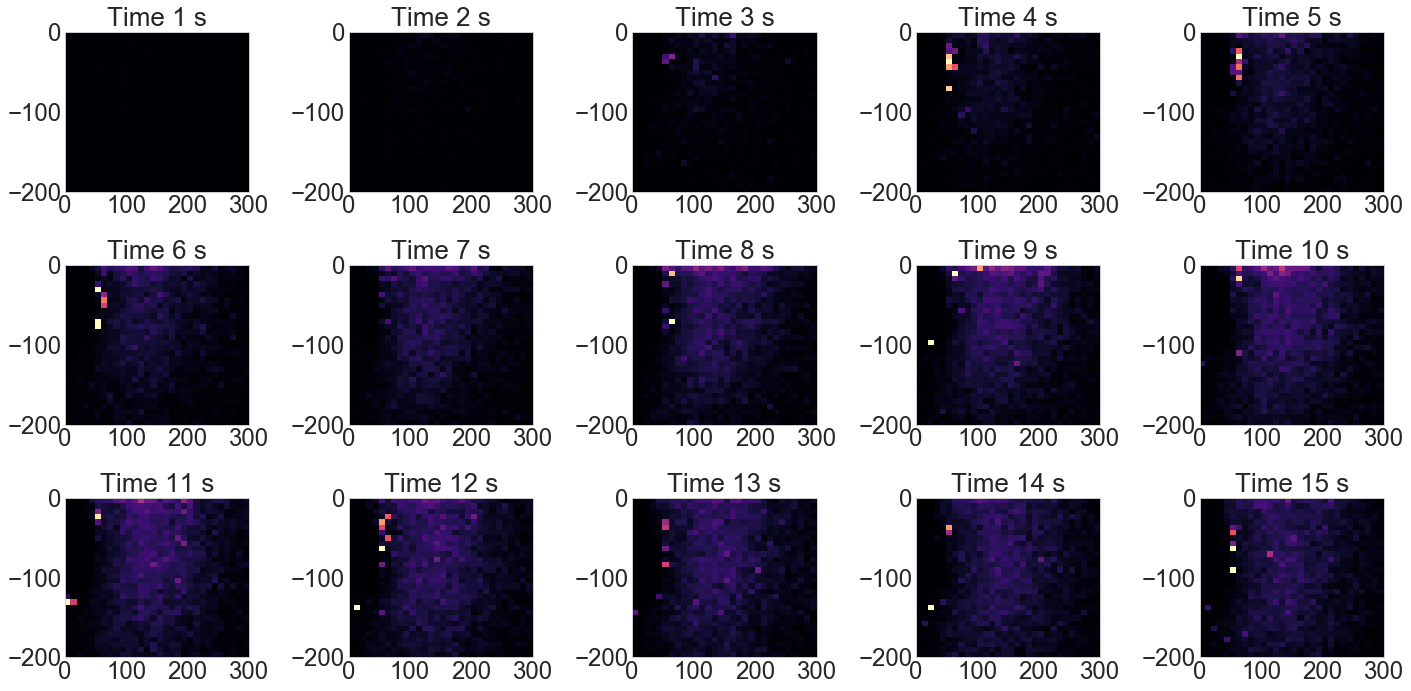

In [75]:
# over time

# versus R and Z
plt.set_cmap('magma')
# filter by length of free filament

free_length_threshold = 0.0

outside_bud = 'yes'

plt.figure(figsize=(20,10))

for i, timept in enumerate(range(1,16,1),start=1):

    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    
    ends_time = indirect_bound_ends_attachment.loc[indirect_bound_ends_attachment['length_to_plus_end']>free_length_threshold]
    
    ends_time = ends_time.reset_index()
    if outside_bud=='yes':
        in_bud_idx =ends_time.loc[ends_time['plus_rpos_recalibrated']<0.05].loc[ends_time['plus_zpos_recalibrated']>-0.05].loc[ends_time['plus_zpos_recalibrated']<0.05].index
        ends_time = ends_time.drop(in_bud_idx)
    branched_actin_bound_ends_no_index=ends_time.reset_index()

    branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

  # set position
    
    x = branched_actin_bound_ends_time.plus_rpos_recalibrated*1000

    y = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)
    
    color = branched_actin_bound_ends_time['bending_energy']

    bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, bins=30, statistic='sum', range = [[0,300],[-200,0]])
    bin_means = np.flipud(np.rot90(bin_means))

    bin_means = bin_means/len(runs)/len(times)
    
    plt.subplot(3, 5, i)
    plt.pcolormesh(xedges, yedges, bin_means)


    
#     cb = plt.colorbar(label = 'Bending energy (pN nm)')
    plt.title('Time ' + str(timept) + ' s', fontsize=26)
    plt.clim([0, 0.1])
#     plt.yticks([-90, -45, 0, 45, 90])
    
    plt.xticks(size=24)
    plt.yticks(size=24)
    
#     plt.xlim([0,80])
#     plt.ylim([-80, 0])

    plt.tight_layout()
    
    
# if save_figures == 'yes': 
#     plt.savefig('../figures/'+pref+'radial_orientation_time_vs_r_subplots_relative_colorbar.png')
#     plt.savefig('../figures/'+pref+'radial_orientation_time_vs_r_subplots_relative_colorbar.pdf')
    


In [35]:
#  plot direct bound and indirectly bound bending energy overlaid

plt.figure(figsize=[5,4])
plot_multiple_errorbars(mean_bending_energy_indirect_vs_time, std_bending_energy_indirect_vs_time, 'blue', 'Bending energy (pN nm)')
plot_multiple_errorbars(mean_bending_energy_direct_vs_time, std_bending_energy_direct_vs_time, 'green', 'Bending energy (pN nm)')
plot_multiple_errorbars(mean_bending_energy_random_5vs_time, std_bending_energy_random_vs_time, 'black', 'Bending energy (pN nm)')


if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_bending_energy_direct_indirect_random.png')
    plt.savefig('../figures/'+pref+'_bending_energy_direct_indirect_random.pdf')
    



NameError: name 'mean_bending_energy_indirect_vs_time' is not defined

<Figure size 360x288 with 0 Axes>

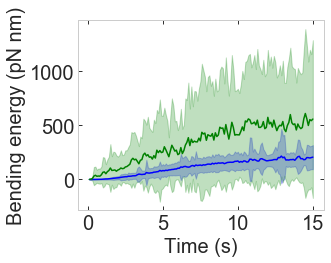

In [30]:
#  plot direct bound and indirectly bound bending energy overlaid

plt.figure(figsize=[5,4])
plot_multiple_errorbars(mean_bending_energy_indirect_vs_time, std_bending_energy_indirect_vs_time, 'blue', 'Bending energy (pN nm)')
plot_multiple_errorbars(mean_bending_energy_direct_vs_time, std_bending_energy_direct_vs_time, 'green', 'Bending energy (pN nm)')

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_bending_energy_direct_indirect.png')
    plt.savefig('../figures/'+pref+'_bending_energy_direct_indirect.pdf')
    



In [31]:
# combine direct and indirect filaments: sort by run and time and then set those as heirarchical index

branched_actin_bound_ends_bending = hip1r_bound_ends_attachment.append(indirect_bound_ends_attachment,ignore_index=True).sort_values(by=['run', 'time']).set_index(['run','time'])


branched_actin_bound_ends_bending.head()

fiber_id   length  minus_state  minus_xpos  minus_ypos  \
run          time                                                           
run0000_0000 0.1          1  0.02585            0    -0.04225     0.01758   
             0.2          1  0.02585            0    -0.03324    -0.00333   
             0.3          1  0.02585            0    -0.03148    -0.00292   
             0.4          1  0.02585            0    -0.03873    -0.00609   
             0.4         20  0.12820            0     0.08104    -0.01943   

                   minus_zpos  minus_xdir  minus_ydir  minus_zdir  plus_state  \
run          time                                                               
run0000_0000 0.1     -0.39226     0.33812    -0.37568     0.86286           4   
             0.2     -0.36486    -0.14810     0.85441    -0.49805           4   
             0.3     -0.36596    -0.42791     0.74195    -0.51614           4   
             0.4     -0.36854     0.03436     0.98688    -0.15778           4   
             0.4     -0.31659    -0.92047     0.23968    -0.30868           1   

                        ...        bud_xpos  bud_ypos  bud_zpos  \
run          time       ...                                       
run0000_0000 0.1        ...        0.002286  0.000970 -0.397968   
             0.2        ...        0.001953  0.004033 -0.396735   
             0.3        ...        0.001733  0.004176 -0.395906   
             0.4        ...        0.000106  0.003303 -0.393563   
             0.4        ...        0.000106  0.003303 -0.393563   

                   bud_internalization  hip1r_xpos_recalibrated  \
run          time                                                 
run0000_0000 0.1              0.002032                -0.037981   
             0.2              0.003265                -0.037981   
             0.3              0.004094                -0.035415   
             0.4              0.006437                -0.035415   
             0.4              0.006437                -0.016555   

                   hip1r_ypos_recalibrated  hip1r_zpos_recalibrated  \
run          time                                                     
run0000_0000 0.1                  0.009311                 0.022266   
             0.2                  0.009311                 0.022266   
             0.3                  0.015741                 0.022870   
             0.4                  0.015741                 0.022870   
             0.4                 -0.002328                 0.041779   

                   length_to_plus_end  bending_angle_degrees  bending_energy  
run          time                                                             
run0000_0000 0.1             0.006619                    0.0             0.0  
             0.2             0.006619                    0.0             0.0  
             0.3             0.001532                    0.0             0.0  
             0.4             0.001532                    0.0             0.0  
             0.4             0.022609                    0.0             0.0  

[5 rows x 51 columns]

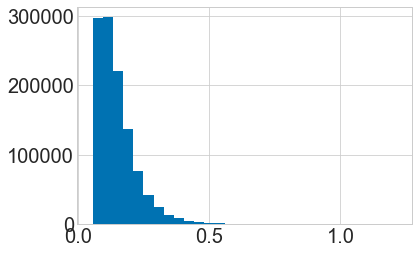

In [32]:
branched_actin_bound_ends_bending['plus_r_recalibrated_3D']=np.sqrt(pow(branched_actin_bound_ends_bending['plus_xpos_recalibrated'],2) +
                                                                   pow(branched_actin_bound_ends_bending['plus_ypos_recalibrated'],2) +
                                                                   pow(branched_actin_bound_ends_bending['plus_zpos_recalibrated'],2))

dists_3d = branched_actin_bound_ends_bending['plus_r_recalibrated_3D'].loc[branched_actin_bound_ends_bending['plus_r_recalibrated_3D']>0.055]

plt.hist(dists_3d,30)
plt.show()

In [33]:
sum_bending_energy_run_time = branched_actin_bound_ends_bending.pivot_table(index=['run', 'time'], values='bending_energy', fill_value=0, dropna = False, aggfunc='sum')
# mean std grouped by time

mean_bending_energy_vs_time=sum_bending_energy_run_time.groupby('time').mean().iloc[:,0]
std_bending_energy_vs_time=sum_bending_energy_run_time.groupby('time').std().iloc[:,0]

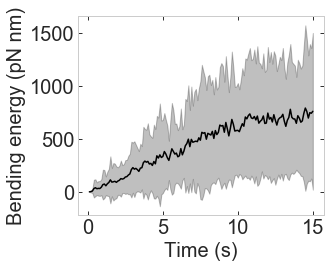

In [35]:
plt.figure(figsize=[5,4])

plot_multiple_errorbars(mean_bending_energy_vs_time, std_bending_energy_vs_time, 'black', 'Bending energy (pN nm)')


plt.savefig('../figures/'+pref+'_total_bending_energy.png')
plt.savefig('../figures/'+pref+'_total_bending_energy.pdf')

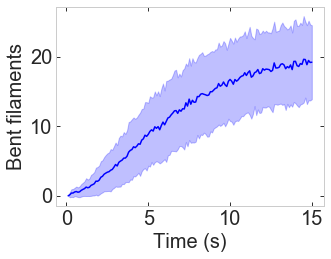

In [223]:
# fraction of filaments with significant bending energy.

kT = 4.114 # pN nm

# use pivot table to identify number of columns in the ends dataframe. other runs, timepoints will be 0



branched_actin_bound_ends_bending['over_kT']=branched_actin_bound_ends_bending['bending_energy']>kT

data_frame_time_count = branched_actin_bound_ends_bending.pivot_table(index=['run', 'time'], values='over_kT',  aggfunc='sum')
# .groupby(['run', 'time']).count()

data_frame_time_count_mean = data_frame_time_count.groupby('time').mean().over_kT
data_frame_time_count_std  = data_frame_time_count.groupby('time').std().over_kT

plt.figure(figsize=[5,4])
plot_multiple_errorbars(data_frame_time_count_mean,data_frame_time_count_std, 'blue', 'Bent filaments')

plt.savefig('../figures/'+pref+'_bent_filaments_time.png')
plt.savefig('../figures/'+pref+'_bent_filaments_time.pdf')


# data_frame_time_count_std


time
0.1     0.000000
0.2     0.292027
0.3     0.309864
0.4     0.230822
0.5     0.244957
0.6     0.190001
0.7     0.149323
0.8     0.139168
0.9     0.120794
1.0     0.125711
1.1     0.118188
1.2     0.120285
1.3     0.123020
1.4     0.115303
1.5     0.102942
1.6     0.089262
1.7     0.096335
1.8     0.100717
1.9     0.090869
2.0     0.096326
2.1     0.085565
2.2     0.087035
2.3     0.089936
2.4     0.077022
2.5     0.078649
2.6     0.078550
2.7     0.076958
2.8     0.070524
2.9     0.060239
3.0     0.064507
          ...   
12.1    0.030614
12.2    0.029632
12.3    0.027360
12.4    0.028860
12.5    0.030375
12.6    0.031826
12.7    0.032198
12.8    0.029593
12.9    0.033724
13.0    0.030318
13.1    0.030574
13.2    0.031411
13.3    0.031572
13.4    0.031867
13.5    0.030520
13.6    0.029422
13.7    0.029437
13.8    0.027937
13.9    0.029221
14.0    0.033556
14.1    0.030725
14.2    0.032558
14.3    0.032571
14.4    0.030445
14.5    0.034074
14.6    0.029752
14.7    0.032186
14.8    0

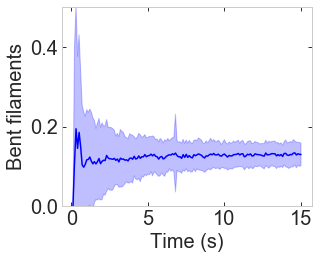

In [235]:
data_frame_time_count_all = branched_actin_bound_ends_bending.pivot_table(index=['run', 'time'], values='plus_xpos',  aggfunc='count')
fraction_bent = data_frame_time_count.over_kT/data_frame_time_count_all.plus_xpos

fraction_bent_mean = fraction_bent.groupby('time').mean()
fraction_bent_std  = fraction_bent.groupby('time').std()

plt.figure(figsize=[5,4])
plot_multiple_errorbars(fraction_bent_mean,fraction_bent_std, 'blue', 'Bent filaments')

plt.ylim([0, 0.5])

plt.savefig('../figures/'+pref+'_bent_filaments_fraction_time.png')
plt.savefig('../figures/'+pref+'_bent_filaments_fraction_time.pdf')

print(fraction_bent_std)



0.07281761136809231

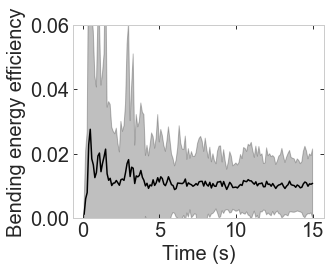

In [36]:
# as fraction of polymerization energy over time

pE = pd.DataFrame(actin_monomers_by_run_time*workPerBinding).fiber_point
bE = branched_actin_bound_ends_bending.bending_energy

bending_energy_efficiency = sum_bending_energy_run_time.bending_energy/pE

# bending_energy_efficiency = bE.bending_energy.div(pE.fiber_point, axis=0)
bending_energy_efficiency_by_time_mean = bending_energy_efficiency.groupby(level=['time']).mean()
bending_energy_efficiency_by_time_std  = bending_energy_efficiency.groupby(level=['time']).std()

plt.figure(figsize=[5,4])
plot_multiple_errorbars(bending_energy_efficiency_by_time_mean, bending_energy_efficiency_by_time_std, 'black','Bending energy efficiency')

plt.ylim([0, 0.06])
# 

plt.savefig('../figures/'+pref+'_bending_energy_efficiency_time.png')
plt.savefig('../figures/'+pref+'_bending_energy_efficiency_time.pdf')


# branched_actin_bound_ends_bending



# plot bending and internalization energy efficiency overlaid. 

In [ ]:
# capped vs growing

In [50]:
sum_bending_energy_capped_run_time = branched_actin_bound_ends_bending.loc[branched_actin_bound_ends_bending['plus_state']==4].pivot_table(index=['run', 'time'], values='bending_energy', fill_value=0, dropna = False, aggfunc='sum')
sum_bending_energy_growing_run_time = branched_actin_bound_ends_bending.loc[branched_actin_bound_ends_bending['plus_state']==1].pivot_table(index=['run', 'time'], values='bending_energy', fill_value=0, dropna = False, aggfunc='sum')



# mean std grouped by time

mean_bending_energy_capped_vs_time=sum_bending_energy_capped_run_time.groupby('time').mean().iloc[:,0]
std_bending_energy_capped_vs_time=sum_bending_energy_capped_run_time.groupby('time').std().iloc[:,0]


mean_bending_energy_growing_vs_time=sum_bending_energy_growing_run_time.groupby('time').mean().iloc[:,0]
std_bending_energy_growing_vs_time=sum_bending_energy_growing_run_time.groupby('time').std().iloc[:,0]


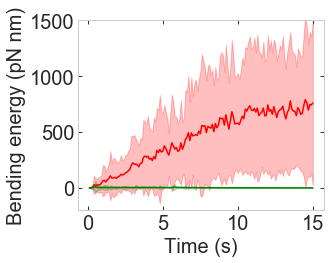

In [51]:
plt.figure(figsize=[5,4])

plot_multiple_errorbars(mean_bending_energy_capped_vs_time, std_bending_energy_capped_vs_time, 'red', 'Bending energy (pN nm)')
plot_multiple_errorbars(mean_bending_energy_growing_vs_time, std_bending_energy_growing_vs_time, 'green', 'Bending energy (pN nm)')

plt.ylim([-200, 1500])
plt.xticks([0,5,10,15])

plt.savefig('../figures/'+pref+'_bending_energy_capped_growing.png')
plt.savefig('../figures/'+pref+'_bending_energy_capped_growing.pdf')



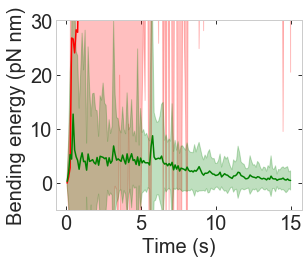

In [53]:
# zoom y

plt.figure(figsize=[5,4])

plot_multiple_errorbars(mean_bending_energy_capped_vs_time, std_bending_energy_capped_vs_time, 'red', 'Bending energy (pN nm)')
plot_multiple_errorbars(mean_bending_energy_growing_vs_time, std_bending_energy_growing_vs_time, 'green', 'Bending energy (pN nm)')


plt.xticks([0,5,10,15])
plt.ylim([-5,30])

plt.savefig('../figures/'+pref+'_bending_energy_capped_growing_zoomY.png')
plt.savefig('../figures/'+pref+'_bending_energy_capped_growing_zoomY.pdf')




NameError: name 'mean_intern_energy' is not defined

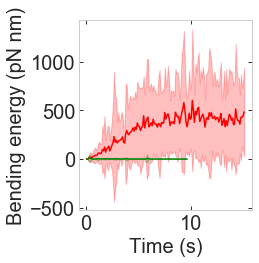

In [25]:
#  with internalization energy overlaid 

plt.figure(figsize=[4,4])

plot_multiple_errorbars(mean_bending_energy_capped_vs_time, std_bending_energy_capped_vs_time, 'red', 'Bending energy (pN nm)')
plot_multiple_errorbars(mean_bending_energy_growing_vs_time, std_bending_energy_growing_vs_time, 'green', 'Bending energy (pN nm)')
plot_multiple_errorbars(mean_intern_energy, std_intern_energy, 'blue', 'Energy (pN nm)')



plt.xticks([0,5,10,15])


plt.savefig('../figures/'+pref+'_bending_internalization_energy_time.png')
plt.savefig('../figures/'+pref+'_bending_internalization_energy_time.pdf')





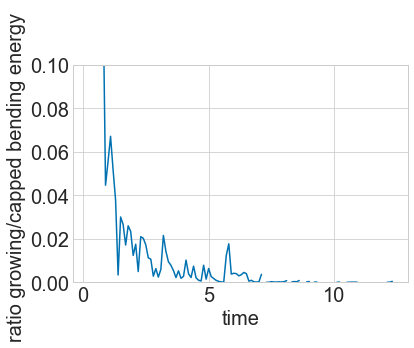

In [218]:
# ratio

ratio_capped_growing_bending_energy = mean_bending_energy_capped_vs_time / mean_bending_energy_growing_vs_time

ratio_growing_capped_bending_energy = mean_bending_energy_growing_vs_time / mean_bending_energy_capped_vs_time



plt.plot(ratio_growing_capped_bending_energy)

plt.ylabel('ratio growing/capped bending energy ')
plt.xlabel('time')

plt.ylim([0,0.1])

plt.savefig('../figures/'+pref+'_ratio_bending_energy_gowing_capped_time_zoom.png')
plt.savefig('../figures/'+pref+'_ratio_bending_energy_gowing_capped_time_zoom.pdf')




In [190]:
# plot direct + indirect bending energy

sum_bending_energy_run_time = branched_actin_bound_ends_bending.pivot_table(index=['run', 'time'], values='bending_energy', fill_value=0, dropna = False, aggfunc='sum')
# mean std grouped by time

mean_bending_energy_vs_time=sum_bending_energy_run_time.groupby('time').mean().iloc[:,0]
std_bending_energy_vs_time=sum_bending_energy_run_time.groupby('time').std().iloc[:,0]

mean_bending_energy_vs_time

time
0.1       0.356229
0.2       3.220696
0.3       8.116218
0.4      31.216293
0.5      39.337832
0.6      30.163261
0.7      33.162026
0.8      32.025320
0.9      44.911424
1.0      69.077704
1.1      74.194913
1.2      57.885974
1.3      77.042989
1.4      89.095326
1.5     113.853686
1.6      92.414586
1.7      95.665240
1.8     100.251241
1.9      90.232646
2.0     102.431670
2.1     109.726941
2.2     125.582518
2.3     121.019040
2.4     126.191343
2.5     140.757364
2.6     144.349246
2.7     159.404281
2.8     169.818929
2.9     210.749583
3.0     229.406495
           ...    
12.1    687.978260
12.2    703.615485
12.3    661.015259
12.4    729.815244
12.5    678.098773
12.6    631.769588
12.7    684.695287
12.8    700.172515
12.9    708.488829
13.0    733.674097
13.1    668.248385
13.2    619.930286
13.3    676.712894
13.4    703.875754
13.5    780.888190
13.6    705.435673
13.7    690.275898
13.8    689.177321
13.9    648.400049
14.0    720.240264
14.1    696.866517
14.2   

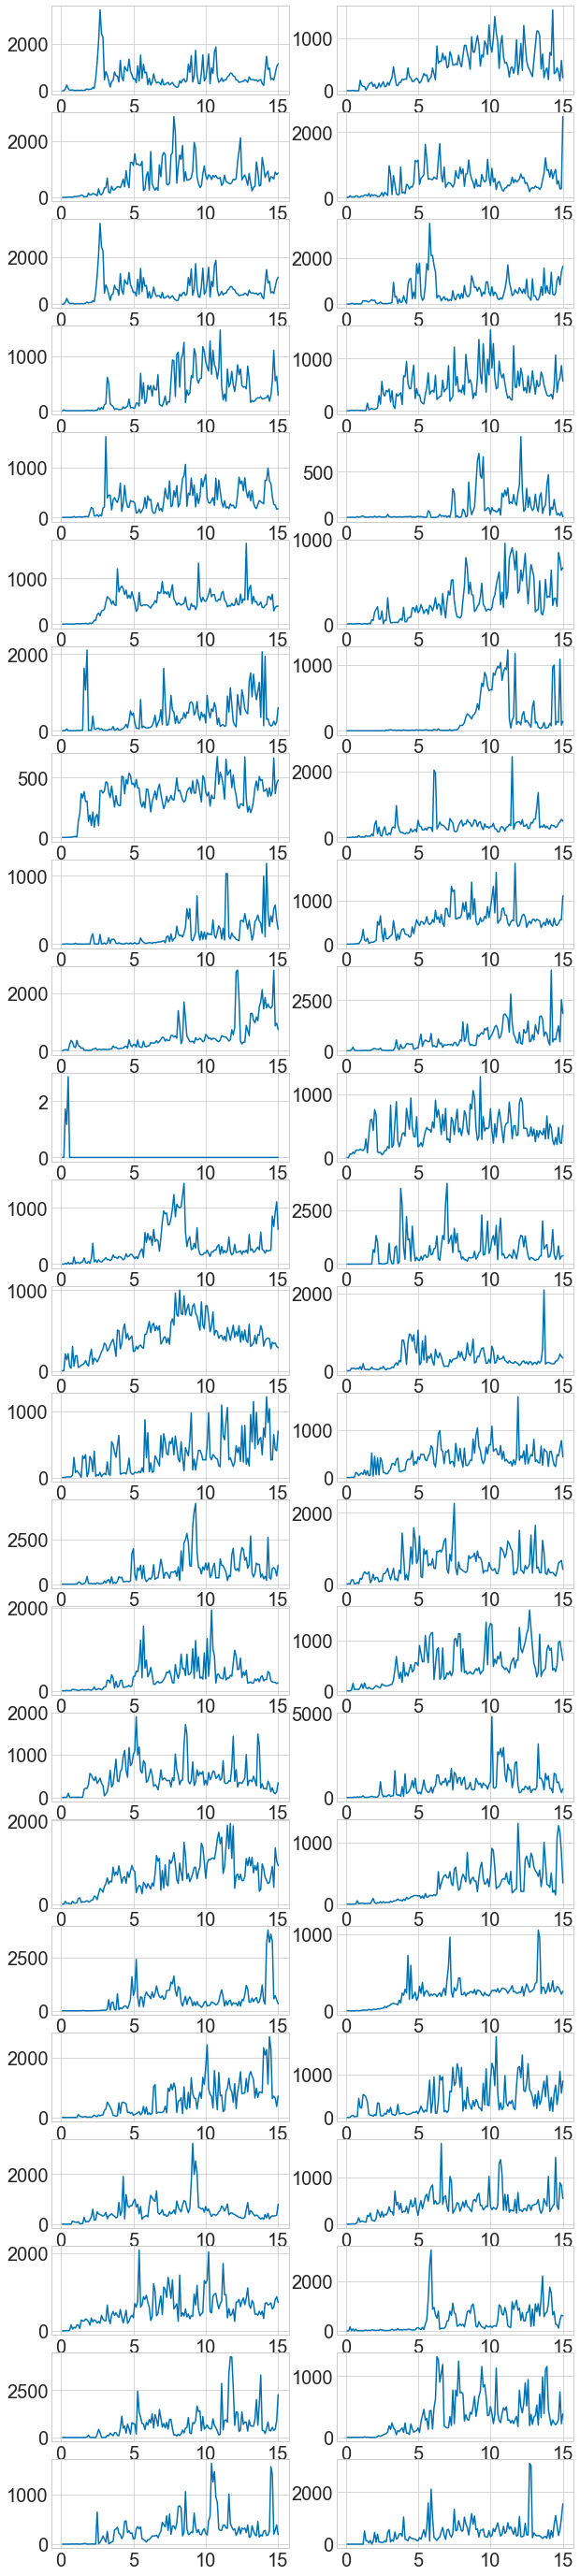

In [80]:
plt.figure(figsize=(10,50))
for i, runn in enumerate(runs):
    sum_bending_energy_time_one_run = sum_bending_energy_run_time.loc[runn]
    plt.subplot(24,2,i+1)
    plt.plot(sum_bending_energy_time_one_run.bending_energy)
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_bending_energy_all_plots_clusters.png')
    plt.savefig('../figures/'+pref+'_bending_energy_all_plots_clusters.pdf')
     
# plt.ylim(0, 300)

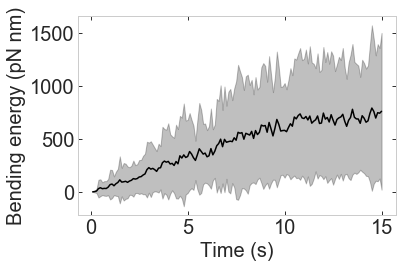

In [221]:
# plot
plot_errorbar(mean_bending_energy_vs_time, std_bending_energy_vs_time, 'black', 'Bending energy (pN nm)')   

if('save_figures'=='yes'):
    plt.savefig('../figures/'+pref+'_bending_energy_direct_indirect_vs_time.png')
    plt.savefig('../figures/'+pref+'_bending_energy_direct_indirect_vs_time.pdf')

In [43]:
#  use pivot table to try to sum bending energy
close_metric = 0.0075

near_base = branched_actin_bound_ends_bending['plus_zpos']+0.4<close_metric
branched_actin_bound_ends_bending['near_base'] = near_base

filaments_near_base = branched_actin_bound_ends_bending.loc[branched_actin_bound_ends_bending['near_base']]
filaments_near_base_agg= filaments_near_base.pivot_table(index=['param_sweep','run', 'time'], fill_value=0, dropna = False, aggfunc={'bending_energy':'sum', 'bending_angle_degrees':'mean', 'length_to_plus_end':'mean'})




KeyError: 'param_sweep'

In [62]:
branched_actin_bound_ends_bending.head()

fiber_id   length  minus_state  minus_xpos  minus_ypos  \
run          time                                                           
run0000_0000 0.1          1  0.02585            0    -0.04225     0.01758   
             0.2          1  0.02585            0    -0.03324    -0.00333   
             0.3          1  0.02585            0    -0.03148    -0.00292   
             0.4          1  0.02585            0    -0.03873    -0.00609   
             0.4         20  0.12820            0     0.08104    -0.01943   

                   minus_zpos  minus_xdir  minus_ydir  minus_zdir  plus_state  \
run          time                                                               
run0000_0000 0.1     -0.39226     0.33812    -0.37568     0.86286           4   
             0.2     -0.36486    -0.14810     0.85441    -0.49805           4   
             0.3     -0.36596    -0.42791     0.74195    -0.51614           4   
             0.4     -0.36854     0.03436     0.98688    -0.15778           4   
             0.4     -0.31659    -0.92047     0.23968    -0.30868           1   

                     ...      bud_zpos  bud_internalization  \
run          time    ...                                      
run0000_0000 0.1     ...     -0.397968             0.002032   
             0.2     ...     -0.396735             0.003265   
             0.3     ...     -0.395906             0.004094   
             0.4     ...     -0.393563             0.006437   
             0.4     ...     -0.393563             0.006437   

                   hip1r_xpos_recalibrated  hip1r_ypos_recalibrated  \
run          time                                                     
run0000_0000 0.1                 -0.037981                 0.009311   
             0.2                 -0.037981                 0.009311   
             0.3                 -0.035415                 0.015741   
             0.4                 -0.035415                 0.015741   
             0.4                 -0.016555                -0.002328   

                   hip1r_zpos_recalibrated  length_to_plus_end  \
run          time                                                
run0000_0000 0.1                  0.022266            0.006619   
             0.2                  0.022266            0.006619   
             0.3                  0.022870            0.001532   
             0.4                  0.022870            0.001532   
             0.4                  0.041779            0.022609   

                   bending_angle_degrees  bending_energy  \
run          time                                          
run0000_0000 0.1                     0.0             0.0   
             0.2                     0.0             0.0   
             0.3                     0.0             0.0   
             0.4                     0.0             0.0   
             0.4                     0.0             0.0   

                   plus_r_recalibrated_3D  near_base  
run          time                                     
run0000_0000 0.1                 0.045860      False  
             0.2                 0.045855      False  
             0.3                 0.045164      False  
             0.4                 0.045182      False  
             0.4                 0.050882      False  

[5 rows x 53 columns]

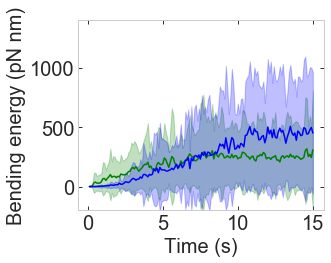

In [75]:
# for filaments near base

# number of barbed ends at base versus neck: add to dataframe as True if within criteria

close_metric = 0.05

near_base = branched_actin_bound_ends_bending['plus_zpos']+0.4<close_metric
branched_actin_bound_ends_bending['near_base'] = near_base

filaments_near_base = branched_actin_bound_ends_bending.loc[branched_actin_bound_ends_bending['near_base']]
filaments_near_base_agg= filaments_near_base.pivot_table(index=['run', 'time'], fill_value=0, dropna = False, aggfunc={'bending_energy':'sum', 'bending_angle_degrees':'mean', 'length_to_plus_end':'mean'})

# mean std grouped by time
filaments_near_base_agg_time = filaments_near_base_agg.groupby('time')

# find filaments away from base

filaments_away_base = branched_actin_bound_ends_bending.reset_index()
away_base_idx = filaments_away_base.loc[filaments_away_base['near_base']].index
filaments_away_base = filaments_away_base.drop(away_base_idx)

filaments_away_base_agg= filaments_away_base.pivot_table(index=['run', 'time'], fill_value=0, dropna = False, aggfunc={'bending_energy':'sum', 'bending_angle_degrees':'mean', 'length_to_plus_end':'mean'})

# mean std grouped by time
filaments_away_base_agg_time = filaments_away_base_agg.groupby('time')

plt.figure(figsize=[5,4])
plot_multiple_errorbars(filaments_near_base_agg_time['bending_energy'].mean(), filaments_near_base_agg_time['bending_energy'].std(), 'green', 'Bending energy (pN nm)')
plot_multiple_errorbars(filaments_away_base_agg_time['bending_energy'].mean(), filaments_away_base_agg_time['bending_energy'].std(), 'blue', 'Bending energy (pN nm)')


plt.ylim([-200,1400])

plt.xticks([0,5,10,15])

if(save_figures=='yes'):
    plt.savefig('../figures/'+pref+'_bending_energy_near_far_base_'+str(close_metric)+'nm.png')
    plt.savefig('../figures/'+pref+'_bending_energy_near_far_base_'+str(close_metric)+'nm.pdf')

In [183]:
# import endocytos sicut

endo_cut = pd.read_pickle('/Users/makamats/Google Drive/drubin_lab/Modeling/cytosim_current/cytosim/parameter_sweeps_maxReporting/simulations/endocytosis_cut_capped_output/dataframes/branched_actin_bound_ends_bending.pkl')

intern_cut = pd.read_pickle('/Users/makamats/Google Drive/drubin_lab/Modeling/cytosim_current/cytosim/parameter_sweeps_maxReporting/simulations/endocytosis_cut_capped_output/dataframes/solid_positions.pkl')




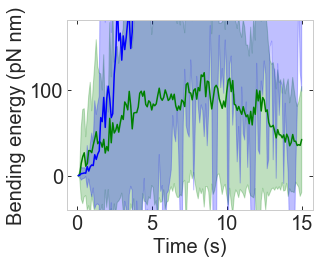

In [127]:

close_metric = 0.01

near_base_cut = endo_cut['plus_zpos']+0.4<close_metric
endo_cut['near_base'] = near_base_cut

filaments_near_base_cut = endo_cut.loc[endo_cut['near_base']]
filaments_near_base_cut_agg= filaments_near_base_cut.pivot_table(index=['run', 'time'], fill_value=0, dropna = False, aggfunc={'bending_energy':'sum', 'bending_angle_degrees':'mean', 'length_to_plus_end':'mean'})

# mean std grouped by time
filaments_near_base_cut_agg_time = filaments_near_base_cut_agg.groupby('time')

# find filaments away from base

filaments_away_base_cut = endo_cut.reset_index()
away_base_cut_idx = filaments_away_base_cut.loc[filaments_away_base_cut['near_base']].index
filaments_away_base_cut = filaments_away_base_cut.drop(away_base_cut_idx)

filaments_away_base_cut_agg= filaments_away_base_cut.pivot_table(index=['run', 'time'], fill_value=0, dropna = False, aggfunc={'bending_energy':'sum', 'bending_angle_degrees':'mean', 'length_to_plus_end':'mean'})

# mean std grouped by time
filaments_away_base_cut_agg_time = filaments_away_base_cut_agg.groupby('time')

plt.figure(figsize=[5,4])
plot_multiple_errorbars(filaments_near_base_cut_agg_time['bending_energy'].mean(), filaments_near_base_cut_agg_time['bending_energy'].std(), 'green', 'Bending energy (pN nm)')
plot_multiple_errorbars(filaments_away_base_cut_agg_time['bending_energy'].mean(), filaments_away_base_cut_agg_time['bending_energy'].std(), 'blue', 'Bending energy (pN nm)')

plt.ylim([-40,180])

plt.xticks([0,5,10,15])

if(save_figures=='yes'):
    plt.savefig('../figures/'+pref+'_cut_bending_energy_near_far_base_'+str(close_metric)+'nm_zoomY.png')
    plt.savefig('../figures/'+pref+'_cut_bending_energy_near_far_base_'+str(close_metric)+'nm_zoomY.pdf')

In [191]:
rs

run           time
run0000_0000  0.1     0.036384
              0.2     0.041667
              0.3     0.039146
              0.4     0.039688
              0.4     0.037617
              0.4     0.035280
              0.5     0.040906
              0.5     0.054302
              0.5     0.030023
              0.5     0.043718
              0.5     0.045997
              0.6     0.040894
              0.6     0.045751
              0.6     0.030391
              0.6     0.044820
              0.6     0.072825
              0.7     0.040491
              0.7     0.044607
              0.7     0.029895
              0.7     0.044797
              0.7     0.091701
              0.8     0.040649
              0.8     0.043957
              0.8     0.036939
              0.8     0.043625
              0.8     0.157651
              0.9     0.040554
              0.9     0.043072
              0.9     0.034346
              0.9     0.043938
                        ...   
run0000_0095  15.0  

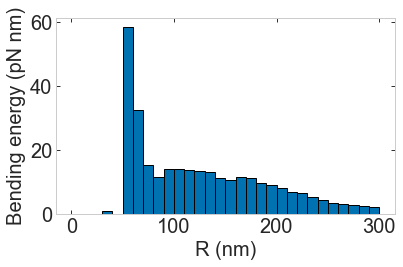

In [196]:
# hist R

from scipy.stats import binned_statistic

bE_all = branched_actin_bound_ends_bending['bending_energy']
rs = branched_actin_bound_ends_bending['plus_rpos_recalibrated']
rs_3D = branched_actin_bound_ends_bending['plus_r_recalibrated_3D']

freq, edges, binnumbers = binned_statistic(rs_3D*1000, bE_all, bins=30, statistic='sum', range = [[0,300]])
# bin_means = np.flipud(np.rot90(bin_means))

# plt.pcolormesh(xedges, yedges, bin_means)

# freq, edges = np.histogram(bE_all, 

                        
# # calculate histogram
# freq, edges = np.histogram(last_timepoint_lengths*1000,20)

plt.figure(figsize=[6,4])

#  divide by nb simulations
plt.bar(edges[:-1], freq/len(runs)/len(times), width=np.diff(edges), ec="k", align="edge")

plt.xlabel('R (nm)')
plt.ylabel('Bending energy (pN nm)')

plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)

# plt.title('Last time point n = ' + str(len(last_timepoint_lengths)))
plt.tight_layout()

plt.savefig('../figures/'+pref+'_bending_energy_R3D_all_times.png')
plt.savefig('../figures/'+pref+'_bending_energy_R3D_all_times.pdf')                           
                           
                           

# near base

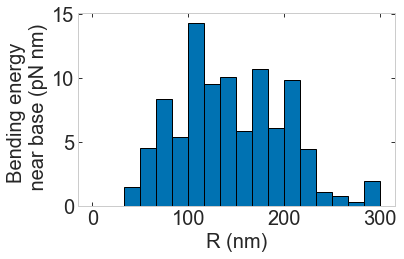

In [205]:
# hist R

# near base

filaments_plot =  branched_actin_bound_ends_bending.loc[branched_actin_bound_ends_bending['near_base']].reset_index()

# last time point

filaments_plot = filaments_plot.loc[filaments_plot['time']==15.0]

bE_all = filaments_plot['bending_energy']
rs = filaments_plot['plus_rpos_recalibrated']
rs_3D = filaments_plot['plus_r_recalibrated_3D']

freq, edges, binnumbers = binned_statistic(rs*1000, bE_all, bins=18, statistic='sum', range = [[0,300]])
# bin_means = np.flipud(np.rot90(bin_means))

# plt.pcolormesh(xedges, yedges, bin_means)

# freq, edges = np.histogram(bE_all, 

                        
# # calculate histogram
# freq, edges = np.histogram(last_timepoint_lengths*1000,20)

plt.figure(figsize=[6,4])

#  divide by nb simulations
plt.bar(edges[:-1], freq/len(runs), width=np.diff(edges), ec="k", align="edge")

plt.xlabel('R (nm)')
plt.ylabel('Bending energy \n near base (pN nm)')

plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)

# plt.title('Last time point n = ' + str(len(last_timepoint_lengths)))
plt.tight_layout()

plt.savefig('../figures/'+pref+'_bending_energy_R_near_base_last_time.png')
plt.savefig('../figures/'+pref+'_bending_energy_R_near_base_last_time.pdf')                           
                           
                           

# near base

## pick one and then plot both next to each other, endo and endocyut

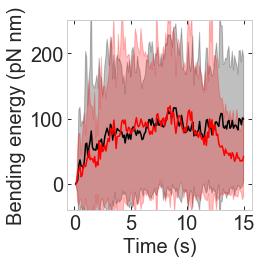

In [182]:

close_metric = 0.01

near_base = branched_actin_bound_ends_bending['plus_zpos']+0.4<close_metric
branched_actin_bound_ends_bending['near_base'] = near_base

filaments_near_base = branched_actin_bound_ends_bending.loc[branched_actin_bound_ends_bending['near_base']]
filaments_near_base_agg= filaments_near_base.pivot_table(index=['run', 'time'], fill_value=0, dropna = False, aggfunc={'bending_energy':'sum', 'bending_angle_degrees':'mean', 'length_to_plus_end':'mean'})

# mean std grouped by time
filaments_near_base_agg_time = filaments_near_base_agg.groupby('time')

# endo cut

near_base_cut = endo_cut['plus_zpos']+0.4<close_metric
endo_cut['near_base'] = near_base_cut

filaments_near_base_cut = endo_cut.loc[endo_cut['near_base']]
filaments_near_base_cut_agg= filaments_near_base_cut.pivot_table(index=['run', 'time'], fill_value=0, dropna = False, aggfunc={'bending_energy':'sum', 'bending_angle_degrees':'mean', 'length_to_plus_end':'mean'})

# mean std grouped by time
filaments_near_base_cut_agg_time = filaments_near_base_cut_agg.groupby('time')

plt.figure(figsize=[4,4])
plot_multiple_errorbars(filaments_near_base_agg_time['bending_energy'].mean(), filaments_near_base_agg_time['bending_energy'].std(), 'black', 'Bending energy (pN nm)')
plot_multiple_errorbars(filaments_near_base_cut_agg_time['bending_energy'].mean(), filaments_near_base_cut_agg_time['bending_energy'].std(), 'red', 'Bending energy (pN nm)')

plt.ylim([-40,250])

plt.xticks([0,5,10,15])

if(save_figures=='yes'):
    plt.savefig('../figures/'+pref+'_cut_comparison_bending_energy_near_base_'+str(close_metric)+'nm_zoomY.png')
    plt.savefig('../figures/'+pref+'_cut_comparison_bending_energy_near_base_'+str(close_metric)+'nm_zoomY.pdf')


last time point: 92.91464917336849 ± 92.70263396001687
last time point cut: 37.80575542502677 ± 59.30746126388139


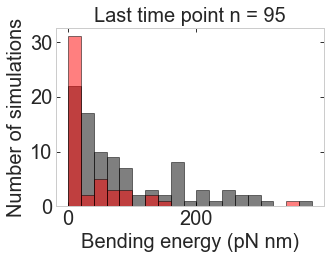

In [181]:
# histogram last time point

ll = filaments_near_base_agg.reset_index()

# filament lengths for last time point
last_timepoint_lengths = ll.loc[ll['time']==15.0].bending_energy
# calculate histogram
freq, edges = np.histogram(last_timepoint_lengths,bins=np.arange(0,400,20))


# histogram last time point

mm = filaments_near_base_cut_agg.reset_index()

# filament lengths for last time point
last_timepoint_bending_cut=  mm.loc[mm['time']==15.0].bending_energy
# calculate histogram
freq2, edges2 = np.histogram(last_timepoint_bending_cut,bins=np.arange(0,400,20))



plt.figure(figsize=[5,4])

#  divide by nb simulations
plt.bar(edges[:-1], freq, color='black', alpha=0.5,  width=np.diff(edges), ec="k", align="edge")

plt.bar(edges2[:-1], freq2,color='red', alpha=0.5,  width=np.diff(edges2), ec="k", align="edge")



plt.xlabel('Bending energy (pN nm)')
plt.ylabel('Number of simulations')

plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)

plt.title('Last time point n = ' + str(len(last_timepoint_lengths)))
plt.tight_layout()
# plt.xlim([0,50])

plt.savefig('../figures/'+pref+'bending_energy-comparison_t15.png')
plt.savefig('../figures/'+pref+'bending_energy-comparison_t15.pdf')
print('last time point: '+  str(np.mean(last_timepoint_lengths)) + ' ± ' + str(np.std(last_timepoint_lengths)))

print('last time point cut: '+  str(np.mean(last_timepoint_bending_cut)) + ' ± ' + str(np.std(last_timepoint_bending_cut)))





# plot bending energy bs R 3D and R 2D. 

Text(0,0.5,'Free filament length (µm)')

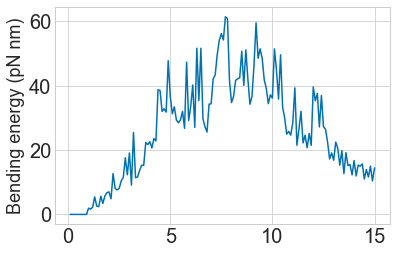

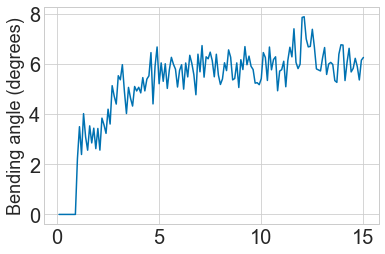

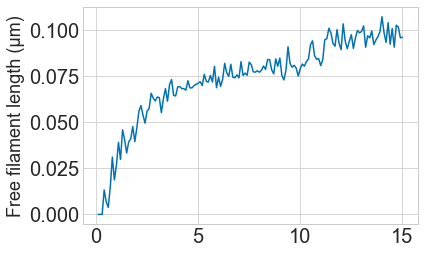

In [128]:
plt.plot(filaments_near_base_agg_time['bending_energy'].median())
plt.ylabel('Bending energy (pN nm)')
plt.figure()

plt.plot(filaments_near_base_agg_time['bending_angle_degrees'].median())
plt.ylabel('Bending angle (degrees)')

plt.figure()
plt.plot(filaments_near_base_agg_time['length_to_plus_end'].median())
plt.ylabel('Free filament length (µm)')



In [58]:
# #  use pivot table to try to sum bending energy
# close_metric = 0.0075

# near_base = branched_actin_bound_ends_bending['plus_zpos']+0.4<close_metric
# branched_actin_bound_ends_bending['near_base'] = near_base

# # branched_actin_bound_ends_bending_base = branched_actin_bound_ends_bending.loc[(branched_actin_bound_ends_bending['plus_zpos']+0.4)<0.01]
# # branched_actin_bound_ends_bending.tail()

# filaments_near_base = branched_actin_bound_ends_bending.loc[branched_actin_bound_ends_bending['near_base']]

# # filaments_near_base_sum_bending = filaments_near_base.pivot_table(index=['run', 'time'], values='bending_energy', fill_value=0, dropna = False, aggfunc='sum')
# filaments_near_base_agg= filaments_near_base.pivot_table(index=['run', 'time'], fill_value=0, dropna = False, aggfunc={'bending_energy':'sum', 'bending_angle_degrees':'mean', 'length_to_plus_end':'mean'})


# # mean std grouped by time
# # filaments_near_base.groupby(['run', 'time']).
# # filaments_near_base_agg_time = filaments_near_base_agg.groupby(['param_sweep','time'])
# # bee = mean_total_by_config_over_time['bending_energy'].reset_index()
# # bee['t'] = bee['time'].astype(float)
# # bee.sort_values(by = ['hip1r_coverage', 't'])
# filaments_near_base_agg

Text(0,0.5,'Bending energy (pN nm)')

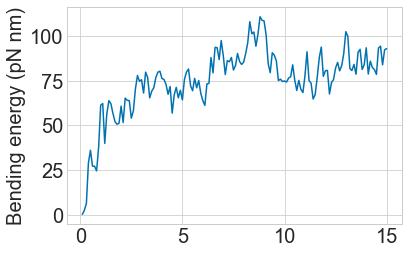

In [57]:
plt.plot(filaments_near_base_agg_time['bending_energy'].mean())
plt.ylabel('Bending energy (pN nm)')

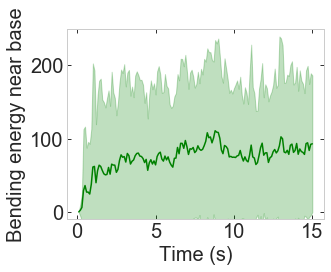

In [47]:
plt.figure(figsize=[5,4])
plot_multiple_errorbars(filaments_near_base_agg_time['bending_energy'].mean(), filaments_near_base_agg_time['bending_energy'].std(), 'green', 'Bending energy near base')

plt.ylim([-10,250])

plt.xticks([0,5,10,15])

if(save_figures=='yes'):
    plt.savefig('../figures/'+pref+'_bending_energy_near_base_vs_time.png')
    plt.savefig('../figures/'+pref+'_bending_energy_near_base_vs_time.pdf')
#     print('saved')


In [42]:
branched_actin_bound_ends_bending.to_pickle(output_dir+'/dataframes/branched_actin_bound_ends_bending.pkl')

# overlay cut and wild type

In [16]:
#  to plot multiple 

def plot_multiple_errorbars(means, stds, c, label):

    # You can call this multiple time to make several plot son top of each other. 


#     plt.figure(figsize=(6,4))
    plt.rc('font', size=20) 
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20) 

    color=c

    plt.plot(means.index,means, c=color)
    times_cur = means.index
    yminus=means-stds
    yplus=means+stds

    plt.fill_between(times_cur, np.asarray(yminus), np.asarray(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 

    plt.xlabel('Time (s)')
    plt.ylabel(label)

    plt.tick_params(reset=True, color='black', direction='in', length=4)
    plt.grid(False)

    plt.tight_layout()

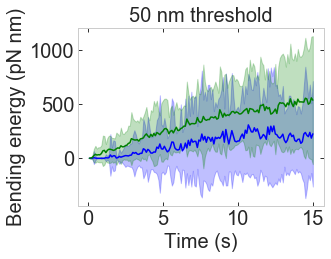

In [48]:
# within bud versus outside bud
# threshold (=threshold is defnied as inside bud)

inside_bud_threshold = 0.05

inside_bud_filaments = branched_actin_bound_ends_bending.loc[branched_actin_bound_ends_bending['plus_r_recalibrated_3D']<=inside_bud_threshold ]

outside_bud_filaments = branched_actin_bound_ends_bending.loc[branched_actin_bound_ends_bending['plus_r_recalibrated_3D']>inside_bud_threshold ]

sum_bending_energy_run_time_inside_bud  = inside_bud_filaments.pivot_table(index=['run', 'time'], values='bending_energy', fill_value=0, dropna = False, aggfunc='sum')
sum_bending_energy_run_time_outside_bud = outside_bud_filaments.pivot_table(index=['run', 'time'], values='bending_energy', fill_value=0, dropna = False, aggfunc='sum')


# mean std grouped by time

mean_bending_energy_vs_time_inside_bud=sum_bending_energy_run_time_inside_bud.groupby('time').mean().iloc[:,0]
std_bending_energy_vs_time_inside_bud=sum_bending_energy_run_time_inside_bud.groupby('time').std().iloc[:,0]

mean_bending_energy_vs_time_outside_bud=sum_bending_energy_run_time_outside_bud.groupby('time').mean().iloc[:,0]
std_bending_energy_vs_time_outside_bud =sum_bending_energy_run_time_outside_bud.groupby('time').std().iloc[:,0]


plt.figure(figsize=(5,4))

plot_multiple_errorbars(mean_bending_energy_vs_time_inside_bud, std_bending_energy_vs_time_inside_bud, 'blue', 'Bending energy (pN nm)')   

plot_multiple_errorbars(mean_bending_energy_vs_time_outside_bud, std_bending_energy_vs_time_outside_bud, 'green', 'Bending energy (pN nm)')   

plt.title(str(int(inside_bud_threshold*1000))+' nm threshold')

plt.tight_layout()


if(save_figures =='yes'):
    plt.savefig('../figures/'+pref+'_bending_energy_inside_outside_bud_'+str(int(inside_bud_threshold*1000))+'nm.png')
    plt.savefig('../figures/'+pref+'_bending_energy_inside_outside_bud_'+str(int(inside_bud_threshold*1000))+'nm.pdf')
    




# plot bending angle, number, and average or sum bending energy (maybe force from end in Z) 
# for the filaments with ends close to base

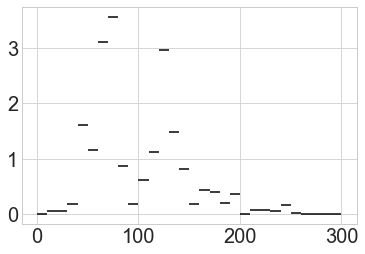

In [330]:
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:])


In [ ]:
bin_centers = bin_edges[1:] - bin_width/2

time 1
time 2
time 3
time 4
time 5
time 6
time 7
time 8
time 9
time 10
time 11
time 12
time 13
time 14
time 15


<Figure size 432x288 with 0 Axes>

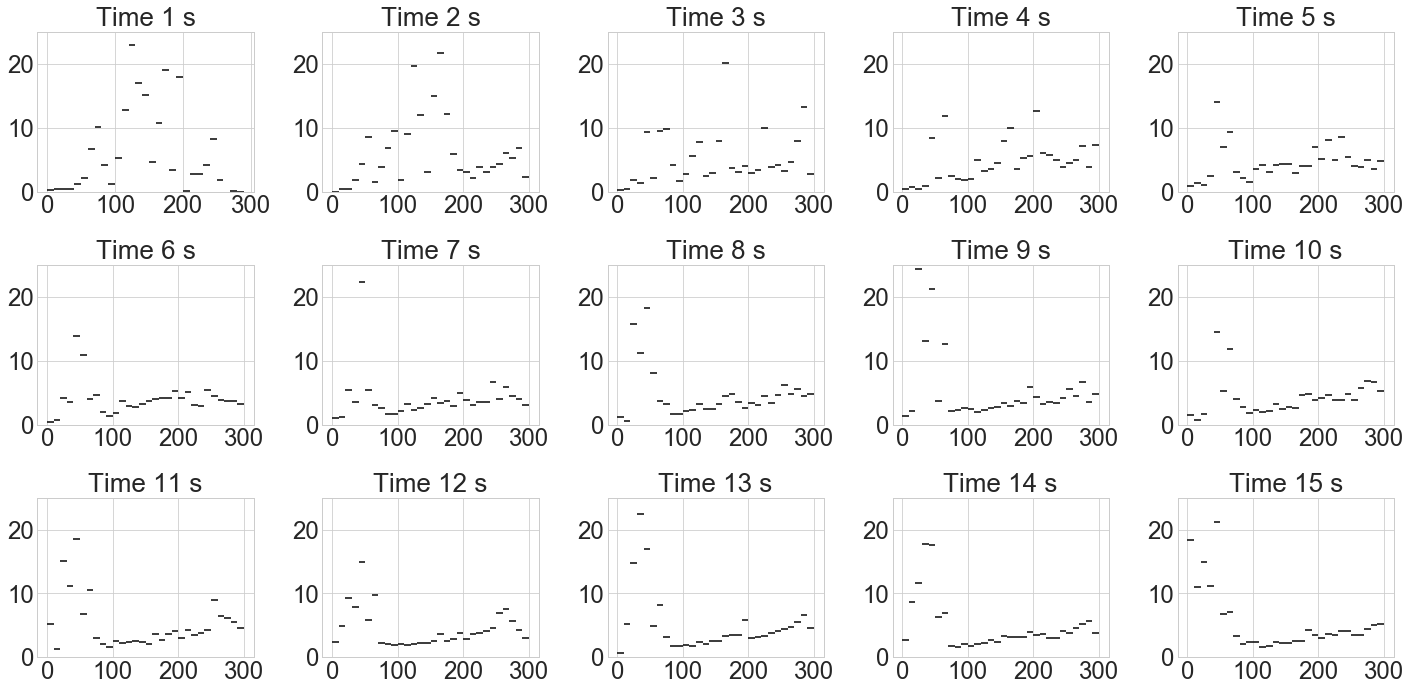

In [337]:
# over time

from scipy.stats import binned_statistic

# versus R and Z
plt.set_cmap('magma')
# filter by length of free filament

# free_length_threshold = 0.0


ends = branched_actin_bound_ends_bending.reset_index()
# outside_bud = 'yes'

plt.figure(figsize=(20,10))

for i, timept in enumerate(range(1,16,1),start=1):

    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    
#     ends_time = indirect_bound_ends_attachment.loc[indirect_bound_ends_attachment['length_to_plus_end']>free_length_threshold]
    
#     ends_time = ends_time.reset_index()
#     if outside_bud=='yes':
#         in_bud_idx =ends_time.loc[ends_time['plus_rpos_recalibrated']<0.05].loc[ends_time['plus_zpos_recalibrated']>-0.05].loc[ends_time['plus_zpos_recalibrated']<0.05].index
#         ends_time = ends_time.drop(in_bud_idx)
#     branched_actin_bound_ends_no_index=ends_time.reset_index()

    branched_actin_bound_ends_time=ends.loc[ends['time']>(timept-1)].loc[ends['time']<=(timept)]

  # set position
    
    x = branched_actin_bound_ends_time.plus_rpos_recalibrated*1000

    y = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)
    
    color = branched_actin_bound_ends_time['bending_energy']

#     2D heat map
    
#     bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, bins=30, statistic='sum', range = [[0,300],[-200,0]])
#     bin_means = np.flipud(np.rot90(bin_means))

# hist

    bin_means, bin_edges, bin_numbers = binned_statistic(x, color, bins=30, statistic='mean', range = [0,300])
#     bin_means = np.flipud(np.rot90(bin_means))
    
#     bin_means = bin_means/len(runs)/10
    
    plt.subplot(3, 5, i)
#     plt.pcolormesh(xedges, yedges, bin_means)
#     plt.hist(x, color)
#     plt.plot(binnumbers, bin_means)
    plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:])

    
#     cb = plt.colorbar(label = 'Bending energy (pN nm)')
    plt.title('Time ' + str(timept) + ' s', fontsize=26)
    plt.ylim([0, 25])
#     plt.yticks([-90, -45, 0, 45, 90])
    
    plt.xticks(size=24)
    plt.yticks(size=24)
    plt.xticks([0,100,200,300])
#     plt.xlim([0,80])
#     plt.ylim([-80, 0])

    plt.tight_layout()
    
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'bending_energy_mean_hist_time_vs_r_subplots.png')
    plt.savefig('../figures/'+pref+'bending_energy_mean_hist_time_vs_r_subplots.pdf')
    


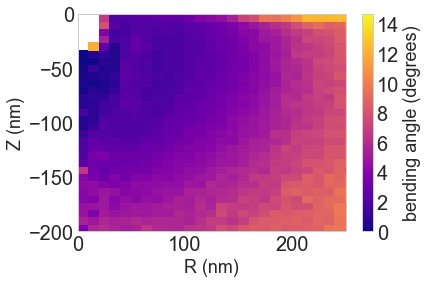

In [264]:
# versus RZ: mean bending angle in heat map
from scipy.stats import binned_statistic_2d

x = branched_actin_bound_ends_bending['plus_rpos_recalibrated']*1000
y = (branched_actin_bound_ends_bending['plus_zpos']+0.4)*(-1000)

color = branched_actin_bound_ends_bending['bending_angle_degrees']
# x = hip1r_bound_ends_attachment['bending_energy']

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
  bins=30, statistic='mean', range = [[0,300],[-200,0]])
bin_means = np.flipud(np.rot90(bin_means))

# bin_means = bin_means/len(runs)/len(times)

plt.pcolormesh(xedges, yedges, bin_means)

plt.colorbar(label='bending angle (degrees)')
plt.xlabel('R (nm)')
plt.ylabel('Z (nm)')

plt.ylim([-200,0])
plt.xlim([0, 250])


plt.savefig('../figures/'+pref+'bending_angles_direct_indirect_vs_RZ.pdf')

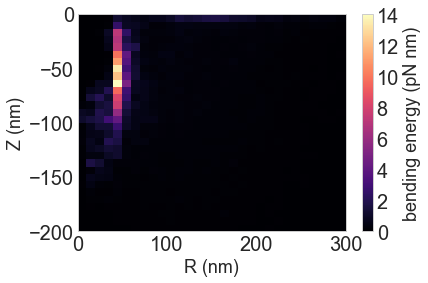

In [124]:
# versus RZ: sum bending energy in heat map
from scipy.stats import binned_statistic_2d

x = branched_actin_bound_ends_bending['plus_rpos_recalibrated']*1000
y = (branched_actin_bound_ends_bending['plus_zpos']+0.4)*(-1000)

color = branched_actin_bound_ends_bending['bending_energy']
# x = hip1r_bound_ends_attachment['bending_energy']

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
  bins=30, statistic='sum', range = [[0,300],[-200,0]])
bin_means = np.flipud(np.rot90(bin_means))

bin_means = bin_means/len(runs)/len(times)

plt.pcolormesh(xedges, yedges, bin_means)

plt.colorbar(label='bending energy (pN nm)')
plt.xlabel('R (nm)')
plt.ylabel('Z (nm)')

plt.ylim([-200,0])
# plt.clim([0, 5])


plt.savefig('../figures/'+pref+'bending_energy_direct_indirect_vs_RZ.pdf')

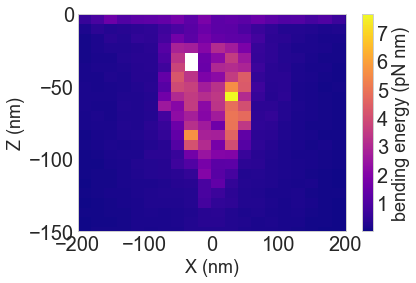

In [215]:
# versus XZ: sum bending energy in heat map
from scipy.stats import binned_statistic_2d

x = branched_actin_bound_ends_bending['plus_xpos_recalibrated']*1000
y = (branched_actin_bound_ends_bending['plus_zpos']+0.4)*(-1000)

color = branched_actin_bound_ends_bending['bending_energy']
# x = hip1r_bound_ends_attachment['bending_energy']

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
  bins=30, statistic='sum', range = [[-300,300],[-200,0]])
bin_means = np.flipud(np.rot90(bin_means))

bin_means = bin_means/len(runs)/len(times)

plt.pcolormesh(xedges, yedges, bin_means)

plt.colorbar(label='bending energy (pN nm)')
plt.xlabel('X (nm)')
plt.ylabel('Z (nm)')


# plt.clim([0,3])
plt.ylim([-150,0])
plt.xlim([-200, 200])

plt.savefig('../figures/'+pref+'bending_energy_direct_indirect_vs_XZ.pdf')

In [ ]:

# filaments with plus end not stuck in bud.

# plot versus R
# plot versus Z


# contour map bending angle versus L


# heat map versus Z and R. can make a function for this.

# based on max actin plots? or?

In [ ]:
# histogram the top 20 nm or so near base, bending energy 

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


<Figure size 432x288 with 0 Axes>

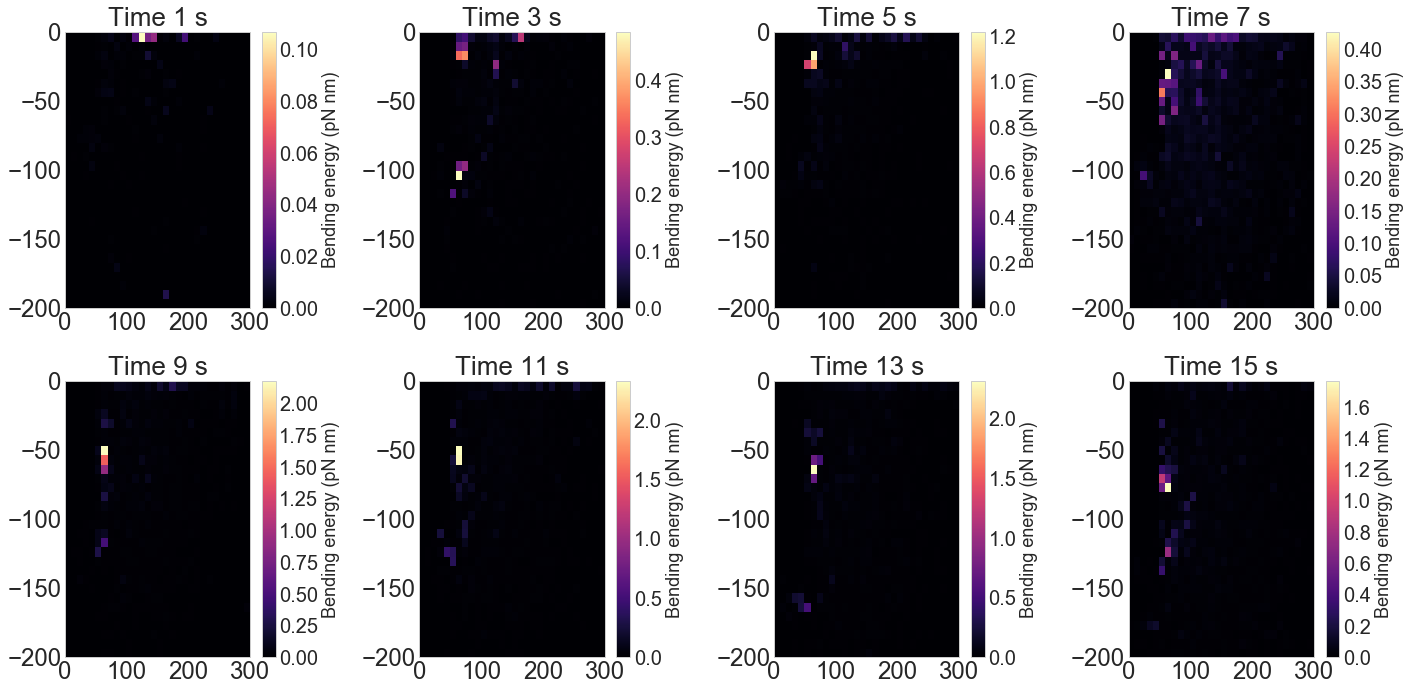

In [53]:
# over time

# versus R and Z
plt.set_cmap('magma')
# filter by length of free filament

free_length_threshold = 0.00

outside_bud = 'yes'

plt.figure(figsize=(20,10))

for i, timept in enumerate(range(1,16,2),start=1):

    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    
    ends_time = branched_actin_bound_ends_bending.loc[branched_actin_bound_ends_bending['length_to_plus_end']>free_length_threshold]
    
    ends_time = ends_time.reset_index()
    if outside_bud=='yes':
        in_bud_idx =ends_time.loc[ends_time['plus_rpos_recalibrated']<0.055].loc[ends_time['plus_zpos_recalibrated']>-0.055].loc[ends_time['plus_zpos_recalibrated']<0.055].index
        ends_time = ends_time.drop(in_bud_idx)
    branched_actin_bound_ends_no_index=ends_time.reset_index()

    branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

  # set position
    
    x = branched_actin_bound_ends_time.plus_rpos_recalibrated*1000

    y = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)
    
    color = branched_actin_bound_ends_time['bending_energy']

    bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, bins=30, statistic='sum', range = [[0,300],[-200,0]])
    bin_means = np.flipud(np.rot90(bin_means))

    bin_means = bin_means/len(runs)/len(times)
    
    plt.subplot(2, 4, i)
    plt.pcolormesh(xedges, yedges, bin_means)


    
    cb = plt.colorbar(label = 'Bending energy (pN nm)')
    plt.title('Time ' + str(timept) + ' s', fontsize=26)
    
#     plt.yticks([-90, -45, 0, 45, 90])
    
    plt.xticks(size=24)
    plt.yticks(size=24)
    
#     plt.xlim([0,80])
#     plt.ylim([-80, 0])

    plt.tight_layout()
    
    
# if save_figures == 'yes': 
#     plt.savefig('../figures/'+pref+'radial_orientation_time_vs_r_subplots_relative_colorbar.png')
#     plt.savefig('../figures/'+pref+'radial_orientation_time_vs_r_subplots_relative_colorbar.pdf')
    


107532 ends near bud out of 576697


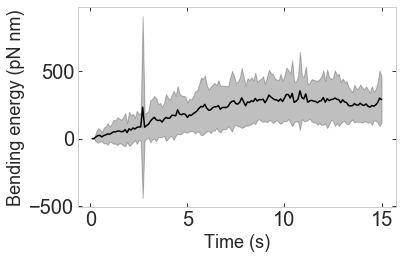

In [86]:
# outside bud, bending energy over time

free_length_threshold = 0.005

ends_time = branched_actin_bound_ends_bending
ends_time = ends_time.reset_index()
ends_time = ends_time.loc[ends_time['length_to_plus_end']>free_length_threshold]
    
if outside_bud=='yes':
    in_bud_idx =ends_time.loc[ends_time['plus_rpos_recalibrated']<0.06].loc[ends_time['plus_zpos_recalibrated']>-0.06].loc[ends_time['plus_zpos_recalibrated']<0.06].index
    print(str(len(in_bud_idx))+' ends near bud out of '+str(len(ends_time)))
    ends_time = ends_time.drop(in_bud_idx)

# plot direct + indirect bending energy

sum_bending_energy_run_time = ends_time.pivot_table(index=['run', 'time'], values='bending_energy', fill_value=0, dropna = False, aggfunc='sum')
# mean std grouped by time

mean_bending_energy_vs_time=sum_bending_energy_run_time.groupby('time').mean().iloc[:,0]
std_bending_energy_vs_time=sum_bending_energy_run_time.groupby('time').std().iloc[:,0]

# mean_bending_energy_vs_time

# plot
plot_errorbar(mean_bending_energy_vs_time, std_bending_energy_vs_time, 'black', 'Bending energy (pN nm)')   

if('save_figures'=='yes'):
    plt.savefig('../figures/'+pref+'_bending_energy_direct_indirect_vs_time_outside_bud.png')
    plt.savefig('../figures/'+pref+'_bending_energy_direct_indirect_vs_time_outside_bud.pdf')

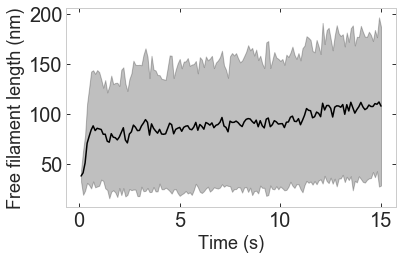

In [109]:

mean_lengths_to_plus_end = ends_time.groupby('time')['length_to_plus_end'].mean()
std_lengths_to_plus_end = ends_time.groupby('time')['length_to_plus_end'].std()

plot_errorbar(mean_lengths_to_plus_end*1000, std_lengths_to_plus_end*1000, 'black', 'Free filament length (nm)')   

if('save_figures'=='yes'):
    plt.savefig('../figures/'+pref+'_free_filament_length_time.png')
    plt.savefig('../figures/'+pref+'_free_filament_length_time.pdf')


83393 ends near bud out of 566054


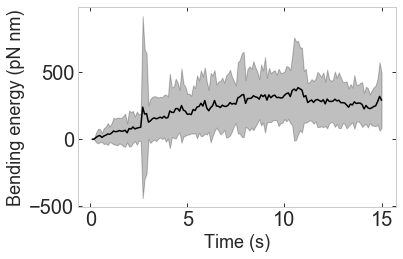

In [121]:
# just ends near base, bending energy over time

free_length_threshold = 0.000

base_threshold = 0.2

outside_bud = 'yes'
outside_bud_threshold = 0.055

ends_time = branched_actin_bound_ends_bending
ends_time = ends_time.reset_index()
ends_time = ends_time.loc[ends_time['length_to_plus_end']>free_length_threshold]

# near base only (for direct bound only? try too)

ends_time = ends_time.loc[(ends_time['plus_zpos']+0.4)<base_threshold]

if outside_bud=='yes':
    in_bud_idx =ends_time.loc[ends_time['plus_r_recalibrated_3D']<outside_bud_threshold].index
    print(str(len(in_bud_idx))+' ends near bud out of '+str(len(ends_time)))
    ends_time = ends_time.drop(in_bud_idx)

# plot direct + indirect bending energy

sum_bending_energy_run_time = ends_time.pivot_table(index=['run', 'time'], values='bending_energy', fill_value=0, dropna = False, aggfunc='sum')
# mean std grouped by time

mean_bending_energy_vs_time=sum_bending_energy_run_time.groupby('time').mean().iloc[:,0]
std_bending_energy_vs_time=sum_bending_energy_run_time.groupby('time').std().iloc[:,0]

# mean_bending_energy_vs_time

# plot
plot_errorbar(mean_bending_energy_vs_time, std_bending_energy_vs_time, 'black', 'Bending energy (pN nm)')   

if(save_figures=='yes'):
    plt.savefig('../figures/'+pref+'_bending_energy_cluster_r>'+str(outside_bud_threshold)+'base<'+str(base_threshold)+'.png')
    plt.savefig('../figures/'+pref+'_bending_energy_cluster_r>'+str(outside_bud_threshold)+'base<'+str(base_threshold)+'.pdf')

KeyError: 'the label [run0000_0020] is not in the [index]'

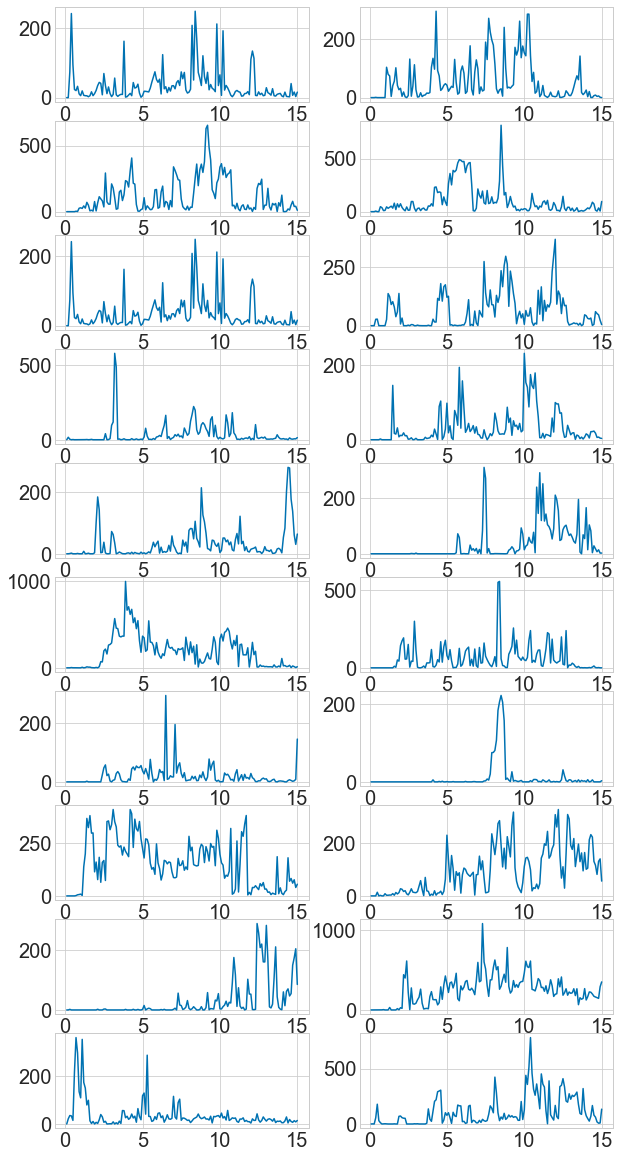

In [100]:
# be= sum_bending_energy_run_time.reset_index()
plt.figure(figsize=(10,50))
for i, runn in enumerate(runs):
    sum_bending_energy_time_one_run = sum_bending_energy_run_time.loc[runn]
    plt.subplot(24,2,i+1)
    plt.plot(sum_bending_energy_time_one_run.bending_energy)
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_bending_energy_all_plots_near_base_outside_bud.png')
    plt.savefig('../figures/'+pref+'_bending_energy_all_plots_near_base_outside_bud.pdf')
    
# abs y 
plt.figure(figsize=(10,50))
for i, runn in enumerate(runs):
    sum_bending_energy_time_one_run = sum_bending_energy_run_time.loc[runn]
    plt.subplot(24,2,i+1)
    plt.plot(sum_bending_energy_time_one_run.bending_energy)
    plt.ylim(0, 2500)
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_bending_energy_all_plots_near_base_abs_outside_bud.png')
    plt.savefig('../figures/'+pref+'_bending_energy_all_plots_near_base_abs_outside_bud.pdf')
 


In [ ]:
# do plot by plot for seeral nb ends near base measruements too.


In [ ]:
# anticorrelate bending energy with futher internalziaton after t = 10 s


In [ ]:
## capped versus growing filaments: bending energy


## bending energy versus internalization! 


## end